# 따릉이 데이터 EDA

## 목차
1. 라이브러리 불러오기
2. 데이터 불러오기
3. 가설 세우기
4. 데이터 살펴보기
5. 데이터 전처리하기
6. 변수들 간의 그래프
7. 가설 검정

## 1. 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기
%matplotlib inline

## 2. 데이터 불러오기 

In [2]:
%pwd
#현재 폴더 위치 확인

'C:\\Users\\6aimh\\OneDrive\\바탕 화면\\b.a.f\\4주차'

In [3]:
import pandas as pd
cycle1=pd.read_csv("../train.csv",encoding='cp949')
cycle=cycle1.copy()
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes


### - 데이터의 열에 대한 설명
- Date                           : 날짜
- Rented Bike Count              : 대여한 자전거 수
- Hour                           : 대여 시각
- Temperature(°C)               : 기온(°C)
- Humidity(%)                    : 습도(%)
- Wind speed (m/s)               : 바람 세기(m/s)
- Visibility (10m)               : 시야(10m)
- Dew point temperature(°C)     : 이슬점(일정한 압력에서 공기의 온도를 낮추어 갈 때 공기 중의 수증기가 포화하여 이슬이 맺힐 때의 온도,습도에 비례)
- Solar Radiation (MJ/m2)        : 태양 복사열(MJ/m2)
- Rainfall(mm)                   : 강우량(mm)
- Snowfall (cm)                  : 적설량(cm)
- Seasons                        : 계절
- Holiday                        : 휴일
- Functioning Day                : 기능 가능일
- Month                          : 데이터의 월
- Day Of Week                    : 데이터의 요일

# 3. 가설 세우기

> 단일 변수 가설

1. 기온이 높으면 자전거 대여 수가 적을 것이다.
2. 습도가 높으면 자전거 대여 수가 적을 것이다.
3. 바람 세기가 세면 자전거 대여 수가 적을 것이다.
4. 태양 복사열이 세면 자전거 대여 수가 적을 것이다.
5. 강우량이 많으면 자전거 대여 수가 적을 것이다.
6. 적설량이 많으면 자전거 대여 수가 적을 것이다.
7. 겨울이 가장 자전거 대여 수가 적을 것이다.
8. 휴일이 평일에 비해 자전거 대여 수가 많을 것이다.
9. 기능 가능일에만 자전거를 대여할 수 있을 것이다.
10. 학생들 여름방학 기간인 7, 8월에는 자전거 사용량이 많을 것이다. (대학생뿐만 아니라 초중고 학생들도 방학이므로)
11. 벚꽃놀이 시즌인 3월 말에서 4월 중순에 자전거 대여량이 많을 것이다.

> 2개 이상의 독립변수를 이용한 가설

- 휴일에는 나들이 나온 사람들의 사용량이 많을 것이다. 따라서 낮 시간대 사용량이 많을 것이다.
- 평일에는 직장인들의 출퇴근길 시각에 사용량이 많을 것이다.

# 4. 데이터 살펴보기

#### 정보 확인
- 7008개의 행과 14개의 열로 이루어짐.
- Temperature(°C), Wind speed (m/s), Seasons 열에만 결측치가 존재함.
- object형 데이터로 이루어진 열이 있다. (Date, Seasons, Holiday, Functioning Day 열)

In [4]:
cycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7008 non-null   object 
 1   Rented Bike Count          7008 non-null   int64  
 2   Hour                       7008 non-null   int64  
 3   Temperature(°C)            6306 non-null   float64
 4   Humidity(%)                7008 non-null   int64  
 5   Wind speed (m/s)           6303 non-null   float64
 6   Visibility (10m)           7008 non-null   int64  
 7   Dew point temperature(°C)  7008 non-null   float64
 8   Solar Radiation (MJ/m2)    7008 non-null   float64
 9   Rainfall(mm)               7008 non-null   float64
 10  Snowfall (cm)              7008 non-null   float64
 11  Seasons                    6309 non-null   object 
 12  Holiday                    7008 non-null   object 
 13  Functioning Day            7008 non-null   objec

#### 기술통계량 확인
- 강우량과 적설량의 min, 25%, 50%, 75%가 모두 0인 걸로 보아 두 열은 0인 데이터가 많다는 걸 알 수 있다.

In [5]:
cycle.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,7008.000000,7008.000000,6306.000000,7008.000000,6303.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,708.597603,11.559646,13.030082,58.141981,1.732937,1440.761558,4.042066,0.574576,0.150271,0.075300
std,647.980391,6.923619,11.986773,20.423404,1.030763,607.545441,13.121249,0.874529,1.134598,0.440936
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,6.000000,3.600000,42.000000,1.000000,946.000000,-4.800000,0.000000,0.000000,0.000000
50%,505.500000,12.000000,14.000000,57.000000,1.500000,1703.000000,5.100000,0.010000,0.000000,0.000000
75%,1071.000000,18.000000,22.675000,74.000000,2.350000,2000.000000,14.900000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#### 결측치 확인
- Temperature(°C), Wind speed (m/s), Seasons 열에만 결측치가 존재함.

In [6]:
cycle.isna().sum().sort_values()

Date                           0
Rented Bike Count              0
Hour                           0
Humidity(%)                    0
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Holiday                        0
Functioning Day                0
Seasons                      699
Temperature(°C)              702
Wind speed (m/s)             705
dtype: int64

#### 중복값 확인하기
- 중복값은 없다.

In [7]:
cycle[cycle.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


#### 음수인 데이터에 확인. 
(대여량, 시간, 습도, 풍속, 시야, 태양복사열, 강우량, 적설량은 음수가 올 수 없기 때문에.)

In [8]:
for i in ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
    print(i,cycle[i][cycle[i]<0].count())

Rented Bike Count 0
Hour 0
Temperature(°C) 1007
Humidity(%) 0
Wind speed (m/s) 0
Visibility (10m) 0
Dew point temperature(°C) 2520
Solar Radiation (MJ/m2) 0
Rainfall(mm) 0
Snowfall (cm) 0


#### -> 의심스러운 음수데이터는 없어보인다.

#### 0인 데이터 확인
- Humidity(%)가 0이라면 공기 중에 수증기가 전혀 없다는 건데 이론적으로 가능해도 실제로 그런 경우가 존재하기는 어렵다. 따라서 오류데이터로 보겠다.
- Wind speed (m/s)가 0인 경우는 실제로 드물다. 하지만 특수한 상황에서 가능하긴 하므로 오류 데이터로 보진 않을 것이다. 
- Solar Radiation (MJ/m2)가 0인 경우는 가능하지만 시간대를 살펴보고 낮 시간에 0인 경우가 있다면 데이터를 살펴봐야할 것이다.

In [9]:
for i in ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
    print(i,cycle[i][cycle[i]==0].count())

Rented Bike Count 236
Hour 286
Temperature(°C) 16
Humidity(%) 13
Wind speed (m/s) 51
Visibility (10m) 0
Dew point temperature(°C) 49
Solar Radiation (MJ/m2) 3430
Rainfall(mm) 6588
Snowfall (cm) 6652


#### Humidity(%)가 0인 데이터는 아래 데이터 전처리 파트에서 다루도록 하겠다.

#### Solar Radiation (MJ/m2)가 0인 경우의 시간대 확인
- 해가 없는 시간대에 0인 경우가 대부분인 것으로 보아 이상치가 아닌 것으로 보임.
- 9, 10, 17시에 0인 경우가 있는데 계절에 따라 일조 시간이 다르기 때문에 충분히 이해 가능한 데이터로 보임.

<AxesSubplot:xlabel='Hour', ylabel='count'>

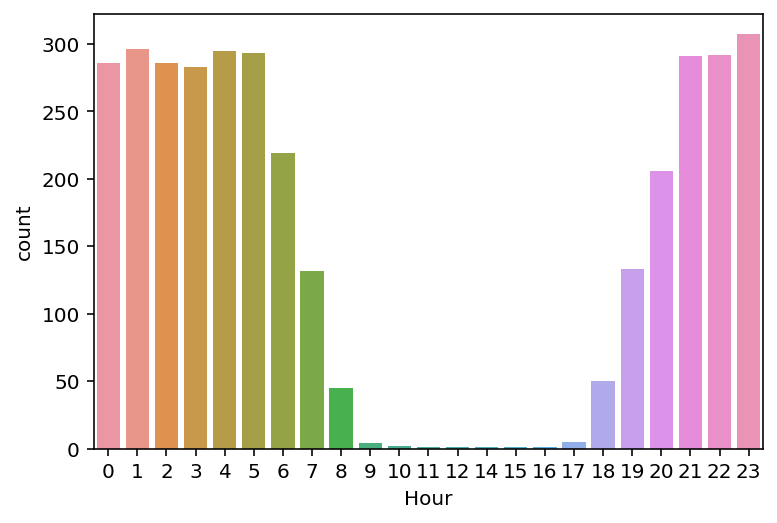

In [10]:
sns.countplot(x='Hour', data=cycle[cycle['Solar Radiation (MJ/m2)']==0])

#### 상관계수 행렬 히트맵

Text(0.5, 1.0, 'correlation heatmap')

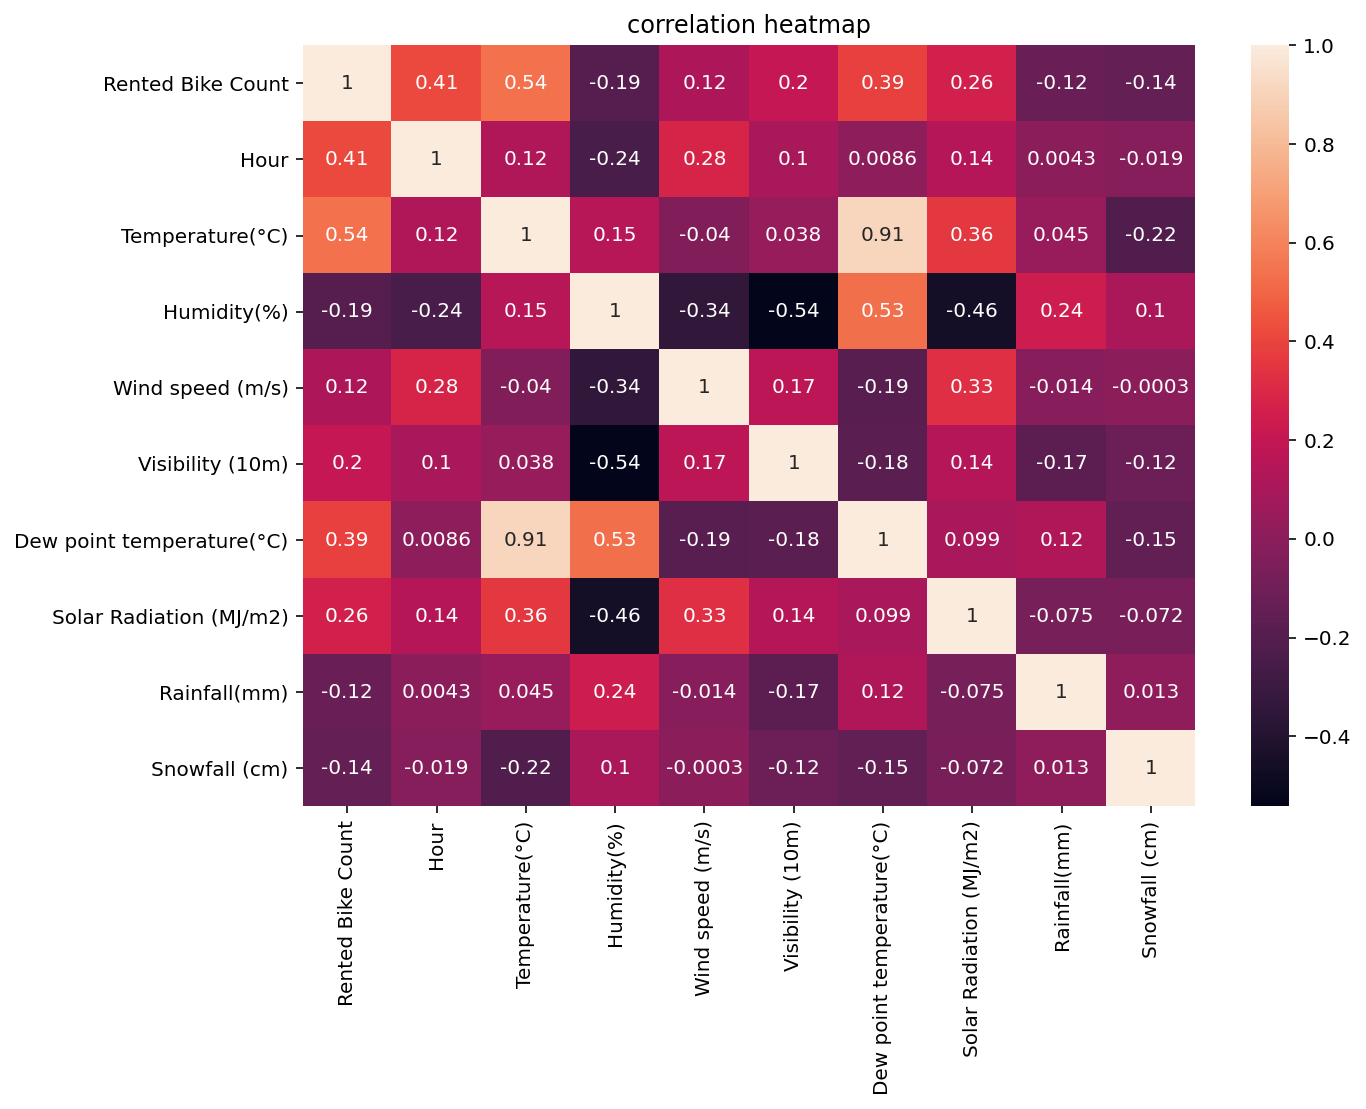

In [11]:
plt.figure(figsize=(10,7))  #사이즈 조정
sns.heatmap(cycle[['Date','Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']].corr(),annot=True) #annot는 값  표기
plt.title('correlation heatmap') #상관계수 행렬 히트맵

#### -> 상관계수는 기온과 대여량, 이슬점과 습도, 대여 시각과 대여량, 이슬점과 대여량, 기온과 태양 복사열, 바람 세기와 태양 복사열 순으로 크다.
- 기온이 너무 높거나 너무 낮을 경우 자전거를 타는 사람이 많지 않을 것이다. (기온과 대여량)
- 습도는 공기 중에 포함된 수증기량을, 이슬점은 공기 중의 수증기가 응결되어 이슬로 변하기 시작하는 온도를 나타낸다. 이슬점이 높을수록 습도가 높다는 것을 의미한다. (이슬점과 습도)
- 시야 확보가 잘 되지 않는 밤 시간대 보다는 낮 시간대에 자전거를 이용하는 사람이 많을 것이다. (대여 시각과 대여량)
- 이슬점이 높으면 습도가 높기 때문에 대여량이 줄어들 것임. (이슬점과 대여량) -> 습도와 대여량의 상관계수가 낮은 이유는 의문.
- 태양 복사열이 지구 대기와 지표면을 가열하여 기온을 상승시키기 때문에 관련성이 높다. (기온과 태양 복사열)
- 태양 복사열은 지표면을 가열하여 기온 차이를 발생시키고, 이는 기압 차이를 통해 바람을 발생시켜 바람 세기에 영향을 준다.(바람 세기와 태양 복사열)

#### -> 가시성과 습도, 태양 복사열과 습도, 바람 세기와 습도는 음의 상관계수를 갖으며 이 순서대로 작다.
- 앞이 보이는 것도 습도 간에는 관련성이 크지 않다.(가시성과 습도)
- 간접적으로 영향을 미칠 수 있지만 큰 관련성이 있진 않다. (태양 복사열과 습도)
- 바람 세기와 습도는 서로 영향을 미칠 것이라고 생각이 들어서 이 결과에 대해 이해하기 어렵다. 아무래도 이 데이터 내에서는 서로 관련이 없는 게 아닐까 추측해본다. (바람 세기와 습도)

# 5. 데이터 전처리하기

### 5-1 결측치, 이상치 처리하기

# Seasons
#### Seasons의 결측치를 무엇으로 대체하는 게 좋을지 데이터를 보며 알아보자.

#### 날짜와 시간을 오름차순에 따라 데이터 정리

In [12]:
cycle['Date']=pd.to_datetime(cycle['Date'],dayfirst=True)
cycle=cycle.sort_values(by=['Date','Hour'])
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1466,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,NaN,No Holiday,Yes
2598,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
613,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
2442,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5312,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
3741,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
2898,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,NaN,No Holiday,Yes
6733,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


#### -> 계절 데이터에 결측치가 있다.  3,4,5월은 봄, 6,7,8월은 여름, 9,10,11월은 가을, 12,1,2월은 겨울이기 때문에 이 점을 이용해서 결측치를 대체해보자.

In [13]:
def change(date):
    if date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Autumn'
    elif date.month in [12, 1, 2]:
        return 'Winter'
    else:
        return 'N'
cycle['Seasons']=cycle['Date'].apply(lambda x : change(x))
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1466,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2598,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
613,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
2442,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5312,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
3741,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
2898,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
6733,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


#### Index 깔끔하게 하게 위해서 0부터 7007까지로 수정

In [14]:
cycle.index=np.arange(7008)
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
7004,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
7005,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
7006,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [15]:
print(cycle['Seasons'].isna().sum())

0


#### -> Seasons 결측치 대체 끝!

### + 추가로 년도 별 데이터를 보기 위해 'Year'열을 추가하자

In [16]:
cycle.loc[:,'Year']=cycle['Date'].dt.year
cycle.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017


### + 추가로 월 별 데이터를 보기 위해 'Month' 열을 추가하자

In [17]:
cycle.loc[:,'Month']=cycle['Date'].dt.month
cycle.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12


### + 추가로 요일 별 데이터를 보기 위해 'Day Of Week' 열을 추가하자

In [18]:
cycle.loc[:,'Day Of Week']=cycle['Date'].dt.day_name()
cycle.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day Of Week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday


In [19]:
day_order =['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cycle.loc[:,'Day Of Week'] = pd.Categorical(cycle['Day Of Week'], categories=day_order, ordered=True) # 범주형 데이터로 변환

# Temperature(°C)
#### Temperature(°C)의 결측치를 무엇으로 대체하는 게 좋을지 데이터를 보며 알아보자.

In [20]:
cycle[cycle['Temperature(°C)'].isna()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day Of Week
6,2017-12-01,181,6,NaN,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
8,2017-12-01,930,8,NaN,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
20,2017-12-01,405,21,NaN,81,0.8,1687,-3.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
21,2017-12-01,398,22,NaN,83,1.5,1380,-3.4,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
22,2017-12-01,323,23,NaN,84,NaN,1265,-3.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6962,2018-11-28,675,14,NaN,14,1.1,1880,-16.1,1.70,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Wednesday
6981,2018-11-29,645,13,NaN,26,2.1,1604,-12.7,0.21,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Thursday
6986,2018-11-29,1577,18,NaN,46,0.9,1566,-4.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Thursday
6988,2018-11-29,559,23,NaN,56,1.9,1394,-5.3,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Thursday


기온은 다른 독립 변수 중 이슬점과 가장 큰 상관계수를 갖고 있었기 때문에 태양 복사열과 연관지어 보자.

In [21]:
cycle[['Temperature(°C)','Dew point temperature(°C)']]

,Temperature(°C),Dew point temperature(°C)
0,-5.2,-17.6
1,-5.5,-17.6
2,-6.0,-17.7
3,-6.2,-17.6
4,-6.0,-18.6
...,...,...
7003,6.0,-10.7
7004,4.7,-9.8
7005,4.2,-10.3
7006,2.6,-9.9


Dew point temperature(°C)의 값을 10개의 구간으로 나눈 후 그 구간별 Temperature(°C)의 평균값을 계산하고, 이 값으로 Temperature(°C)의 NaN 값을 대체하자.

In [22]:
#이슬점 구간 나누기
bins = np.linspace(cycle['Dew point temperature(°C)'].min(), cycle['Dew point temperature(°C)'].max(), 11)
cycle['Dew point temperature(°C) Binned'] = pd.cut(cycle['Dew point temperature(°C)'], bins)

# 구간별 Temperature(°C)의 평균값 계산
temperature_means = cycle.groupby('Dew point temperature(°C)')['Temperature(°C)'].mean()

# 각 구간별 평균값을 딕셔너리로 변환
temperature_means_dict = temperature_means.to_dict()

# NaN 값을 구간별 평균값으로 대체하는 함수 정의
def fill_temperature(row):
    if pd.isna(row['Temperature(°C)']):
        binned_value = row['Dew point temperature(°C)']
        return temperature_means_dict.get(binned_value, row['Temperature(°C)'])
    return row['Temperature(°C)']

# NaN 값을 대체
cycle['Temperature(°C)'] = cycle.apply(fill_temperature, axis=1)

# 결과 확인
print(cycle['Temperature(°C)'].isna().sum())

# Dew point temperature(°C) Binned 열 삭제
cycle.drop('Dew point temperature(°C) Binned',axis=1,inplace=True)

6


In [23]:
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day Of Week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
7004,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
7005,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
7006,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday


#### 나머지 6개의 결측치는 월별 평균 기온으로 대체하겠다.

In [24]:
month_temperature_means = cycle.groupby('Month')['Temperature(°C)'].transform('mean')
cycle['Temperature(°C)'].fillna(month_temperature_means, inplace=True)
#결과 확인
print(cycle['Temperature(°C)'].isna().sum())

0


#### -> Temperature(°C) 결측치 대체 끝!

# Wind speed (m/s) 
#### Wind speed (m/s)의 결측치를 무엇으로 대체하는 게 좋을지 데이터를 보며 알아보자.

In [25]:
wind_na=cycle[cycle['Wind speed (m/s)'].isna()==True]

#### 계절에 따라 살펴보자.
- 계절이 구별기준이 되기엔 부족한 듯하다.

<AxesSubplot:xlabel='Seasons', ylabel='count'>

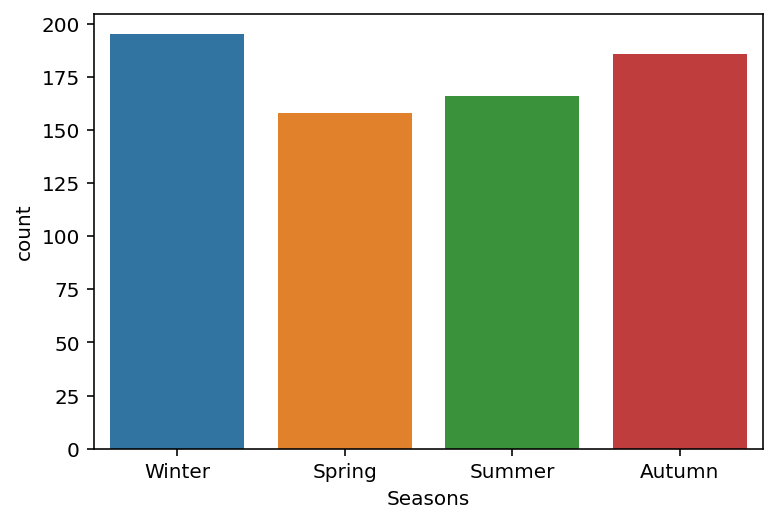

In [26]:
sns.countplot(x='Seasons',data=wind_na)

### 스플라인 보간법으로 풍속 데이터의 결측치를 대체할 것이다.
- 풍속 데이터가 다른 열의 데이터들과 큰 상관계수를 갖고 있지 않기 때문에.
- 풍속은 연속성이 있는 데이터이기 때문에 시간의 흐름과 큰 관련이 있을 것이라고 생각하기 때문에.

In [27]:
cycle['Wind speed (m/s)']=cycle['Wind speed (m/s)'].interpolate(method='spline',order=3)
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day Of Week
0,2017-12-01,254,0,-5.2,37,2.200000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.800000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
2,2017-12-01,173,2,-6.0,39,1.000000,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
3,2017-12-01,107,3,-6.2,40,0.900000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
4,2017-12-01,78,4,-6.0,36,1.580633,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,1047,17,6.0,29,2.100000,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
7004,2018-11-30,1384,18,4.7,34,1.900000,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
7005,2018-11-30,1003,19,4.2,34,2.600000,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
7006,2018-11-30,694,21,2.6,39,0.300000,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday


# Functioning Day
- 'Yes'인 경우에만 자전거를 이용할 수 있음.

<AxesSubplot:xlabel='Functioning Day', ylabel='Rented Bike Count'>

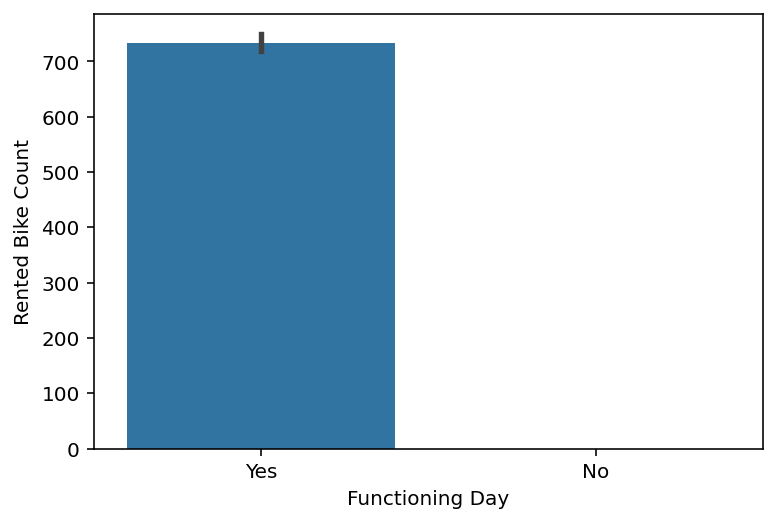

In [28]:
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=cycle)

#### 어떠한 이유로 기능 불가능한 날이 생긴걸까?

In [29]:
cycle.groupby(cycle[cycle['Functioning Day']=='No']['Date']).size()

Date
2018-04-11    20
2018-05-10    21
2018-09-18    21
2018-09-19    20
2018-09-28    18
2018-09-30    18
2018-10-02    18
2018-10-04    19
2018-10-06     6
2018-10-09    19
2018-11-03    20
2018-11-06    17
2018-11-09    19
dtype: int64

- 전산 기능이 잘 사용되지 못한 날을 기능 가능날의 'No'로 지정했을 수 있다.
- 2018년에만 13번의 기능 불가능날이 존재하는 것으로 보아 2018년부터 정책이 바뀌면서 자전거 수리를 한 날들일 수 있다.

#### -> 'No'인 경우에는 대여량이 측정되어있지 않기 때문에 'No'인 열은 지우도록 하겠다. 

In [30]:
cycle = cycle.loc[cycle['Functioning Day'] == 'Yes']

#### -> 이젠 모두 'Yes'인 행만 남았기 때문에 Functioning Day열이 의미가 없게 되었으므로 Functioning Day열을 삭제하도록 하겠다.

In [31]:
cycle.drop('Functioning Day', axis=1, inplace=True)
cycle.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day Of Week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,2017,12,Friday


# 이상치 확인하기

## Rented Bike Count

<AxesSubplot:>

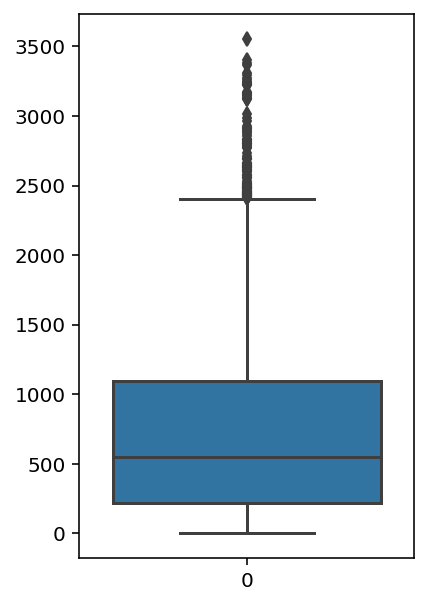

In [32]:
plt.figure(figsize=(3,5))
sns.boxplot(data=cycle['Rented Bike Count'])

In [33]:
Q1 = cycle['Rented Bike Count'].quantile(0.25)
Q3 = cycle['Rented Bike Count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cycle[cycle['Rented Bike Count']>=upper_bound] # 이상치 데이터 살펴보기

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day Of Week
2618,2018-04-16,2692,18,17.0,28,3.100000,2000,-1.6,0.88,0.0,0.0,Spring,No Holiday,2018,4,Monday
2787,2018-04-25,2807,18,21.2,32,3.800000,1927,3.8,0.94,0.0,0.0,Spring,No Holiday,2018,4,Wednesday
2809,2018-04-26,2574,18,17.4,45,1.803938,1092,5.3,0.75,0.0,0.0,Spring,No Holiday,2018,4,Thursday
2827,2018-04-27,2577,18,20.3,47,2.500000,705,8.6,0.77,0.0,0.0,Spring,No Holiday,2018,4,Friday
2886,2018-04-30,2558,18,23.0,54,2.900000,679,13.1,0.81,0.0,0.0,Spring,No Holiday,2018,4,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6153,2018-10-17,2445,18,14.6,39,2.300000,2000,0.7,0.11,0.0,0.0,Autumn,No Holiday,2018,10,Wednesday
6189,2018-10-19,2631,18,16.6,40,2.400000,2000,2.9,0.11,0.0,0.0,Autumn,No Holiday,2018,10,Friday
6265,2018-10-23,2415,18,14.5,71,2.100000,1235,9.2,0.06,0.0,0.0,Autumn,No Holiday,2018,10,Tuesday
6283,2018-10-24,2612,18,15.1,53,1.431100,2000,5.5,0.06,0.0,0.0,Autumn,No Holiday,2018,10,Wednesday


In [34]:
cycle[cycle['Rented Bike Count']>=upper_bound]['Hour'].value_counts() #그 중 Hour에 집중하여 살펴보기

18    62
19    30
20    12
17     4
21     3
8      2
16     2
Name: Hour, dtype: int64

-> 출퇴근 시간이 대부분을 차지했는데 출퇴근 길에는 대여량이 많을 수 밖에 없기 때문에 이 데이터 값들은 이상치가 아니라고 생각된다.

## Hour

<AxesSubplot:xlabel='Hour', ylabel='count'>

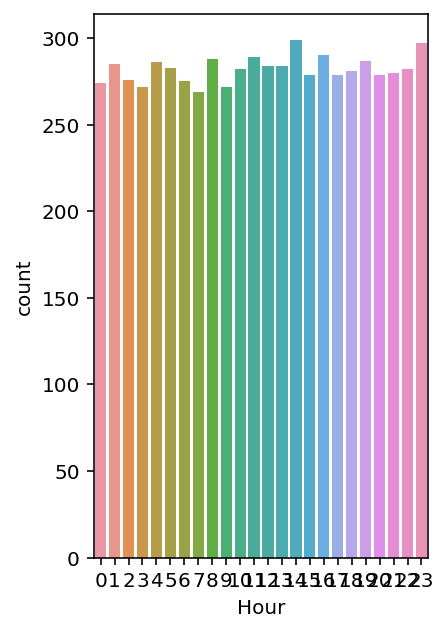

In [35]:
plt.figure(figsize=(3,5))
sns.countplot(x=cycle['Hour'])

-> 데이터가 하루 24시간에 맞게 되어있다. 이상치가 없다.

## Temperature(°C)

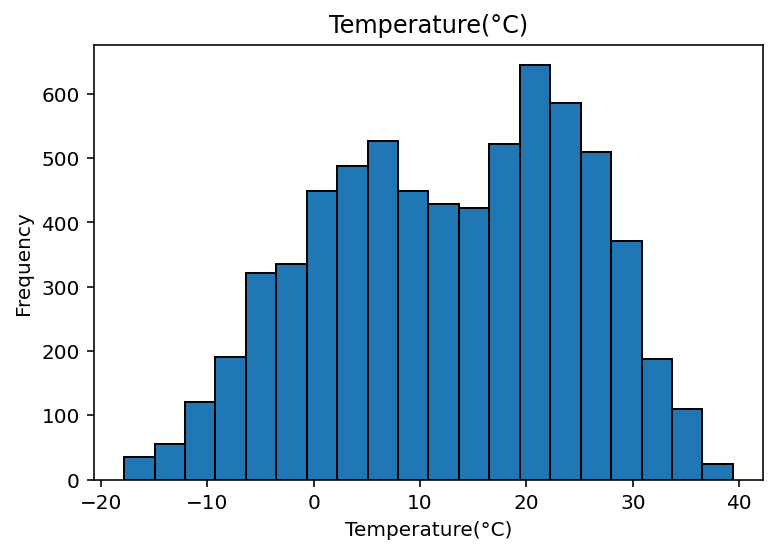

In [36]:
plt.hist(cycle['Temperature(°C)'], bins=20, edgecolor='black')
plt.xlabel('Temperature(°C)')
plt.ylabel('Frequency')
plt.title('Temperature(°C)')
plt.show()

In [37]:
cycle['Temperature(°C)'].describe()

count    6772.000000
mean       12.840255
std        12.068252
min       -17.800000
25%         3.300000
50%        13.600000
75%        22.700000
max        39.400000
Name: Temperature(°C), dtype: float64

- -17.8도부터 37.4도까지 존재한다. 이는 우리나라에서 측정 가능한 기온 범위에 해당하기 때문에 가능하다.

### 계절별로 기온의 분포도를 살펴보겠다.

### 봄

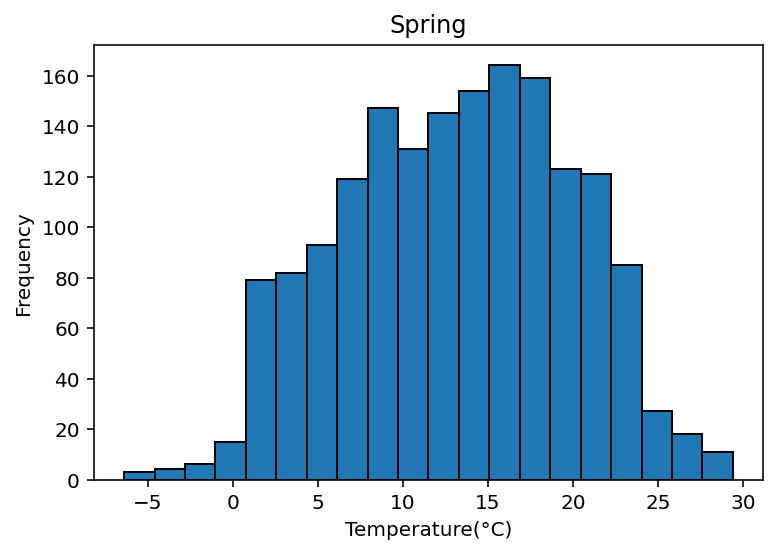

In [38]:
plt.hist(cycle[cycle['Seasons']=='Spring']['Temperature(°C)'], bins=20, edgecolor='black')
plt.xlabel('Temperature(°C)')
plt.ylabel('Frequency')
plt.title('Spring')
plt.show()

In [39]:
cycle[cycle['Seasons']=='Spring']['Temperature(°C)'].describe() # 봄 기온 데이터 확인

count    1686.000000
mean       13.160642
std         6.639320
min        -6.400000
25%         8.200000
50%        13.500000
75%        18.186765
max        29.400000
Name: Temperature(°C), dtype: float64

-> 봄은 -6.4도 부터 29.4도까지 이상한 데이터로 보이는 값은 없다.

### 여름

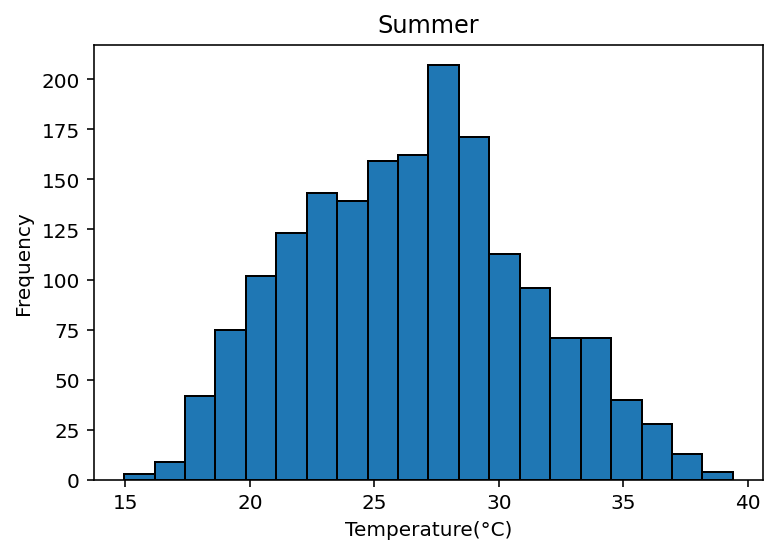

In [40]:
plt.hist(cycle[cycle['Seasons']=='Summer']['Temperature(°C)'], bins=20, edgecolor='black')
plt.xlabel('Temperature(°C)')
plt.ylabel('Frequency')
plt.title('Summer')
plt.show()

In [41]:
cycle[cycle['Seasons']=='Summer']['Temperature(°C)'].describe() # 여름 기온 데이터 확인

count    1771.000000
mean       26.567088
std         4.596845
min        14.950000
25%        23.100000
50%        26.700000
75%        29.600000
max        39.400000
Name: Temperature(°C), dtype: float64

-> 여름은 14.95도 부터 39.4도까지 이상한 값으로 보이는 데이터는 없다.

### 가을

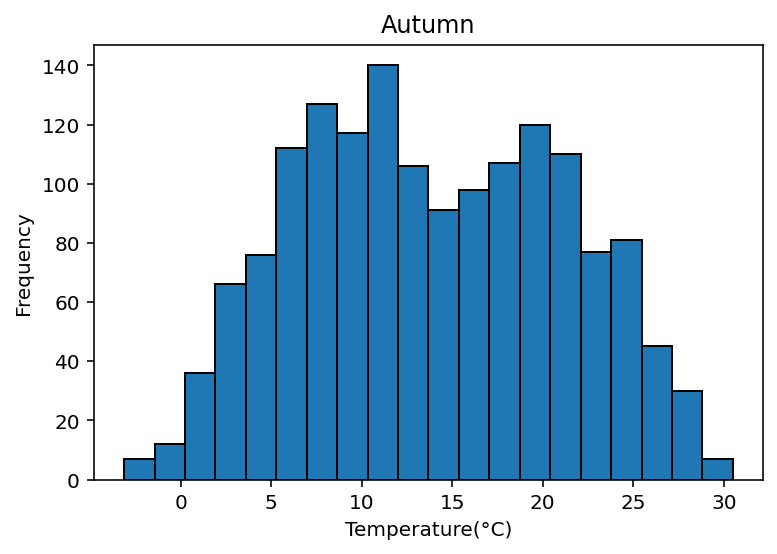

In [42]:
plt.hist(cycle[cycle['Seasons']=='Autumn']['Temperature(°C)'], bins=20, edgecolor='black')
plt.xlabel('Temperature(°C)')
plt.ylabel('Frequency')
plt.title('Autumn')
plt.show()

In [43]:
cycle[cycle['Seasons']=='Autumn']['Temperature(°C)'].describe() # 가을 기온 데이터 확인

count    1565.000000
mean       13.893227
std         7.258039
min        -3.126667
25%         7.900000
50%        13.400000
75%        19.900000
max        30.500000
Name: Temperature(°C), dtype: float64

-> 가을은 약 -3도 부터 30.5도까지 이상한 값으로 보이는 데이터는 없다.

### 겨울

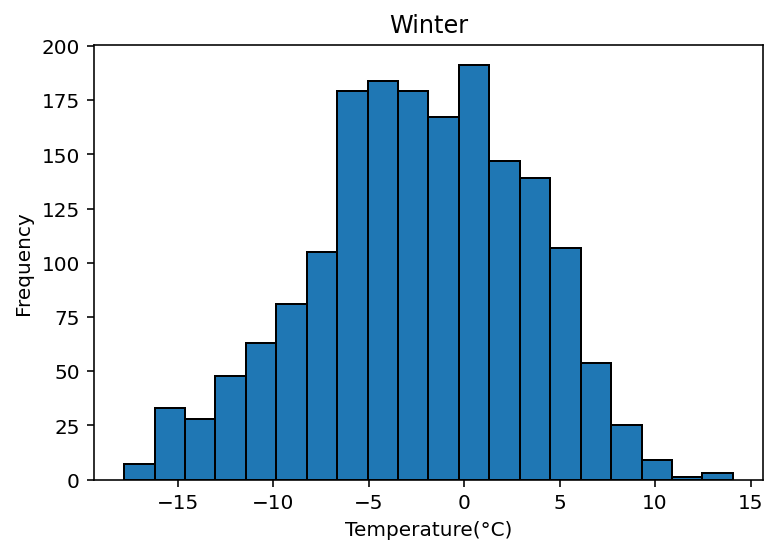

In [44]:
plt.hist(cycle[cycle['Seasons']=='Winter']['Temperature(°C)'], bins=20, edgecolor='black')
plt.xlabel('Temperature(°C)')
plt.ylabel('Frequency')
plt.title('Winter')
plt.show()

In [45]:
cycle[cycle['Seasons']=='Winter']['Temperature(°C)'].describe() # 겨울 기온 데이터 확인

count    1750.000000
mean       -2.301628
std         5.619651
min       -17.800000
25%        -6.000000
50%        -2.200000
75%         1.900000
max        14.072727
Name: Temperature(°C), dtype: float64

겨울은 -17.8도 부터 약 14도 까지 이상한 값으로 보이는 데이터는 보이지 않는다.

### => 기온 데이터에 이상치는 없는 것으로 판단된다.

## Humidity(%)

### 위에서 말했듯이 습도가 0인 데이터들을 이상치로 판단하여, 모두 NaN값으로 대체한 후 스플라인 보간법으로 결측치들을 대체할 것이다

In [46]:
cycle.loc[cycle['Humidity(%)'] == 0, 'Humidity(%)'] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [47]:
cycle['Humidity(%)']=cycle['Humidity(%)'].interpolate(method='spline',order=3)

<ipython-input-47-580723690aea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cycle['Humidity(%)']=cycle['Humidity(%)'].interpolate(method='spline',order=3)


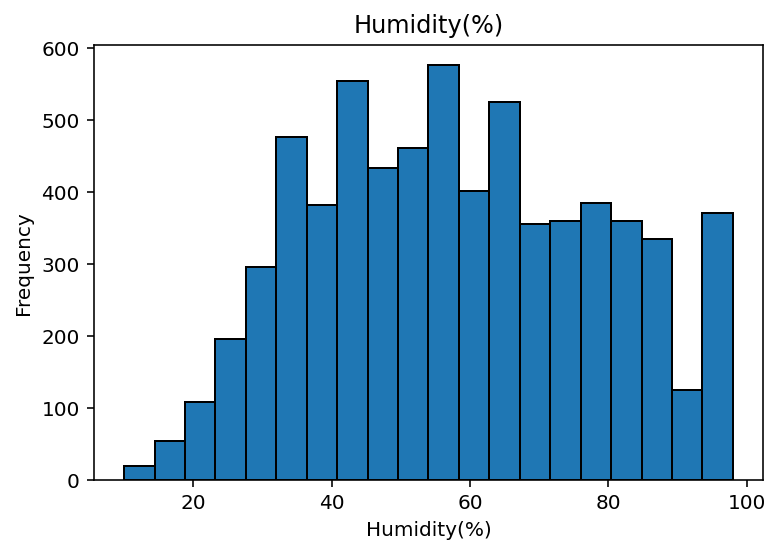

In [48]:
plt.hist(cycle['Humidity(%)'], bins=20, edgecolor='black')
plt.xlabel('Humidity(%)')
plt.ylabel('Frequency')
plt.title('Humidity(%)')
plt.show()

<AxesSubplot:>

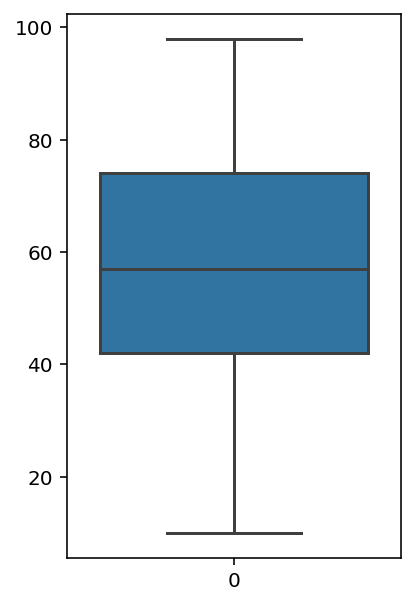

In [49]:
plt.figure(figsize=(3,5))
sns.boxplot(data=cycle['Humidity(%)'])

-> 습도가 0인 데이터를 대체했고, 나머지 데이터값에는 이상치가 없어보인다.

## Wind speed (m/s)

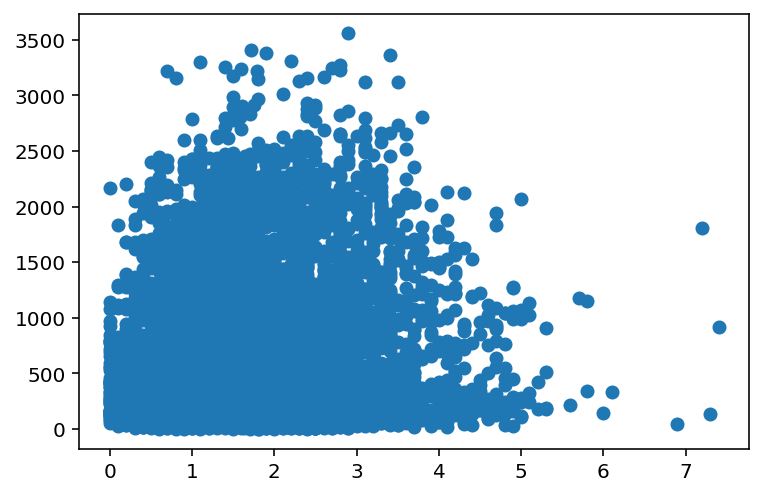

In [50]:
plt.scatter(x=cycle['Wind speed (m/s)'],y=cycle['Rented Bike Count']) # 산점도로 이상치 확인해보기

#### -> 풍속이 7m/s를 넘는 3개의 데이터를 확인해보자

In [51]:
cycle[cycle['Wind speed (m/s)']>7]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day Of Week
2503,2018-04-10,913,14,21.200000,35.0,7.4,1992,5.1,1.8,0.0,0.0,Spring,No Holiday,2018,4,Tuesday
2506,2018-04-10,1805,18,19.700000,52.0,7.2,2000,9.5,0.2,0.0,0.0,Spring,No Holiday,2018,4,Tuesday
2509,2018-04-10,133,21,22.131818,70.0,7.3,1634,11.9,0.0,0.5,0.0,Spring,No Holiday,2018,4,Tuesday


#### -> 기상청을 확인해보았을 때 이 데이터는 맞는 데이터임을 알 수 있었다.

계절에 따른 풍속의 분포도 확인해보자.

## 봄

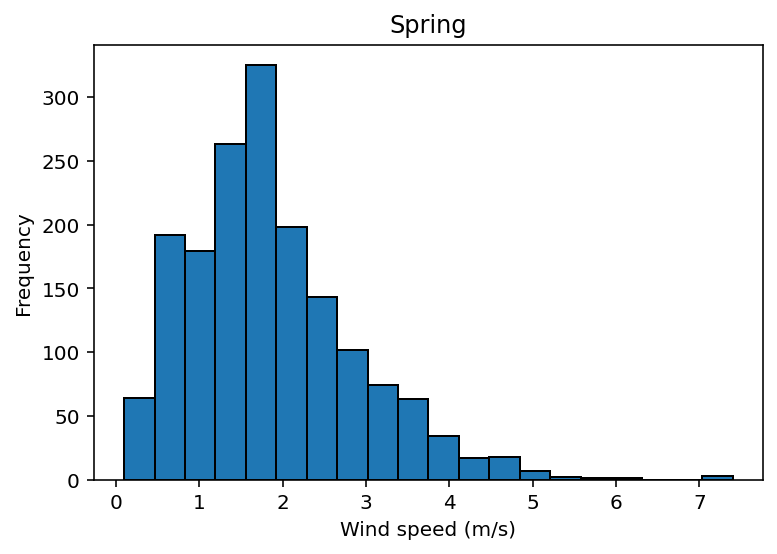

In [52]:
plt.hist(cycle[cycle['Seasons']=='Spring']['Wind speed (m/s)'], bins=20, edgecolor='black')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Frequency')
plt.title('Spring')
plt.show()

In [53]:
cycle[cycle['Seasons']=='Spring']['Wind speed (m/s)'].describe() # 봄 풍속 데이터 확인

count    1686.000000
mean        1.854877
std         1.006563
min         0.100000
25%         1.100000
50%         1.700000
75%         2.400000
max         7.400000
Name: Wind speed (m/s), dtype: float64

## 여름

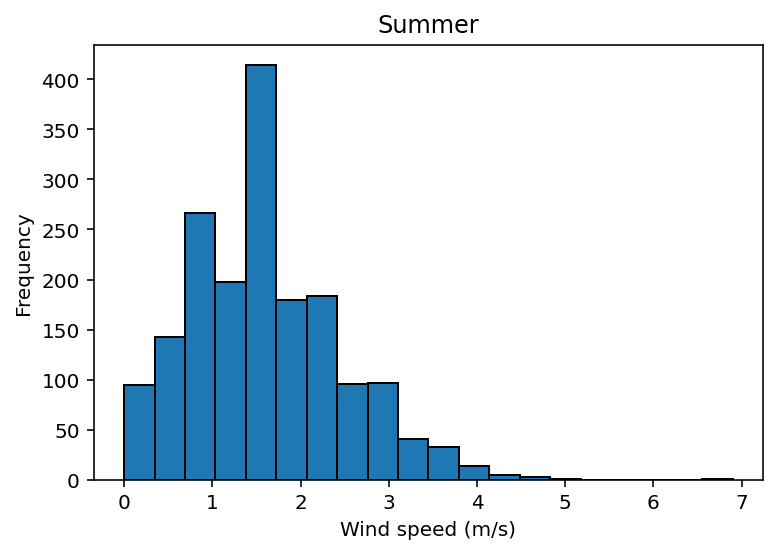

In [54]:
plt.hist(cycle[cycle['Seasons']=='Summer']['Wind speed (m/s)'], bins=20, edgecolor='black')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Frequency')
plt.title('Summer')
plt.show()

In [55]:
cycle[cycle['Seasons']=='Summer']['Wind speed (m/s)'].describe() # 여름 풍속 데이터 확인

count    1771.000000
mean        1.607364
std         0.866927
min         0.000000
25%         1.000000
50%         1.500564
75%         2.100000
max         6.900000
Name: Wind speed (m/s), dtype: float64

## 가을

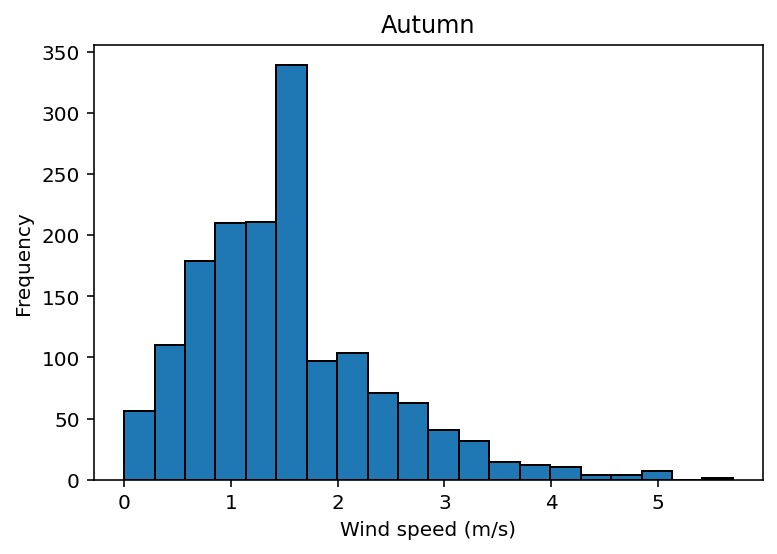

In [56]:
plt.hist(cycle[cycle['Seasons']=='Autumn']['Wind speed (m/s)'], bins=20, edgecolor='black')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Frequency')
plt.title('Autumn')
plt.show()

In [57]:
cycle[cycle['Seasons']=='Autumn']['Wind speed (m/s)'].describe() # 가을 풍속 데이터 확인


count    1565.000000
mean        1.512399
std         0.867406
min         0.000000
25%         0.900000
50%         1.431850
75%         1.900000
max         5.700000
Name: Wind speed (m/s), dtype: float64

# 겨울

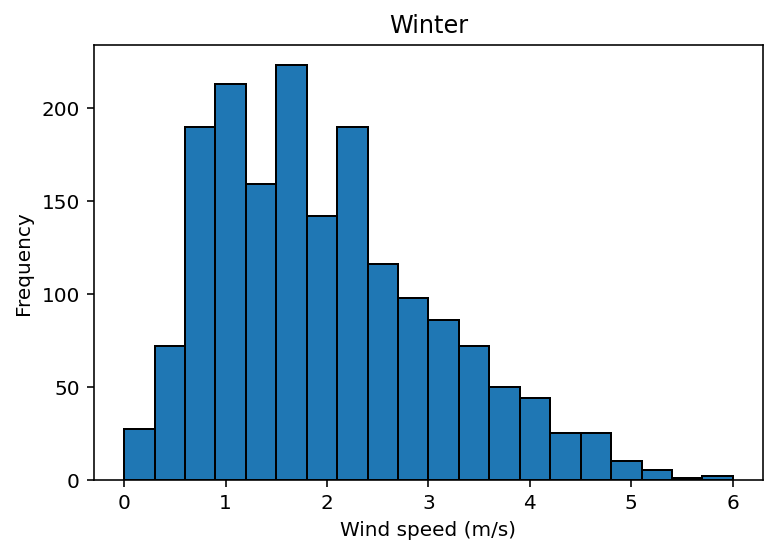

In [58]:
plt.hist(cycle[cycle['Seasons']=='Winter']['Wind speed (m/s)'], bins=20, edgecolor='black')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Frequency')
plt.title('Winter')
plt.show()

In [59]:
cycle[cycle['Seasons']=='Winter']['Wind speed (m/s)'].describe() # 겨울 풍속 데이터 확인

count    1750.000000
mean        1.945440
std         1.088007
min         0.000000
25%         1.100000
50%         1.771255
75%         2.600000
max         6.000000
Name: Wind speed (m/s), dtype: float64

#### -> 풍속에서의 이상치는 없다고 판단했다.

## Visibility (10m)

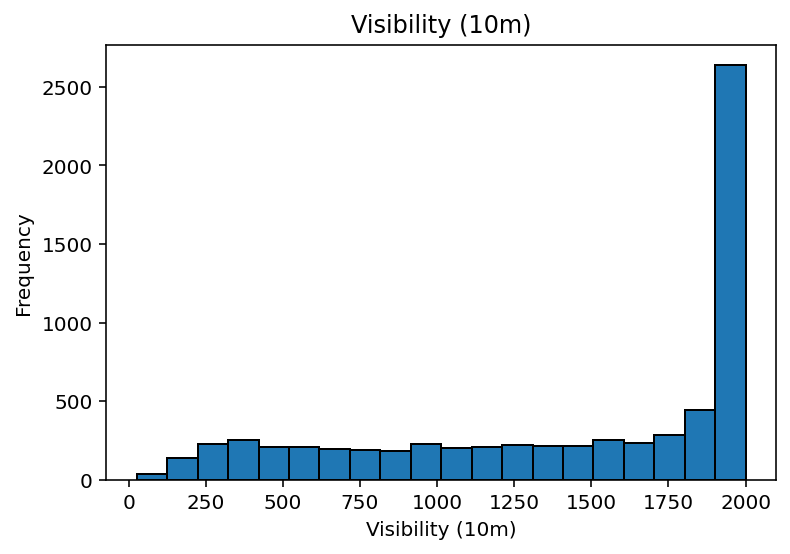

In [60]:
plt.hist(cycle['Visibility (10m)'], bins=20, edgecolor='black')
plt.xlabel('Visibility (10m)')
plt.ylabel('Frequency')
plt.title('Visibility (10m)')
plt.show()

In [61]:
cycle['Visibility (10m)'].describe()

count    6772.000000
mean     1438.199350
std       608.305959
min        27.000000
25%       943.750000
50%      1696.500000
75%      2000.000000
max      2000.000000
Name: Visibility (10m), dtype: float64

#### -> 시야가 최소 270m, 최대 20km로 큰 차이를 보이고 있는데 시야가 270m라는 게 의심이 간다. 한 번 확인해보자.

In [62]:
cycle[cycle['Visibility (10m)']==27]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day Of Week
3117,2018-05-13,83,4,13.8,98.0,2.9,27,13.4,0.0,0.0,0.0,Spring,No Holiday,2018,5,Sunday


#### -> 기상청의 데이터를 확인해보았을 때, 실제로 맞는 데이터임을 알 수 있었다.

#### + 시야가 20km인 데이터도 살펴보자. 

In [63]:
cycle[cycle['Visibility (10m)']==2000]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day Of Week
0,2017-12-01,254,0,-5.2,37.0,2.200000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,2017,12,Friday
1,2017-12-01,204,1,-5.5,38.0,0.800000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,2017,12,Friday
2,2017-12-01,173,2,-6.0,39.0,1.000000,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,2017,12,Friday
3,2017-12-01,107,3,-6.2,40.0,0.900000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,2017,12,Friday
4,2017-12-01,78,4,-6.0,36.0,1.580633,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,2017,12,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6876,2018-11-24,507,1,2.4,30.0,1.300000,2000,-13.4,0.00,0.0,0.0,Autumn,No Holiday,2018,11,Saturday
6877,2018-11-24,335,2,2.5,29.0,1.800000,2000,-13.7,0.00,0.0,0.0,Autumn,No Holiday,2018,11,Saturday
6878,2018-11-24,95,5,3.2,27.0,1.600000,2000,-14.0,0.00,0.0,0.0,Autumn,No Holiday,2018,11,Saturday
6879,2018-11-24,79,6,3.7,25.0,2.300000,2000,-14.5,0.00,0.0,0.0,Autumn,No Holiday,2018,11,Saturday


-> 정확히 2000km인 데이터가 이렇게 많은 게 의심이 된다.

#### * 지상기상관측지침을 확인했을 때, "시정이 방향에 따라 다를 경우에는 최소시정을 취한다."라고 적혀있는 것으로 보아 이 경우의 최소시정이 20km였다고 생각한다. 즉, 20km인 데이터들이 정확히 20km가 아니라 20km 이상인 데이터들이라는 것을 알 수 있다.

## Dew point temperature(°C)

박스플랏

<AxesSubplot:>

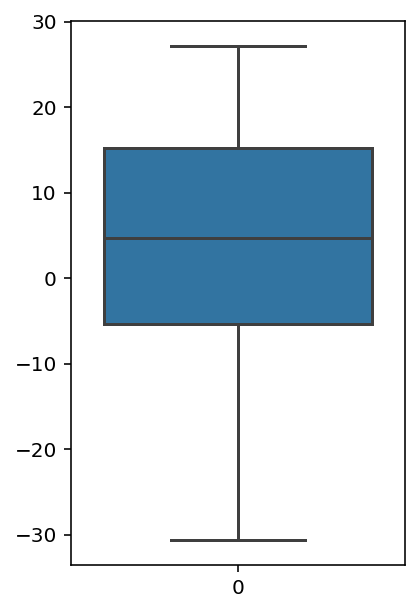

In [64]:
plt.figure(figsize=(3,5))
sns.boxplot(data=cycle['Dew point temperature(°C)'])

히스토그램

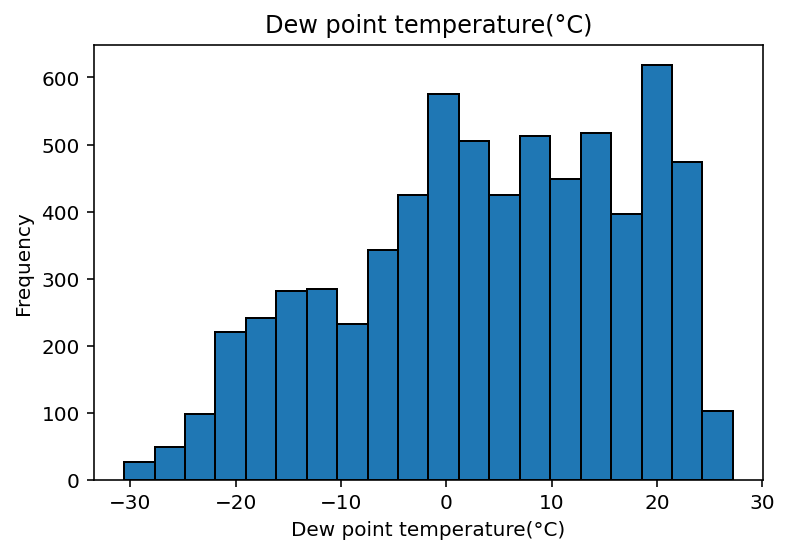

In [65]:
plt.hist(cycle['Dew point temperature(°C)'], bins=20, edgecolor='black')
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Frequency')
plt.title('Dew point temperature(°C)')
plt.show()

In [66]:
cycle['Dew point temperature(°C)'].describe()

count    6772.000000
mean        3.913290
std        13.304493
min       -30.600000
25%        -5.300000
50%         4.700000
75%        15.200000
max        27.200000
Name: Dew point temperature(°C), dtype: float64

#### -> 크게 튀어보이는 이상치는 보이지 않는다.

## Solar Radiation (MJ/m2)

#### 일사량은 계절별, 시간대별로 확인해보는 것이 좋을 것 같다.

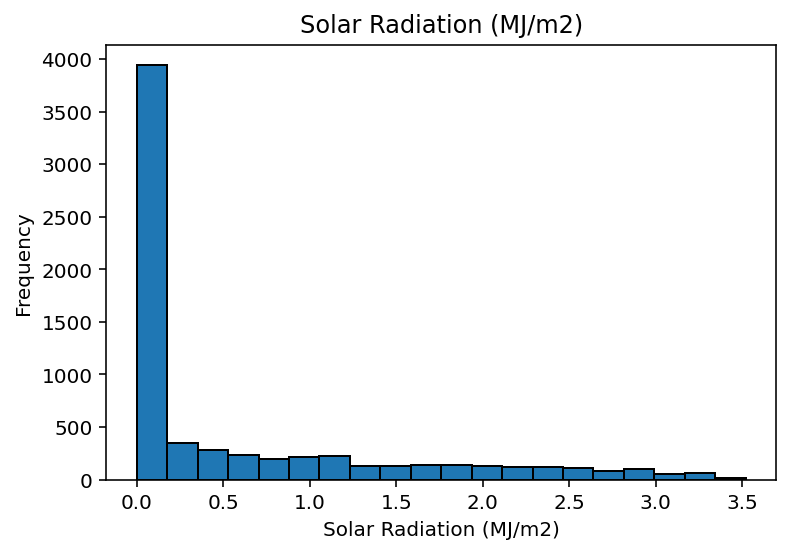

In [67]:
# 전체적인 데이터의 분포 확인
plt.hist(cycle['Solar Radiation (MJ/m2)'], bins=20, edgecolor='black')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Frequency')
plt.title('Solar Radiation (MJ/m2)')
plt.show()

#### -> 0인 데이터가 너무 많음. 확인해보자.

In [68]:
cycle[cycle['Solar Radiation (MJ/m2)']==0]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day Of Week
0,2017-12-01,254,0,-5.2,37.0,2.200000,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,12,Friday
1,2017-12-01,204,1,-5.5,38.0,0.800000,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,12,Friday
2,2017-12-01,173,2,-6.0,39.0,1.000000,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,2017,12,Friday
3,2017-12-01,107,3,-6.2,40.0,0.900000,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,2017,12,Friday
4,2017-12-01,78,4,-6.0,36.0,1.580633,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,2017,12,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2018-11-30,750,7,-1.2,70.0,0.800000,1351,-5.9,0.0,0.0,0.0,Autumn,No Holiday,2018,11,Friday
7004,2018-11-30,1384,18,4.7,34.0,1.900000,1661,-9.8,0.0,0.0,0.0,Autumn,No Holiday,2018,11,Friday
7005,2018-11-30,1003,19,4.2,34.0,2.600000,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,2018,11,Friday
7006,2018-11-30,694,21,2.6,39.0,0.300000,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,2018,11,Friday


#### 일사량이 0인 데이터를 zero라고 하자

In [69]:
zero=cycle[cycle['Solar Radiation (MJ/m2)']==0]

#### 계절별로 나누자.

In [70]:
zero_spring=zero[zero['Seasons']=='Spring'] # 봄, 일사량이 0인 데이터
zero_summer=zero[zero['Seasons']=='Summer'] # 여름, 일사량이 0인 데이터
zero_autumn=zero[zero['Seasons']=='Autumn'] # 가을, 일사량이 0인 데이터
zero_winter=zero[zero['Seasons']=='Winter'] # 겨울, 일사량이 0인 데이터

<AxesSubplot:xlabel='Hour', ylabel='count'>

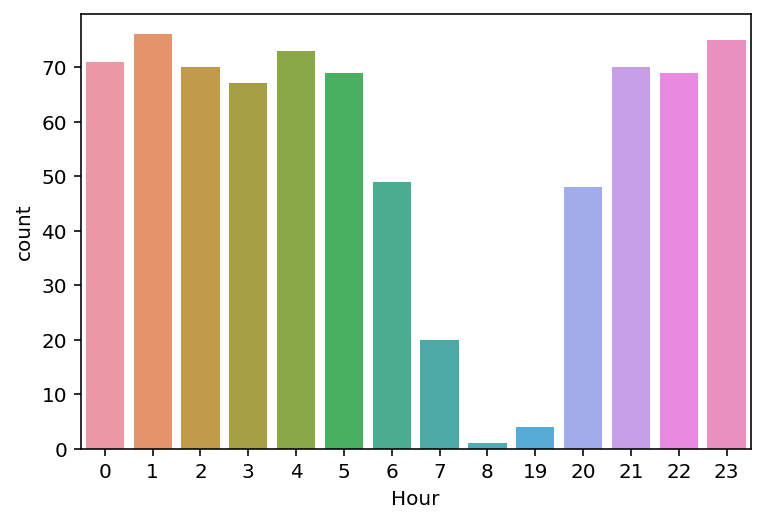

In [71]:
sns.countplot(x='Hour',data=zero_spring) # 봄: 해가 06:30~18:40/05:10~19:45 떠있음. (/를 기준으로 왼쪽은 봄의 초반부, 오른쪽은 후반부)

In [72]:
zero_spring[zero_spring['Hour'].isin([8,19])]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day Of Week
1875,2018-03-07,799,19,8.9,44.0,2.3,2000,-2.7,0.0,0.0,0.0,Spring,No Holiday,2018,3,Wednesday
2010,2018-03-15,39,8,14.1,97.0,1.1,342,13.6,0.0,0.0,0.0,Spring,No Holiday,2018,3,Thursday
2466,2018-04-08,44,19,2.5,94.0,1.8,349,1.6,0.0,1.0,0.0,Spring,No Holiday,2018,4,Sunday
2917,2018-05-02,131,19,12.6,93.0,3.9,831,11.4,0.0,0.0,0.0,Spring,No Holiday,2018,5,Wednesday
3110,2018-05-12,29,19,15.5,97.0,0.7,403,15.0,0.0,2.0,0.0,Spring,No Holiday,2018,5,Saturday


- 1행은 3월의 초반으로, 해가 일찍 져서 일사량이 0으로 나온 것 같아보인다.
- 2,4행은 습도가 굉장히 높고 시야도 좁게 측정된 것으로 보아 구름이 가득한 날이었을 것으로 보인다.
- 3,5행 또한 습도가 높고 시야도 좁다. 게다가 비도 온 것으로 보아 해가 잘 보이지 않았을 것으로 보인다.

<AxesSubplot:xlabel='Hour', ylabel='count'>

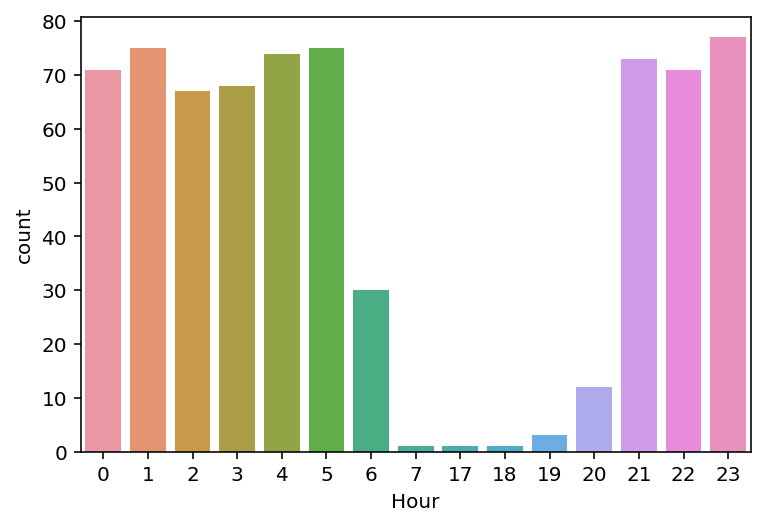

In [73]:
sns.countplot(x='Hour',data=zero_summer) #여름: 해가 05:10~19:57/06:05~18:57 떠있음. (/를 기준으로 왼쪽은 여름의 초반부, 오른쪽은 후반부)

In [74]:
zero_summer[zero_summer['Hour'].isin([7,17,18])]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day Of Week
3735,2018-06-14,94,7,19.4,97.0,0.900000,272,18.9,0.0,13.5,0.0,Summer,No Holiday,2018,6,Thursday
5202,2018-08-29,160,17,24.6,93.0,0.900000,1451,23.3,0.0,1.5,0.0,Summer,No Holiday,2018,8,Wednesday
5203,2018-08-29,57,18,23.9,96.0,1.686735,991,23.2,0.0,1.5,0.0,Summer,No Holiday,2018,8,Wednesday


- 1행은 습도가 굉장히 높고 시야도 좁으며 비도 많이 온 것으로 보아 해가 떴음에도 구름에 가려졌을 것으로 보인다.
- 2,3행도 마찬가지로 습도가 높고 시야도 좁고 비도 왔기 때문에 해가 잘 보이지 않았을 것이다.

<AxesSubplot:xlabel='Hour', ylabel='count'>

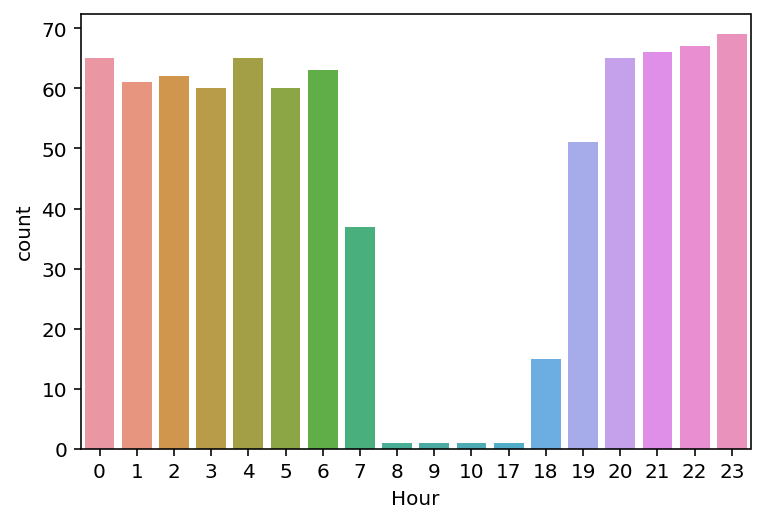

In [75]:
sns.countplot(x='Hour',data=zero_autumn) #가을: 06:15~18:25/07:20~17:15 떠있음. (/를 기준으로 왼쪽은 가을의 초반부, 오른쪽은 후반부)

In [76]:
zero_autumn[zero_autumn['Hour'].isin([8,9,10,17])]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day Of Week
6314,2018-10-26,556,8,12.1,81.0,1.433267,706,8.9,0.0,0.5,0.0,Autumn,No Holiday,2018,10,Friday
6580,2018-11-08,30,17,11.9,97.0,0.700000,269,11.4,0.0,0.0,0.0,Autumn,No Holiday,2018,11,Thursday
6880,2018-11-24,24,9,0.3,97.0,3.000000,34,-0.1,0.0,9.1,7.1,Autumn,No Holiday,2018,11,Saturday
6881,2018-11-24,62,10,0.4,97.0,1.459457,207,0.0,0.0,0.0,8.8,Autumn,No Holiday,2018,11,Saturday


- 모두 비가 오거나 눈이 온 경우들로, 날씨가 좋지 않아 해가 보이지 않아 일사량이 0으로 측정된 것 같다. (2행의 경우에는 비나 눈이 오지 않았지만 습도가 굉장히 높고 시야도 좁은 것으로 보아 날씨는 좋지 못했던 것 같다.)

<AxesSubplot:xlabel='Hour', ylabel='count'>

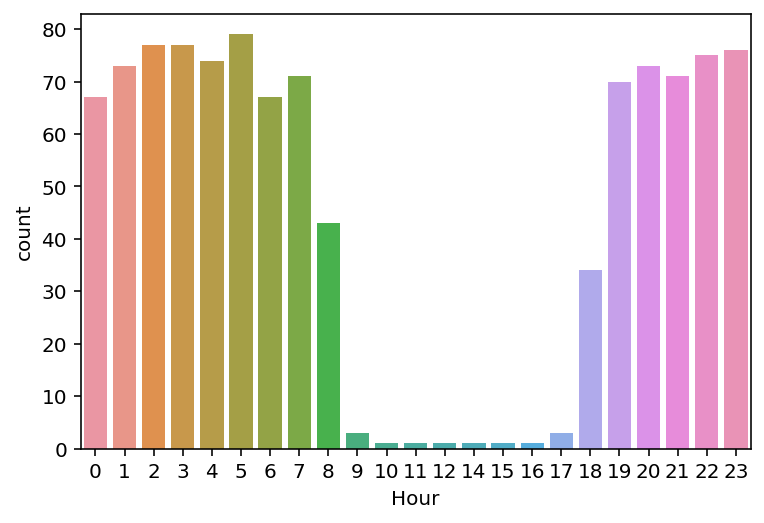

In [77]:
sns.countplot(x='Hour',data=zero_winter) #겨울: 07:35~17:15/06:55~18:20 떠있음. (/를 기준으로 왼쪽은 겨울의 초반부, 오른쪽은 후반부)

In [78]:
zero_winter[zero_winter['Hour'].isin([10,11,12,14,15,16])]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day Of Week
89,2017-12-05,334,11,-8.728571,25.0,0.000000,1959,-21.0,0.0,0.0,0.0,Winter,No Holiday,2017,12,Tuesday
90,2017-12-05,334,14,-1.100000,28.0,0.000000,2000,-17.3,0.0,0.0,0.0,Winter,No Holiday,2017,12,Tuesday
91,2017-12-05,435,16,-0.500000,30.0,0.000000,2000,-16.0,0.0,0.0,0.0,Winter,No Holiday,2017,12,Tuesday
182,2017-12-10,19,10,0.500000,91.0,0.400000,143,-0.8,0.0,0.0,4.3,Winter,No Holiday,2017,12,Sunday
927,2018-01-18,267,12,2.500000,72.0,1.894271,256,-2.0,0.0,0.0,0.0,Winter,No Holiday,2018,1,Thursday
1100,2018-01-26,140,15,-11.400000,27.0,3.300000,1805,-26.7,0.0,0.0,0.4,Winter,No Holiday,2018,1,Friday


- 1,2,3행은 모두 같은 날이다. 시간대도 해가 떠있을 시간이고, 습도도 높지 않고 시야도 넓고 강수,강우 여부도 종합해서 보았을 때, 이상치로 의심된다. 기상청 데이터를 확인해보자.
-> 1행 시간대 전국의 일사량 데이터를 보았을 때 0인 데이터는 보이지 않았다. 따라서 이 값은 기상청에서 서울 데이터인 0.93으로 대체하도록 하겠다.
-> 2행도 마찬가지로 0인 데이터는 보이지 않았다. 근데 기상청 데이터에서 서울은 이 날 오전 8~10시만 측정되어 있다. 따라서 경기도 데이터인 1.4로 대체하겠다.
-> 3행도 마찬가지로 0인 데이터는 보이지 않았다. 근데 기상청 데이터에서 서울은 이 날 오전 8~10시만 측정되어 있다. 따라서 경기도 데이터인 0.67로 대체하겠다. 
- 4,6행은 눈이 왔기에 일사량이 0이었을 수 있다. 5행은 시야가 좁은 것으로 보이긴 하지만 눈, 비가 오지 않았고 습도가 높은 것도 아니다. 기상청 데이터를 확인해보자.
-> 5행의 날의 이 시간대의 서울 데이터가 빠져있음을 확인했다. 따라서 오전 11시(0.35)와 오후1시(0.68) 값의 평균인 0.515로 대체하도록 하겠다. 

In [79]:
cycle.loc[89, 'Solar Radiation (MJ/m2)'] = 0.93
cycle.loc[90, 'Solar Radiation (MJ/m2)'] = 1.4
cycle.loc[91, 'Solar Radiation (MJ/m2)'] = 0.67
cycle.loc[927, 'Solar Radiation (MJ/m2)'] = 0.515

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


## Rainfall(mm)

<AxesSubplot:xlabel='Rainfall(mm)', ylabel='count'>

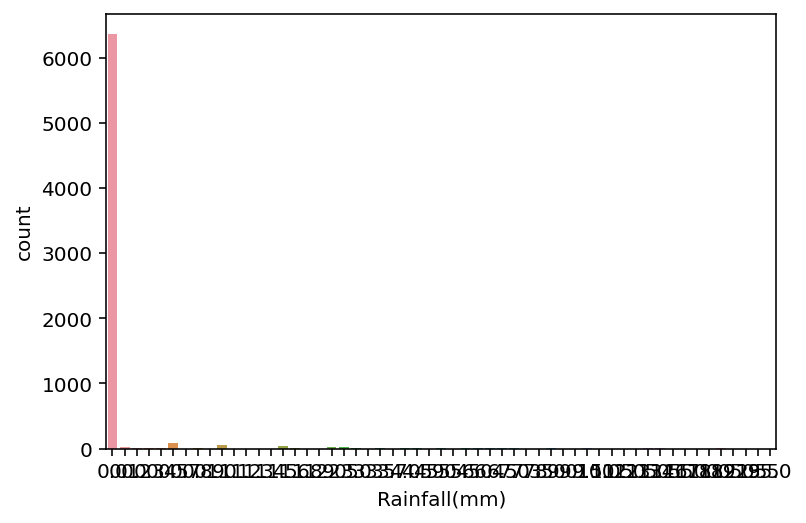

In [80]:
sns.countplot(x=cycle['Rainfall(mm)'])

#### -> 0인 값이 압도적으로 많다. 그럼 0이 아닌 값들을 살펴보자.
#### - 비가 온 날이라면 습도가 보통 70%이상이라고 한다. 따라서 비가 온 날 중 습도가 70%보다 낮은 데이터들을 살펴보자

In [81]:
cycle[(cycle['Rainfall(mm)']!=0) & (cycle['Humidity(%)']<=70)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day Of Week
768,2018-01-10,40,3,-6.100000,70.0,1.1,2000,-10.6,0.00,0.3,0.8,Winter,No Holiday,2018,1,Wednesday
833,2018-01-13,174,12,-3.700000,66.0,1.1,1140,-9.1,0.45,0.2,0.4,Winter,No Holiday,2018,1,Saturday
1252,2018-02-03,33,6,-7.800000,57.0,4.8,1867,-14.8,0.00,0.4,0.3,Winter,No Holiday,2018,2,Saturday
2436,2018-04-07,80,4,1.600000,70.0,3.6,1392,-3.2,0.00,0.1,0.0,Spring,No Holiday,2018,4,Saturday
2509,2018-04-10,133,21,22.131818,70.0,7.3,1634,11.9,0.00,0.5,0.0,Spring,No Holiday,2018,4,Tuesday
2717,2018-04-22,486,10,16.300000,62.0,0.8,1639,8.9,0.27,0.3,0.0,Spring,No Holiday,2018,4,Sunday
2722,2018-04-22,234,15,19.600000,44.0,2.4,1885,7.0,0.47,0.2,0.0,Spring,No Holiday,2018,4,Sunday
2724,2018-04-22,32,19,15.200000,64.0,1.7,1185,8.4,0.02,0.5,0.0,Spring,No Holiday,2018,4,Sunday
3177,2018-05-16,145,2,23.900000,69.0,0.3,531,17.8,0.00,0.2,0.0,Spring,No Holiday,2018,5,Wednesday
3645,2018-06-09,246,20,23.700000,62.0,1.6,1402,15.9,0.00,0.4,0.0,Summer,No Holiday,2018,6,Saturday


#### 대부분 습도가 60~70%정도 되는 것으로 보아 크게 이상치로 보이는 데이터는 없다. 2702행에 습도가 44%인 날이 있는데 그 날 강수량이 0.2mm인 것을 보면 이슬비가 잠시 내린 것으로, 습도가 44%임을 이해할 수 있다. 

## Snowfall (cm)

- 우선 겨울이 아닌 경우에 눈이 온 경우를 확인해보자.

In [82]:
cycle_snow=cycle[cycle['Snowfall (cm)']!=0]
cycle_snow[cycle_snow['Seasons']!='Winter']

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day Of Week
6880,2018-11-24,24,9,0.300000,97.0,3.000000,34,-0.1,0.00,9.1,7.1,Autumn,No Holiday,2018,11,Saturday
6881,2018-11-24,62,10,0.400000,97.0,1.459457,207,0.0,0.00,0.0,8.8,Autumn,No Holiday,2018,11,Saturday
6882,2018-11-24,114,11,1.200000,97.0,2.300000,975,0.7,0.07,0.0,8.8,Autumn,No Holiday,2018,11,Saturday
6883,2018-11-24,167,12,2.500000,84.0,1.459344,1538,0.0,0.40,1.8,7.0,Autumn,No Holiday,2018,11,Saturday
6884,2018-11-24,298,14,3.000000,82.0,1.700000,1589,0.2,0.55,0.0,5.0,Autumn,No Holiday,2018,11,Saturday
6885,2018-11-24,330,15,3.700000,78.0,2.000000,1314,0.2,0.81,0.0,4.1,Autumn,No Holiday,2018,11,Saturday
6886,2018-11-24,436,16,3.500000,82.0,1.600000,1092,0.7,0.51,0.0,3.6,Autumn,No Holiday,2018,11,Saturday
6887,2018-11-24,435,17,2.900000,85.0,1.459118,1000,0.6,0.20,0.0,3.5,Autumn,No Holiday,2018,11,Saturday
6888,2018-11-24,426,18,2.600000,86.0,1.459062,834,0.4,0.00,0.0,3.5,Autumn,No Holiday,2018,11,Saturday
6889,2018-11-24,420,19,2.600000,85.0,1.200000,797,0.3,0.00,0.0,3.3,Autumn,No Holiday,2018,11,Saturday


-> 2018년 11월 24~26에 눈이 온 것으로 보이므로 기상청 데이터를 확인해보자.

-> 눈이 온 것으로 확인했다.

# 결측치, 이상치 마무리

In [83]:
len(cycle.index) # 결측치 제거한 후의 행의 수

6772

In [84]:
cycle.index=np.arange(6772) # 인덱스 예쁘게 고치기

In [85]:
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day Of Week
0,2017-12-01,254,0,-5.2,37.0,2.200000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,2017,12,Friday
1,2017-12-01,204,1,-5.5,38.0,0.800000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,2017,12,Friday
2,2017-12-01,173,2,-6.0,39.0,1.000000,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,2017,12,Friday
3,2017-12-01,107,3,-6.2,40.0,0.900000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,2017,12,Friday
4,2017-12-01,78,4,-6.0,36.0,1.580633,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,2017,12,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,2018-11-30,1047,17,6.0,29.0,2.100000,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,2018,11,Friday
6768,2018-11-30,1384,18,4.7,34.0,1.900000,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,2018,11,Friday
6769,2018-11-30,1003,19,4.2,34.0,2.600000,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,2018,11,Friday
6770,2018-11-30,694,21,2.6,39.0,0.300000,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,2018,11,Friday


### 결측치 대체 결과 확인

In [86]:
print(cycle.isna().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Year                         0
Month                        0
Day Of Week                  0
dtype: int64


-> 성공!

# 6. 변수들 간의 그래프

### 6-1. Date & Rented Bike Count

#### ->이 두 변수들의 그래프로 뭔가 알아내기보다는 날짜와 관련된 계절, 월별 데이터 등으로 알아보는 것이 좋을 것 같다.

### 6-2. Hour & Rented Bike Count
- 8시와 18시 부근이 눈에 띈다. 직장인들의 출근 시간과 퇴근시간이기 때문에 많은 이용수를 보인다는 걸 알 수 있다.

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

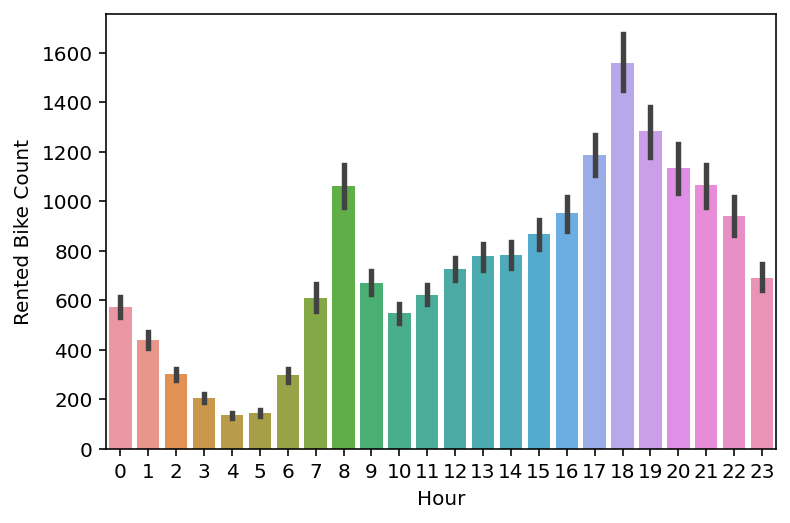

In [87]:
sns.barplot(x='Hour',y='Rented Bike Count',data=cycle)

### 6-3. Temperature(°C) & Rented Bike Count

- 20~30도에서 대여량이 높다는 것을 알 수 있다. (이 정도 기온이 자전거 타기 좋은 기온이지 않을까싶다.)
- 35도를 넘어가서도 대여량이 꽤 많은데 이 점은 다른 변수들과 엮어 알아보자.

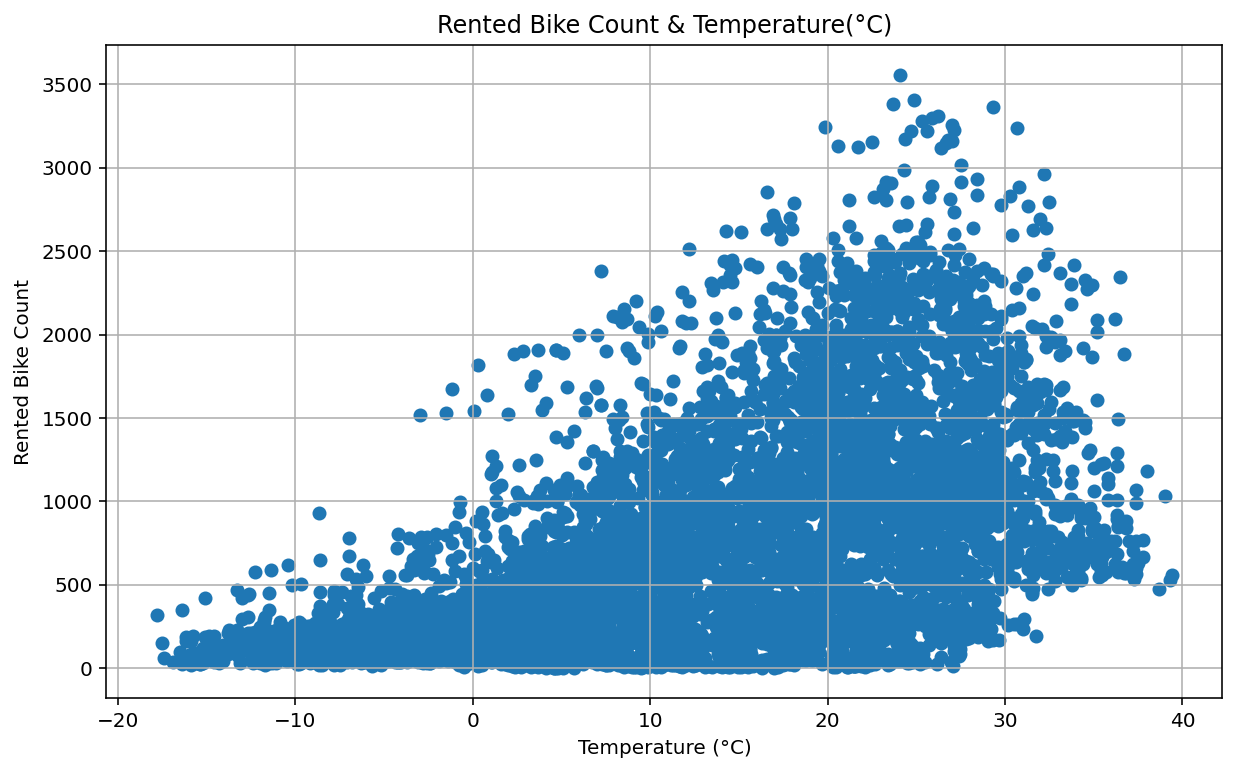

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Temperature(°C)'], cycle['Rented Bike Count'])
plt.title('Rented Bike Count & Temperature(°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

In [89]:
cycle[cycle['Temperature(°C)']>35]['Date'].value_counts()

2018-07-31    6
2018-07-30    6
2018-08-02    6
2018-07-22    6
2018-08-22    6
2018-07-29    5
2018-08-03    5
2018-08-01    5
2018-07-21    4
2018-08-14    4
2018-08-15    3
2018-08-10    3
2018-08-11    2
2018-08-07    1
2018-08-08    1
2018-07-27    1
2018-07-23    1
2018-08-16    1
2018-07-24    1
Name: Date, dtype: int64

-> 7월 중순부터 8월 중순까지 35도가 넘는 높은 온도가 계속해서 유지되었고 그 기간동안 자전거를 안 탈 수 없는 사람들이 탄 것 같다.

#### + 계절별로 기온에 따른 대여량을 알아보자.

#### 봄

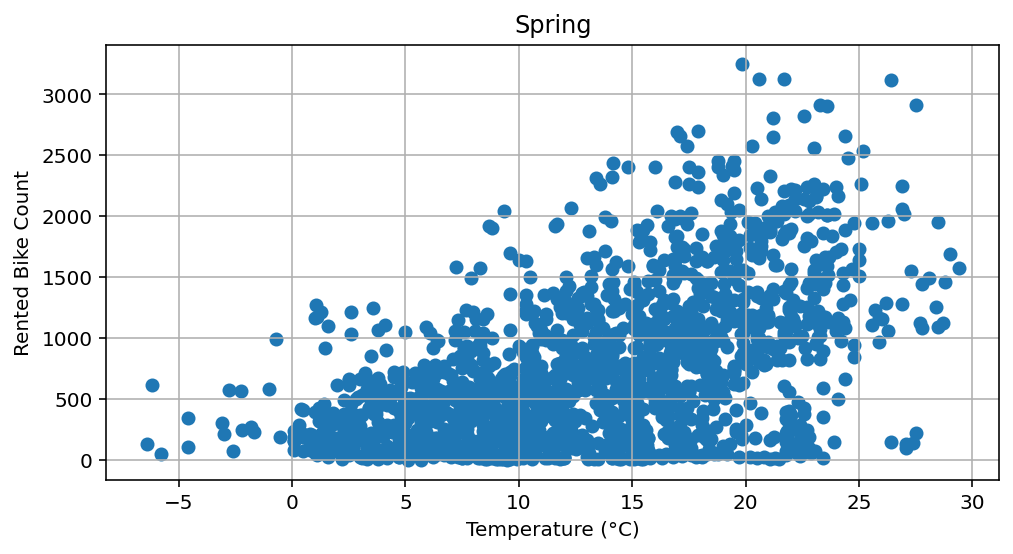

In [90]:
plt.figure(figsize=(8, 4))
plt.scatter(cycle[cycle['Seasons']=='Spring']['Temperature(°C)'], cycle[cycle['Seasons']=='Spring']['Rented Bike Count'])
plt.title('Spring')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 대략 0도 부터 25도에 밀집되어있다.

#### 여름

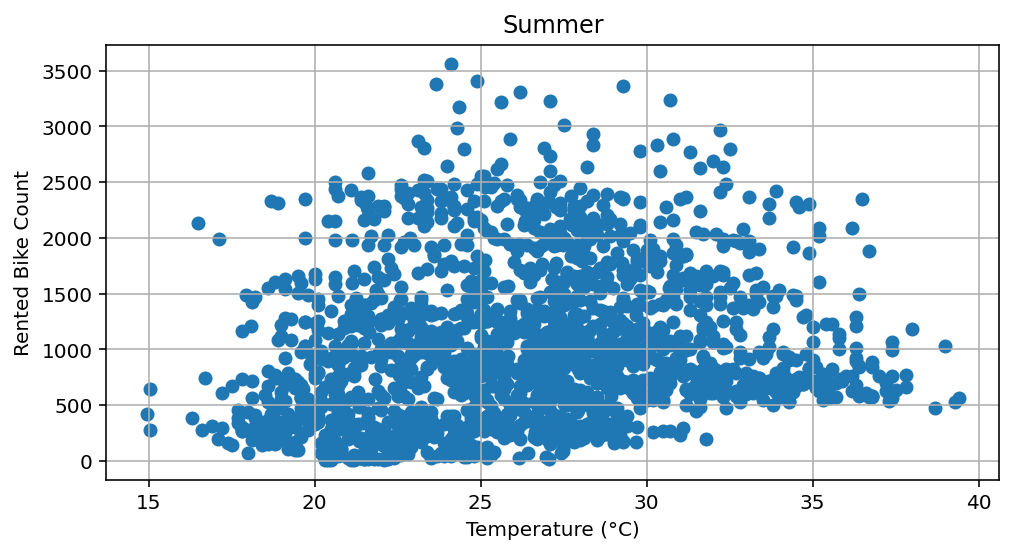

In [91]:
plt.figure(figsize=(8, 4))
plt.scatter(cycle[cycle['Seasons']=='Summer']['Temperature(°C)'], cycle[cycle['Seasons']=='Summer']['Rented Bike Count'])
plt.title('Summer')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 대략 15도 부터 35도에 밀집되어있다.

#### 가을

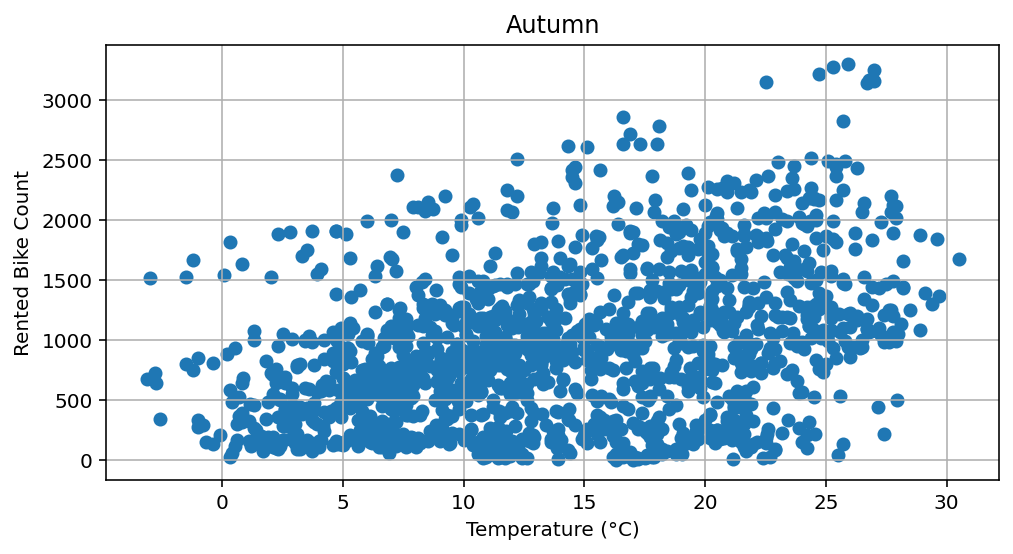

In [92]:
plt.figure(figsize=(8, 4))
plt.scatter(cycle[cycle['Seasons']=='Autumn']['Temperature(°C)'], cycle[cycle['Seasons']=='Autumn']['Rented Bike Count'])
plt.title('Autumn')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 대략 0도 부터 27도에 밀집되어있다.

#### 겨울

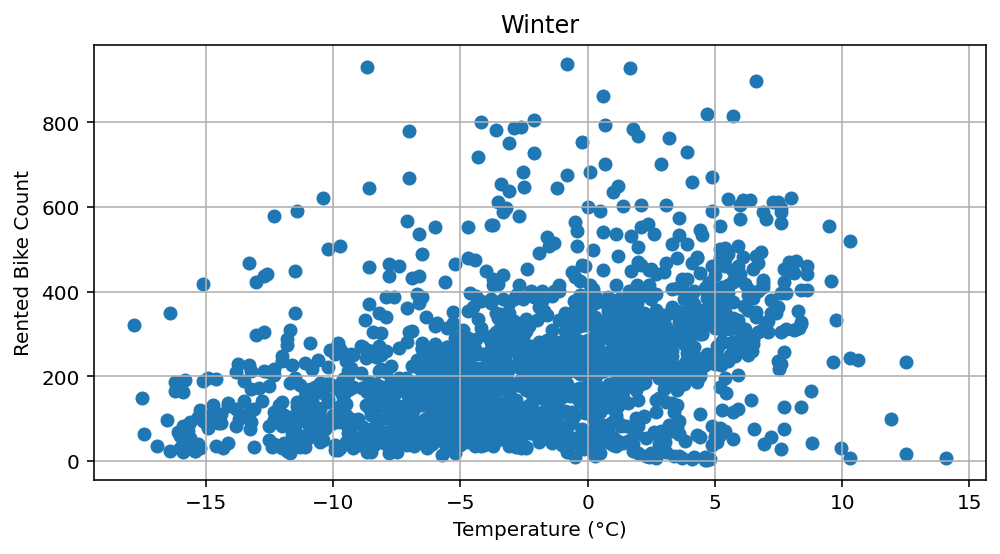

In [93]:
plt.figure(figsize=(8, 4))
plt.scatter(cycle[cycle['Seasons']=='Winter']['Temperature(°C)'], cycle[cycle['Seasons']=='Winter']['Rented Bike Count'])
plt.title('Winter')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 대략 -15도 부터 10도에 밀집되어있다.

#### 6-4. Humidity(%) & Rented Bike Count

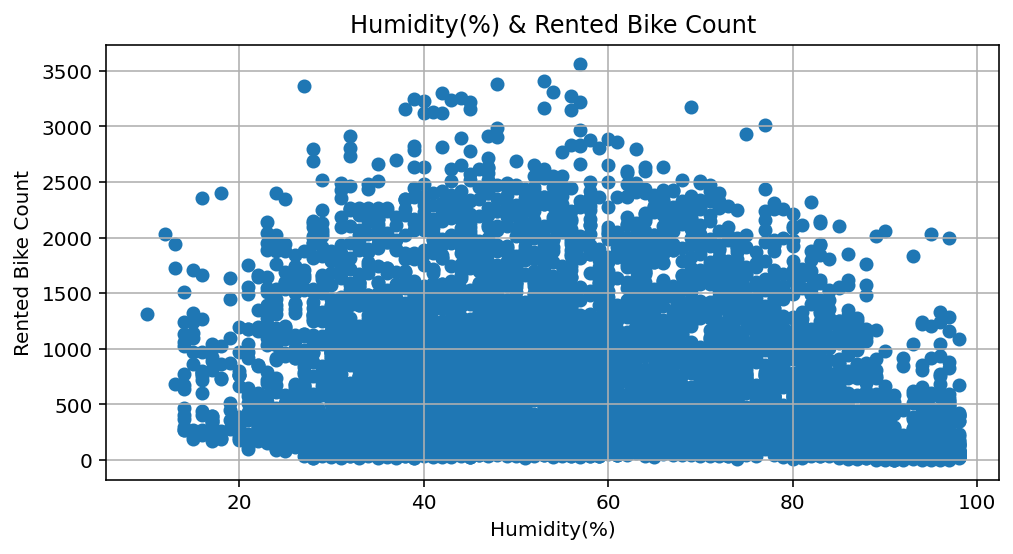

In [94]:
plt.figure(figsize=(8,4))
plt.scatter(cycle['Humidity(%)'], cycle['Rented Bike Count'])
plt.title('Humidity(%) & Rented Bike Count')
plt.xlabel('Humidity(%)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

#### + Humidity(%) & Dew point temperature(°C)

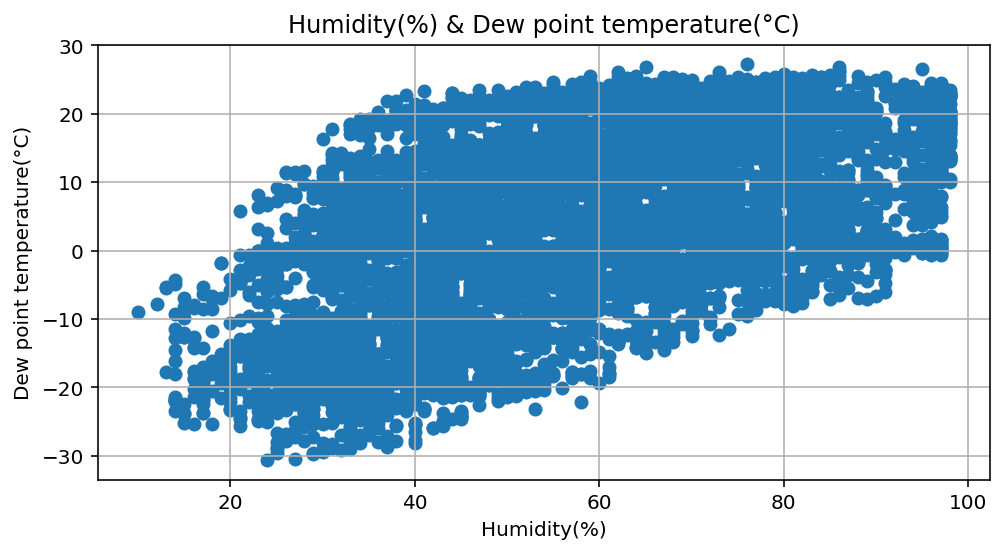

In [95]:
plt.figure(figsize=(8,4))
plt.scatter(cycle['Humidity(%)'], cycle['Dew point temperature(°C)'])
plt.title('Humidity(%) & Dew point temperature(°C)')
plt.xlabel('Humidity(%)')
plt.ylabel('Dew point temperature(°C)')
plt.grid(True)
plt.show()

-> 이슬점과 습도는 비례관계를 갖고있음을 알 수 있다.

#### 6-5. Wind speed (m/s) & Rented Bike Count

- 4m/s이상으로 풍속이 커지게 되면 대여량이 줄어드는 것을 알 수 있다. (바람을 뚫고 자전거를 타는 것은 4m/s 이상부터는 힘든 듯하다.)

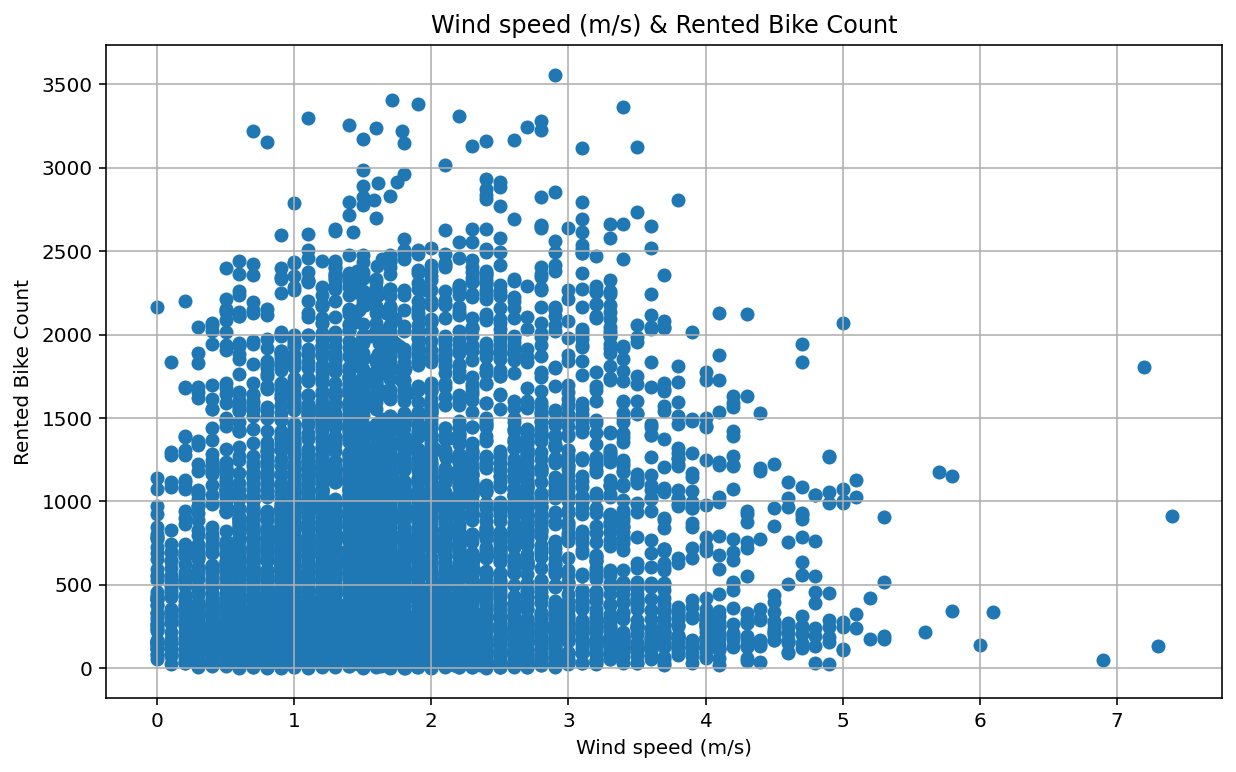

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Wind speed (m/s)'], cycle['Rented Bike Count'])
plt.title('Wind speed (m/s) & Rented Bike Count')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

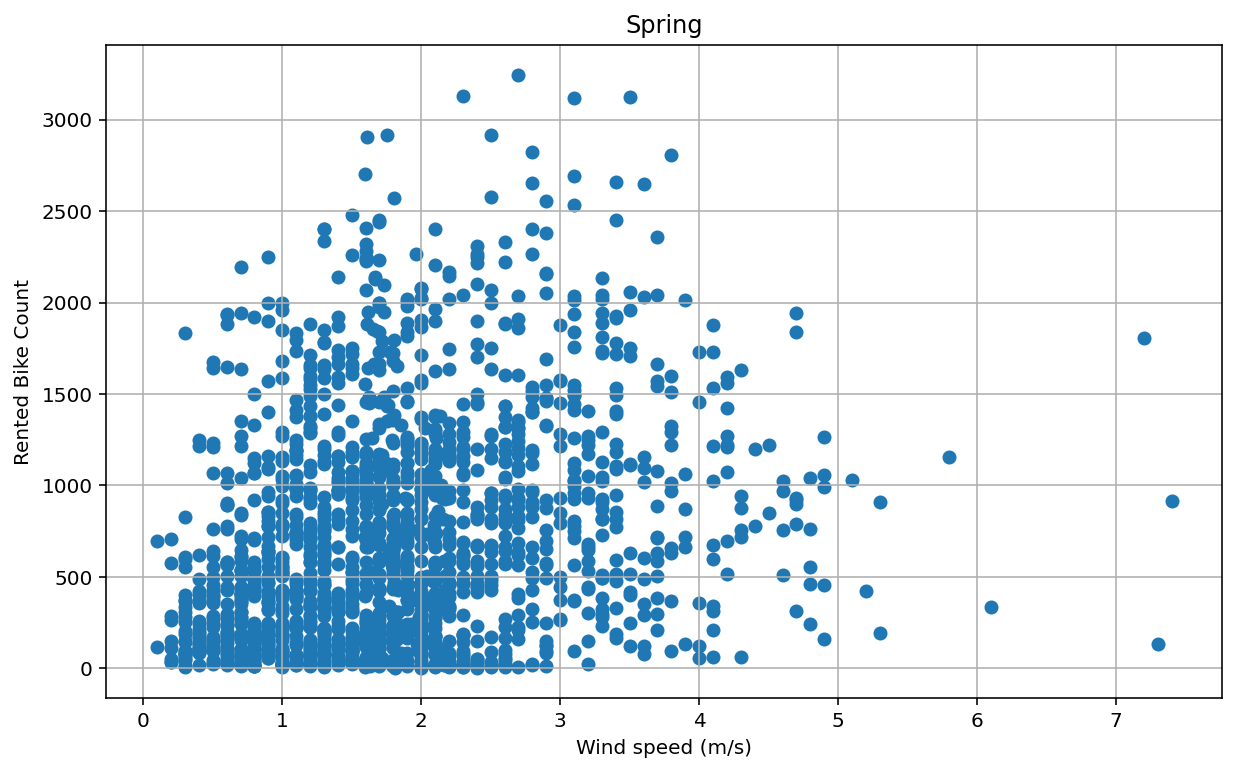

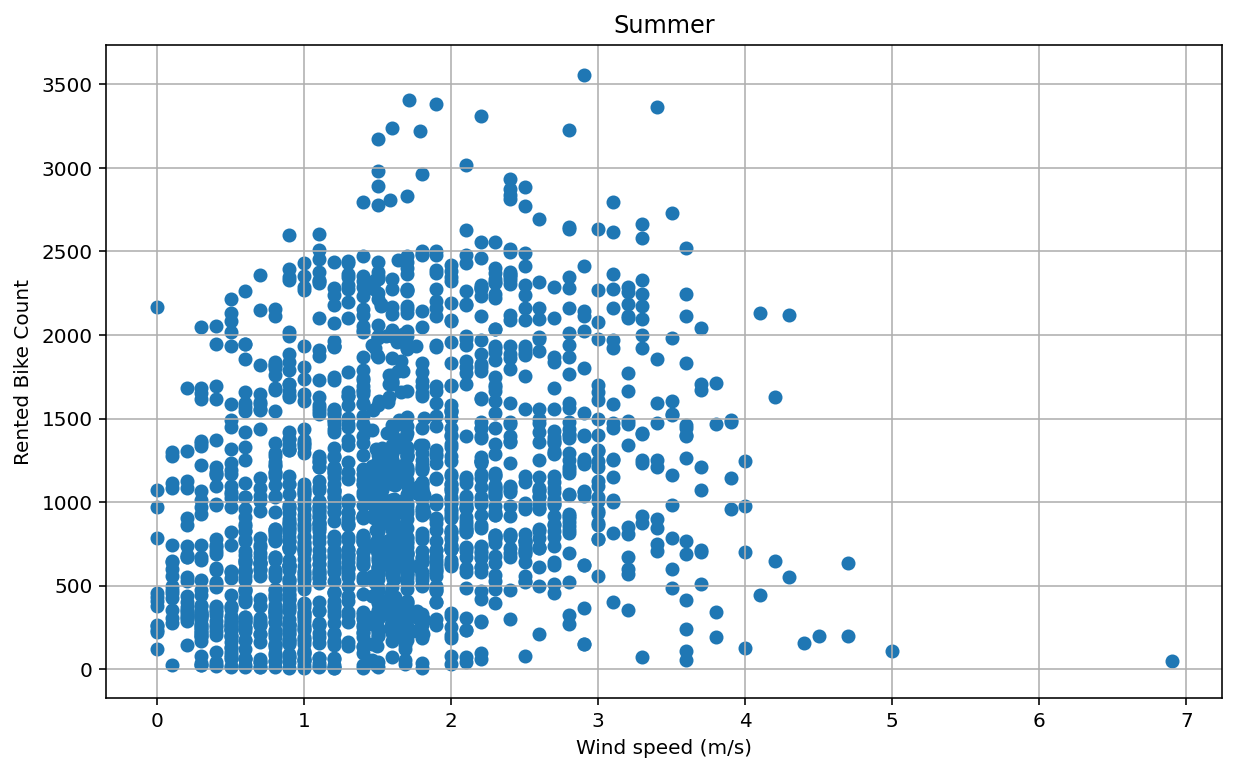

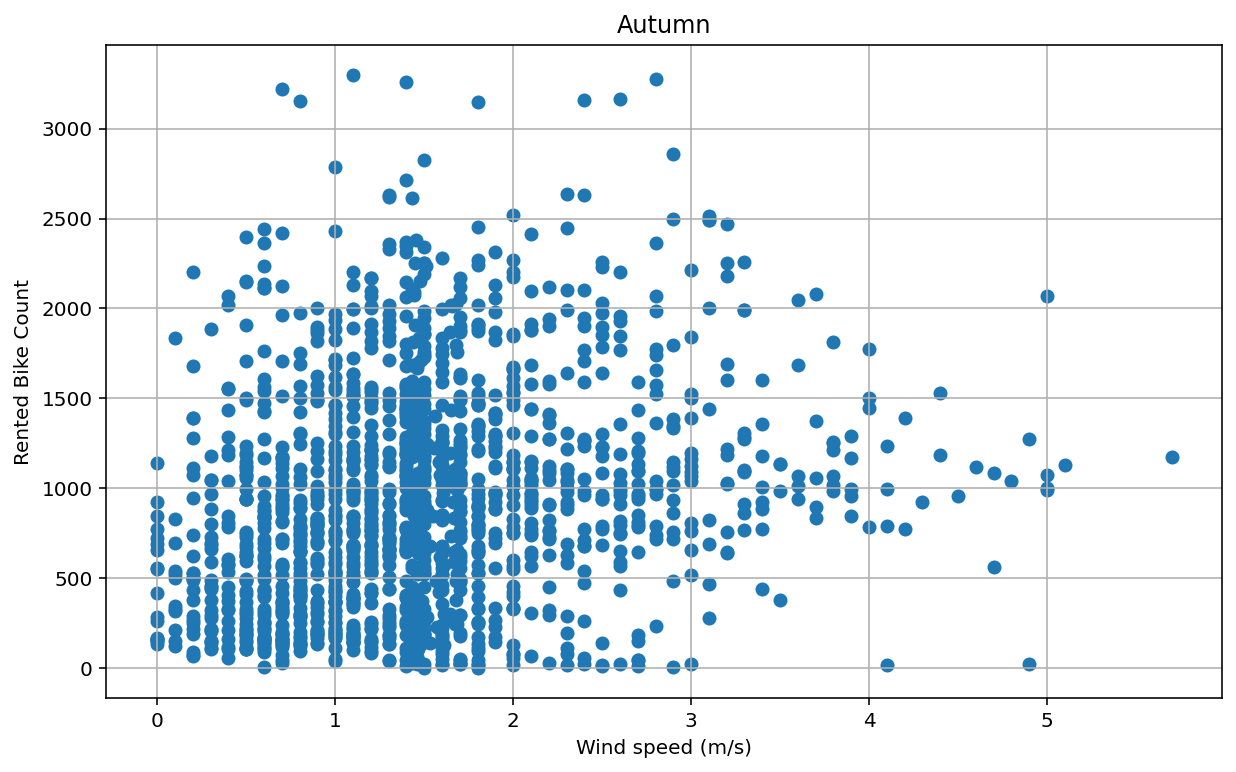

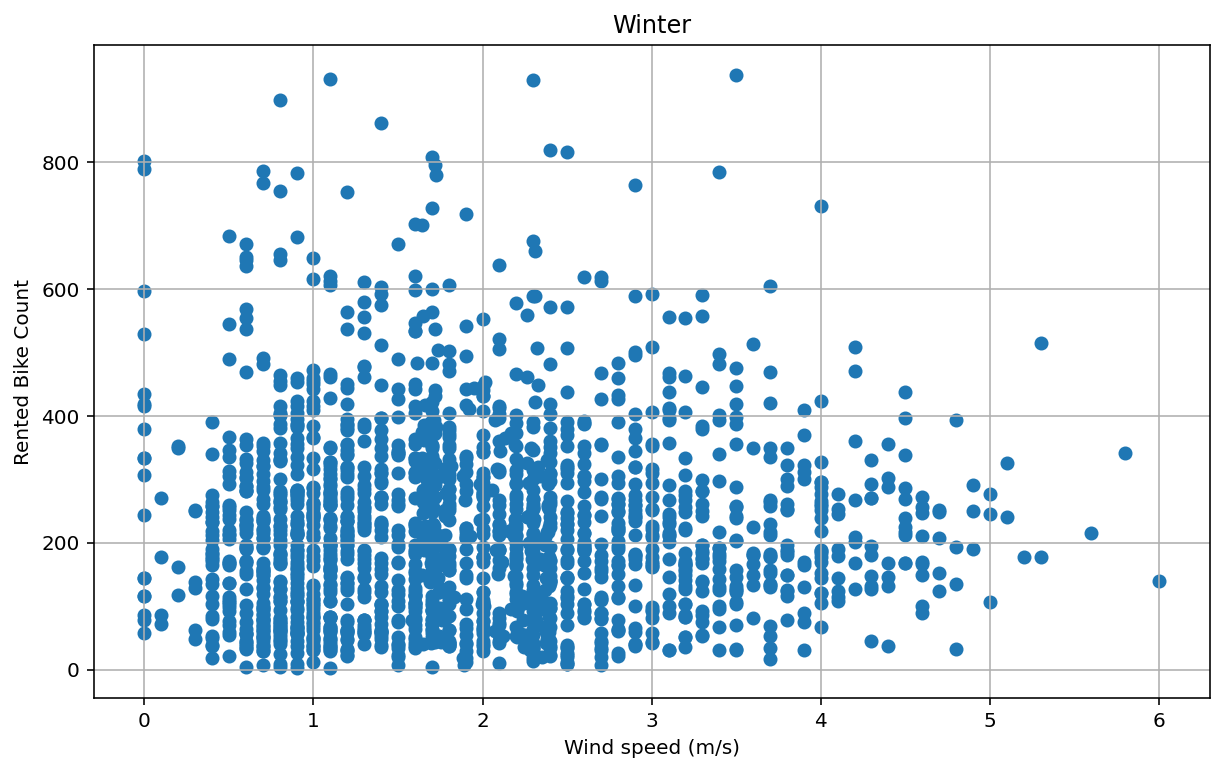

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle[cycle['Seasons']=='Spring']['Wind speed (m/s)'], cycle[cycle['Seasons']=='Spring']['Rented Bike Count'])
plt.title('Spring')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(cycle[cycle['Seasons']=='Summer']['Wind speed (m/s)'], cycle[cycle['Seasons']=='Summer']['Rented Bike Count'])
plt.title('Summer')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(cycle[cycle['Seasons']=='Autumn']['Wind speed (m/s)'], cycle[cycle['Seasons']=='Autumn']['Rented Bike Count'])
plt.title('Autumn')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(cycle[cycle['Seasons']=='Winter']['Wind speed (m/s)'], cycle[cycle['Seasons']=='Winter']['Rented Bike Count'])
plt.title('Winter')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 계절별 풍속에 따른 대여량에 특별한 특징이 보이진 않는다.

#### 6-6. Visibility (10m) & Rented Bike Count

- 시야 확보가 많이 될수록 자전거 대여량이 늘어난다. 

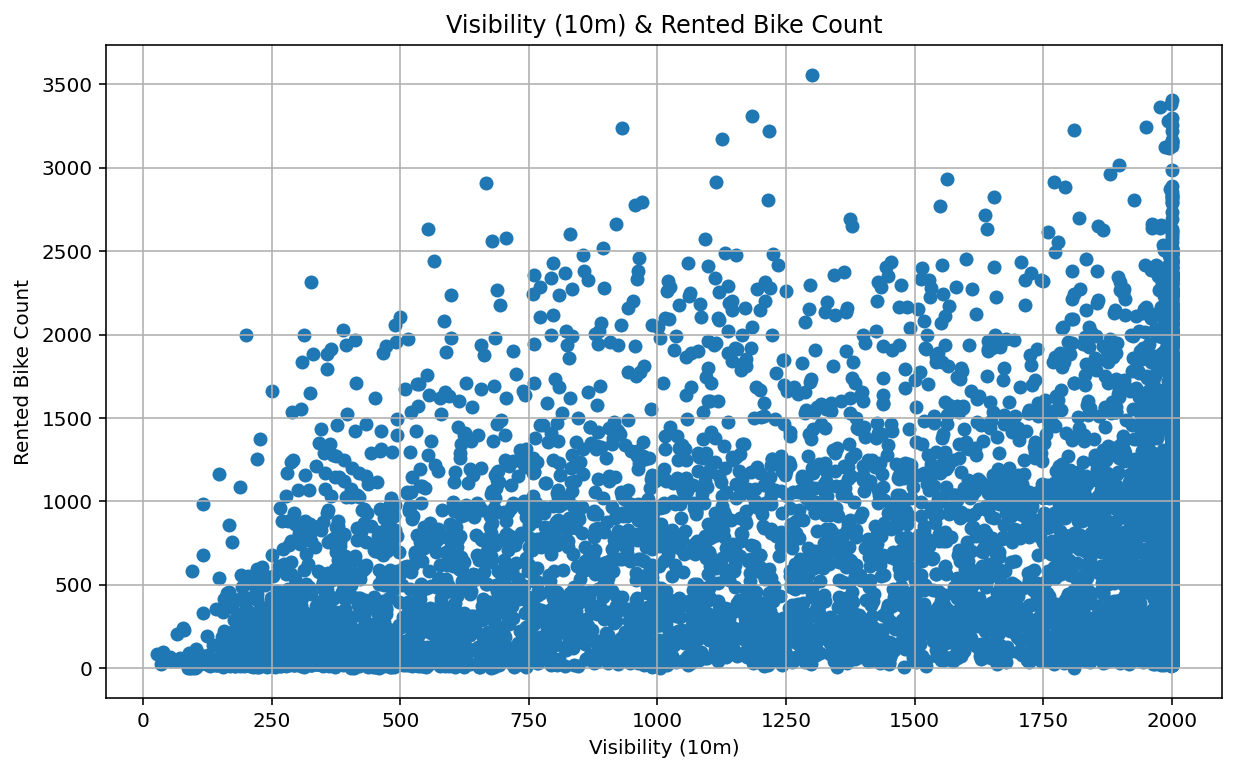

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Visibility (10m)'], cycle['Rented Bike Count'])
plt.title('Visibility (10m) & Rented Bike Count')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

#### 비와 눈이 오지 않을 때 vs 비 또는 눈이 올 때

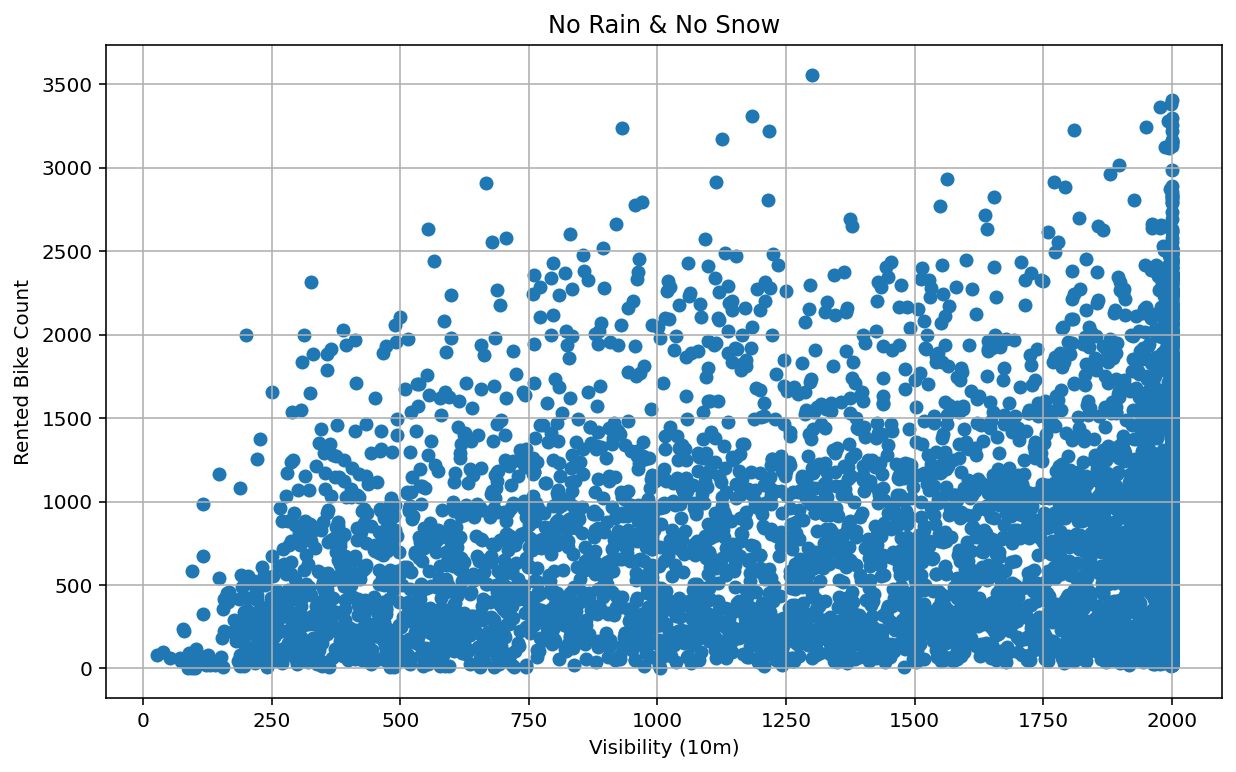

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle[(cycle['Rainfall(mm)']==0) & (cycle['Snowfall (cm)']==0)]['Visibility (10m)'], cycle[(cycle['Rainfall(mm)']==0) & (cycle['Snowfall (cm)']==0)]['Rented Bike Count'])
plt.title('No Rain & No Snow')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

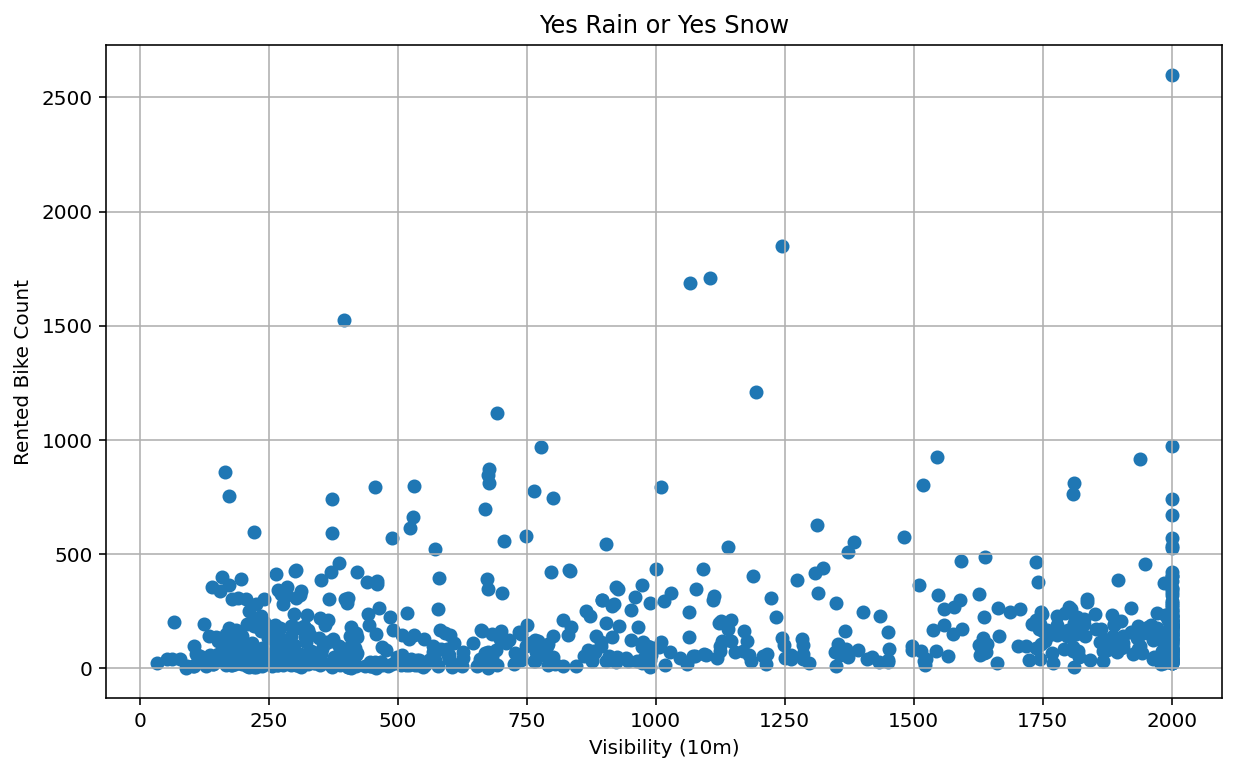

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle[(cycle['Rainfall(mm)']!=0) | (cycle['Snowfall (cm)']!=0)]['Visibility (10m)'], cycle[(cycle['Rainfall(mm)']!=0) | (cycle['Snowfall (cm)']!=0)]['Rented Bike Count'])
plt.title('Yes Rain or Yes Snow')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 비와 눈 모두 안 올 때가 최대 대여량도 높고 전체적인 대여량도 높다. 비나 눈이 올 경우 시야확보가 안되기 때문에 대여량이 줄 것이라는 기대가 있었지만 그렇지는 않은 듯 하다.

#### 6-7. Dew point temperature(°C) & Rented Bike Count

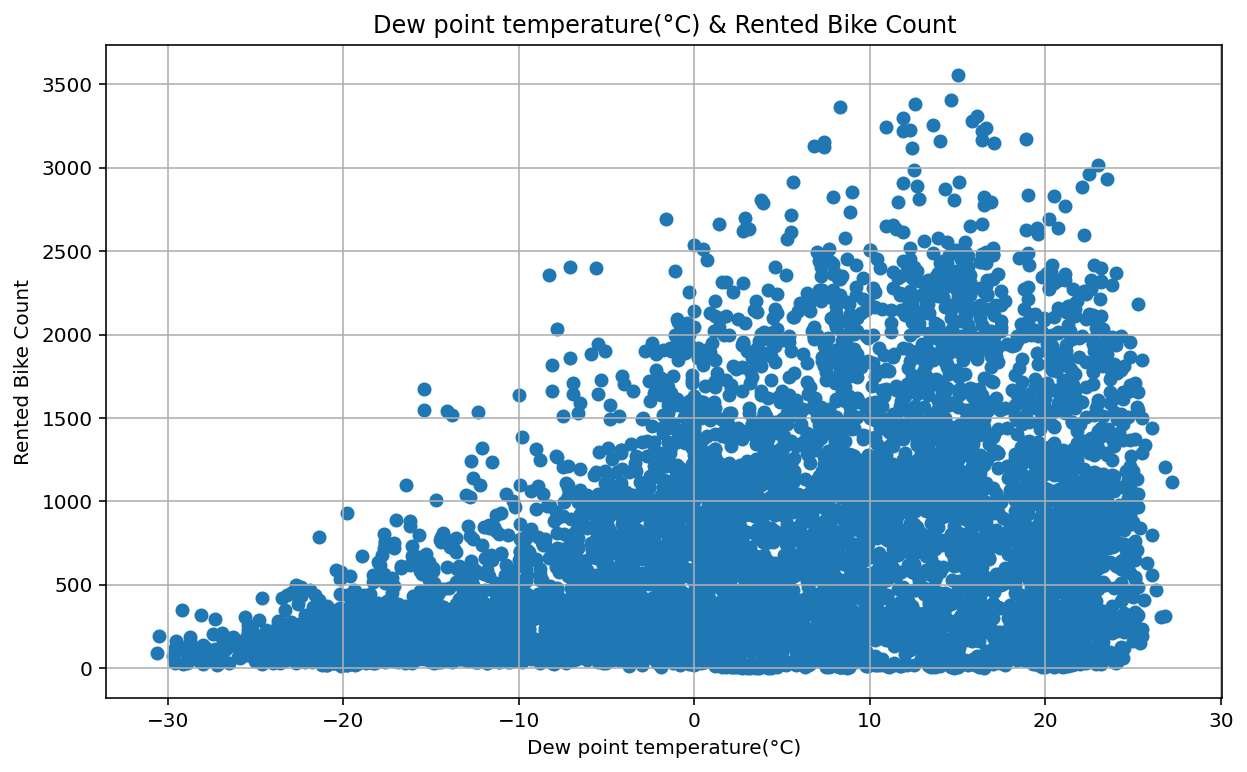

In [101]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Dew point temperature(°C)'], cycle['Rented Bike Count'])
plt.title('Dew point temperature(°C) & Rented Bike Count')
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

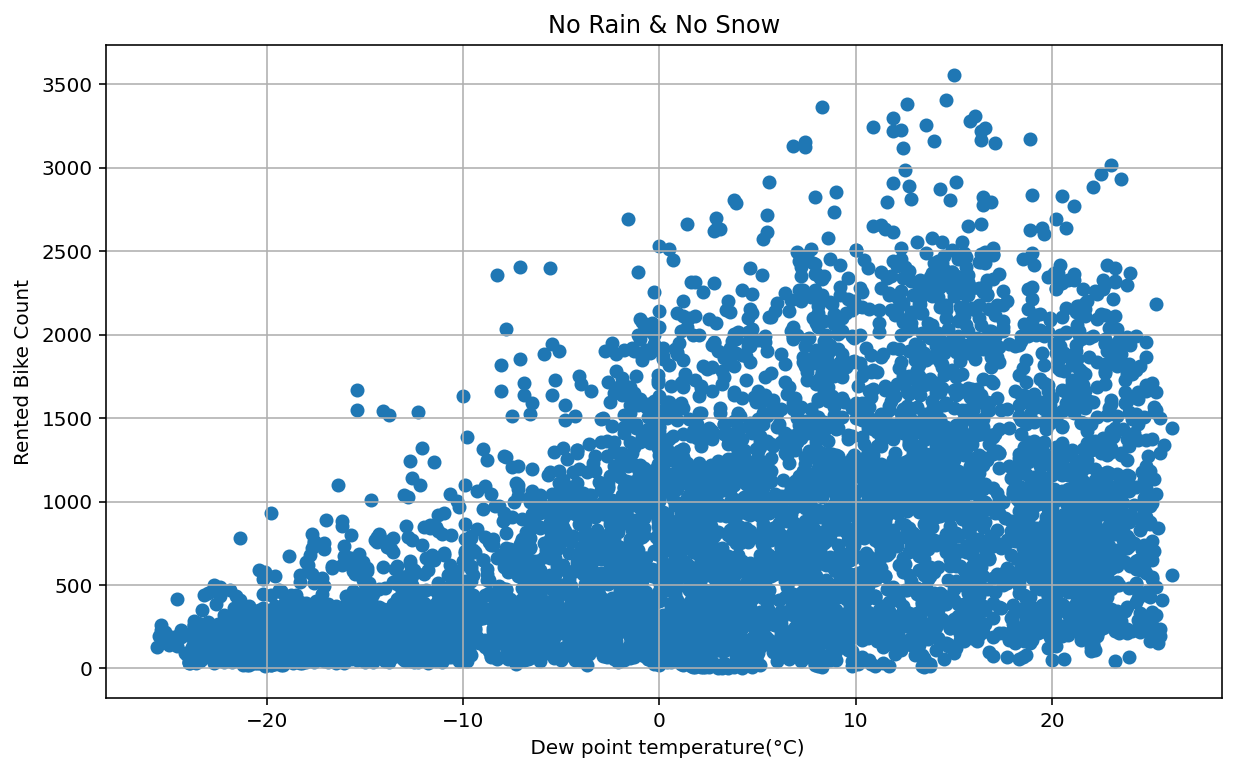

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle[(cycle['Rainfall(mm)']==0) & (cycle['Snowfall (cm)']==0)]['Dew point temperature(°C)'], cycle[(cycle['Rainfall(mm)']==0) & (cycle['Snowfall (cm)']==0)]['Rented Bike Count'])
plt.title('No Rain & No Snow')
plt.xlabel(' Dew point temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

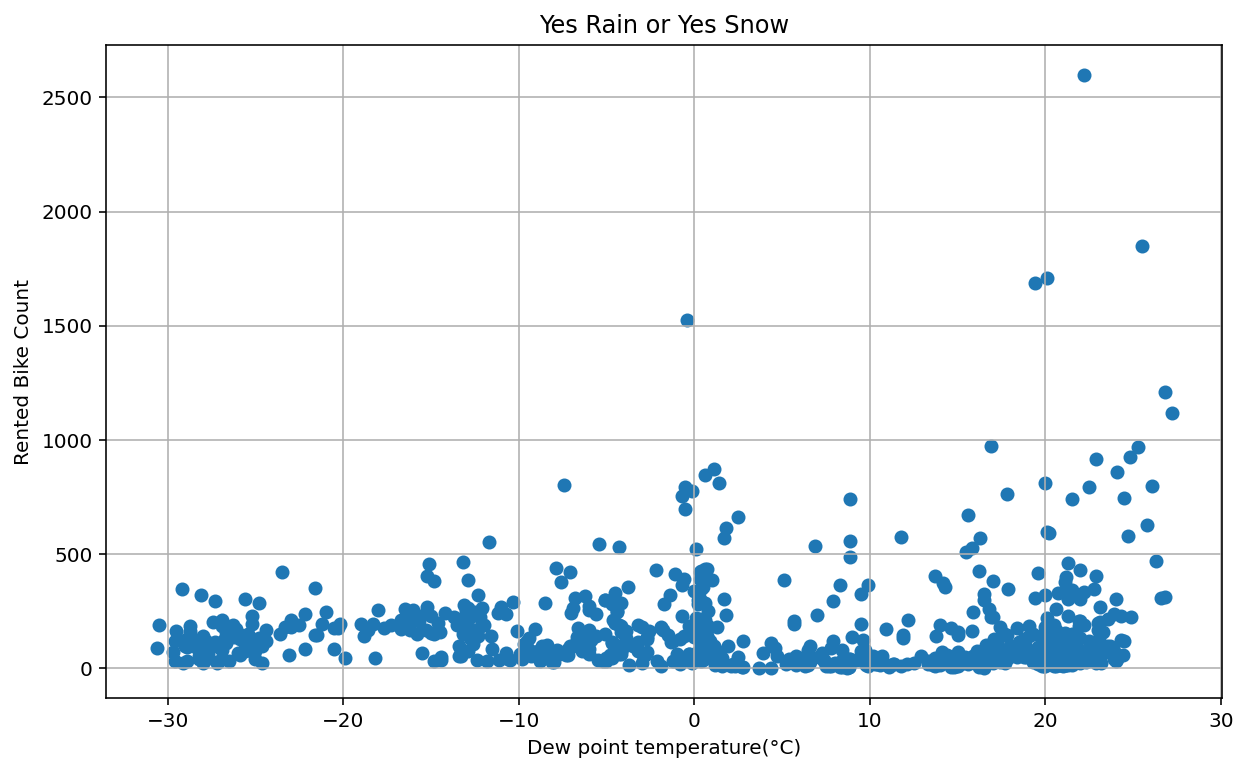

In [103]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle[(cycle['Rainfall(mm)']!=0) | (cycle['Snowfall (cm)']!=0)]['Dew point temperature(°C)'], cycle[(cycle['Rainfall(mm)']!=0) | (cycle['Snowfall (cm)']!=0)]['Rented Bike Count'])
plt.title('Yes Rain or Yes Snow')
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

#### + Dew point temperature(°C) & Rainfall(mm)

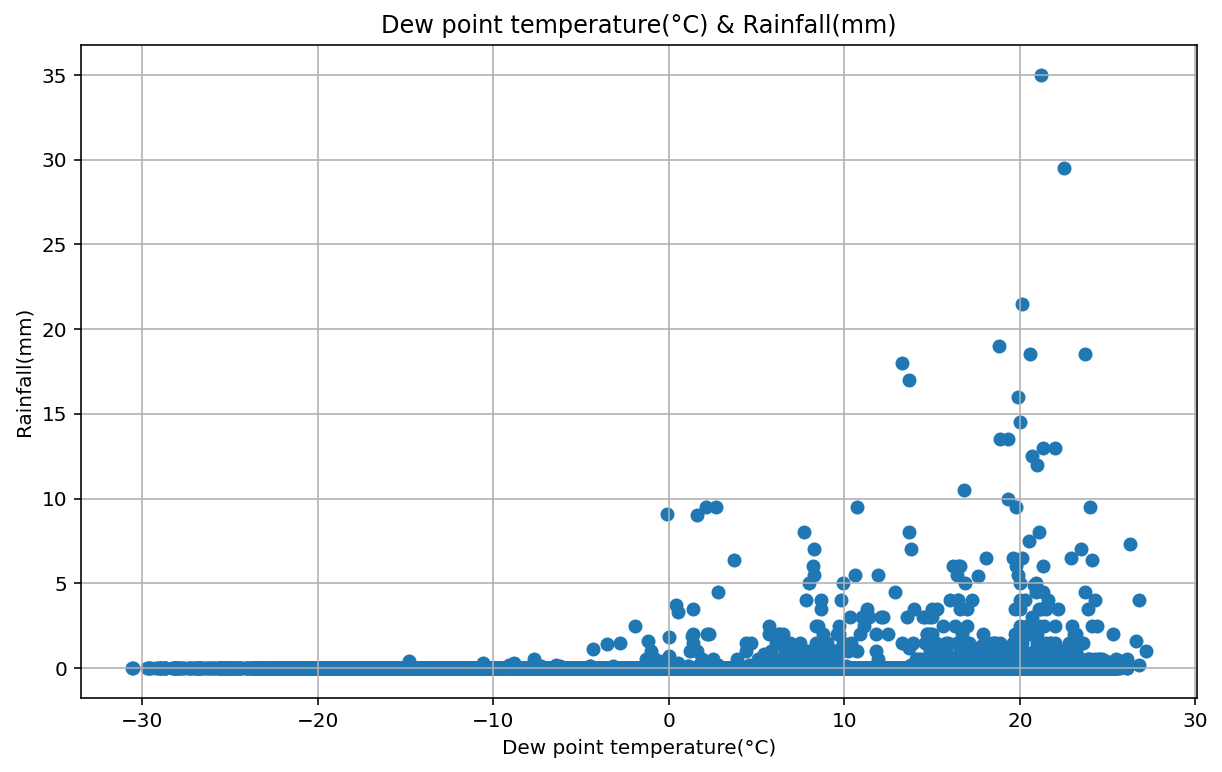

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Dew point temperature(°C)'],cycle['Rainfall(mm)'])
plt.title('Dew point temperature(°C) & Rainfall(mm)')
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Rainfall(mm)')
plt.grid(True)
plt.show()

-> 이슬점이 약 0도인 시점부터 높아짐에 따라 강우량이 많아진다.

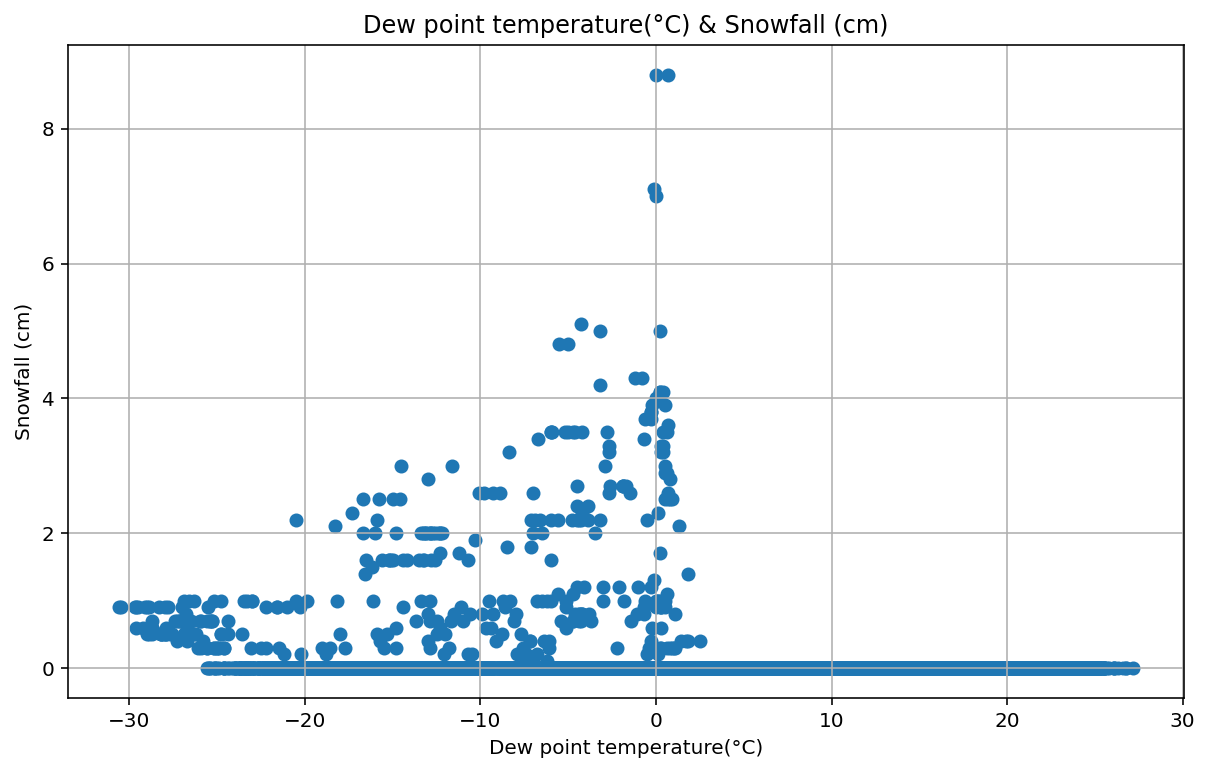

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Dew point temperature(°C)'],cycle['Snowfall (cm)'])
plt.title('Dew point temperature(°C) & Snowfall (cm)')
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Snowfall (cm)')
plt.grid(True)
plt.show()

-> 이슬점이 약 0도보다 작을 때, 이슬점이 높아짐에 따라 적설량이 많아진다.

#### 6-8. Solar Radiation (MJ/m2) & Rented Bike Count

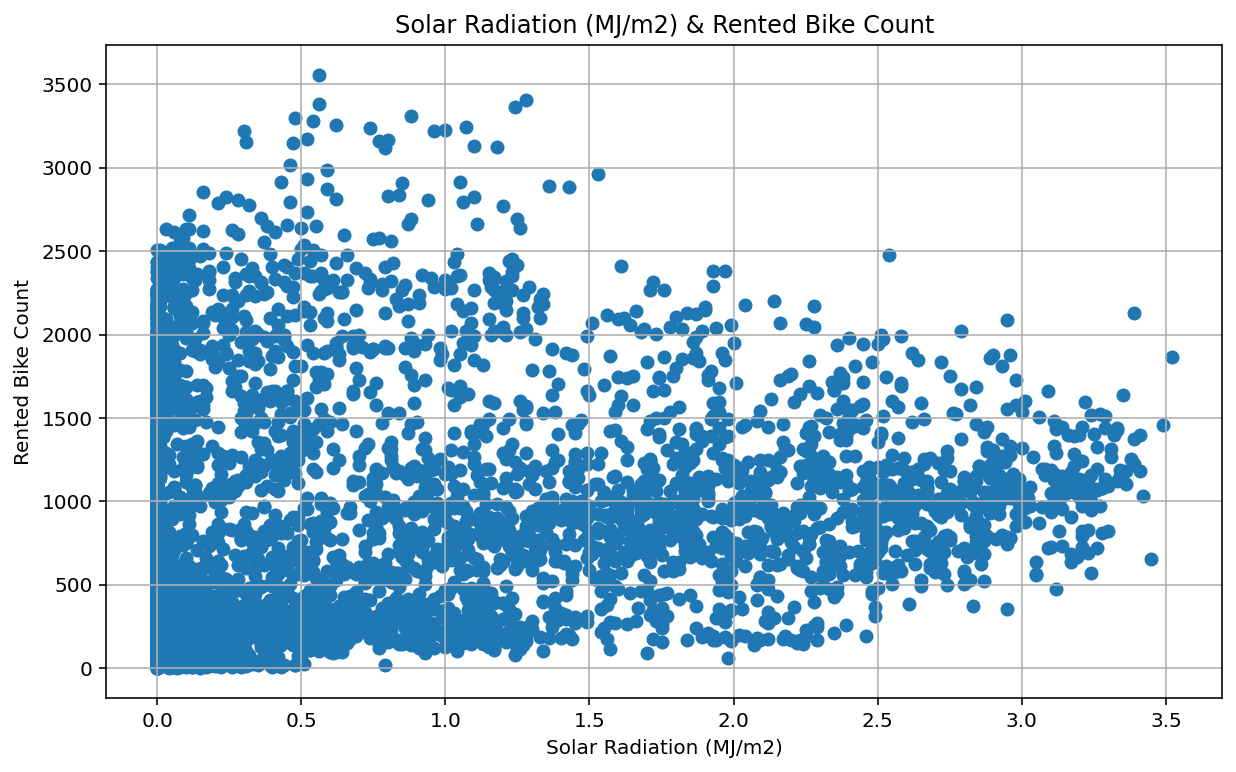

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Solar Radiation (MJ/m2)'],cycle['Rented Bike Count'])
plt.title('Solar Radiation (MJ/m2) & Rented Bike Count')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 태양복사열이 많아질수록 대여량이 줄어든다.

#### 6-9. Rainfall(mm) & Rented Bike Count

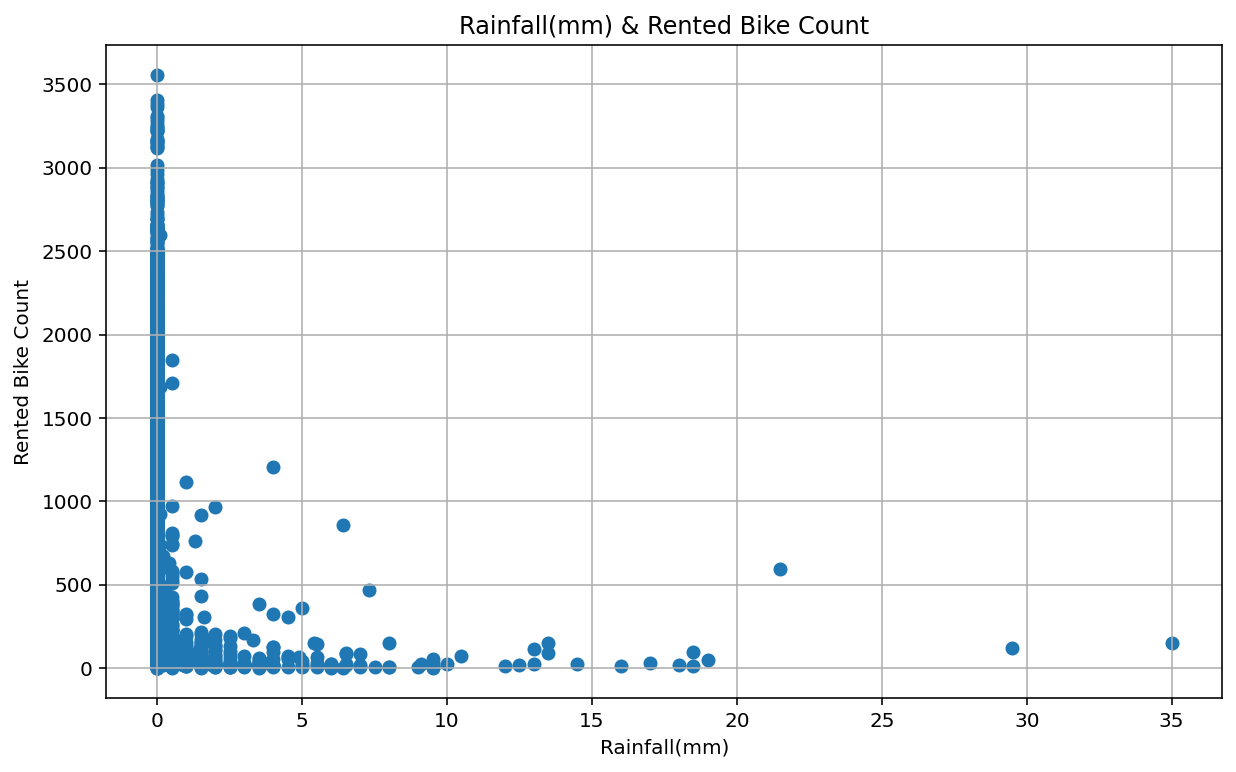

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Rainfall(mm)'],cycle['Rented Bike Count'])
plt.title('Rainfall(mm) & Rented Bike Count')
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 강우량이 적을수록 대여량이 높다. (비가 안오는 날 자전거를 탈 확률이 당연히 높기 때문이다.)

#### 6-10. Snowfall (cm) & Rented Bike Count

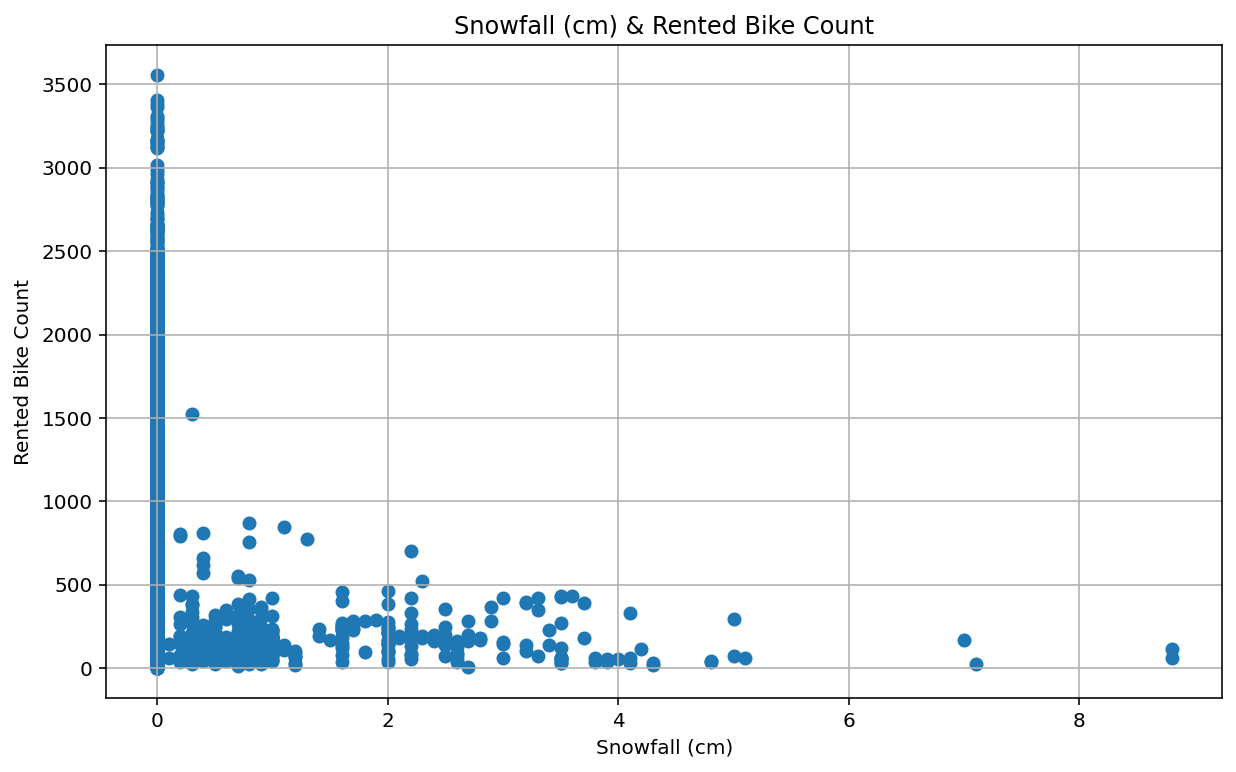

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Snowfall (cm)'],cycle['Rented Bike Count'])
plt.title('Snowfall (cm) & Rented Bike Count')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 적설량이 적을수록 대여량이 높다. (눈이 안오는 날 자전거를 탈 확률이 당연히 높기 때문이다.)

#### 6-11. Seasons & Rented Bike Count

- 겨울을 제외하고는 모두 대여량이 많고 그 중 여름에 대여량이 가장 많다.

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

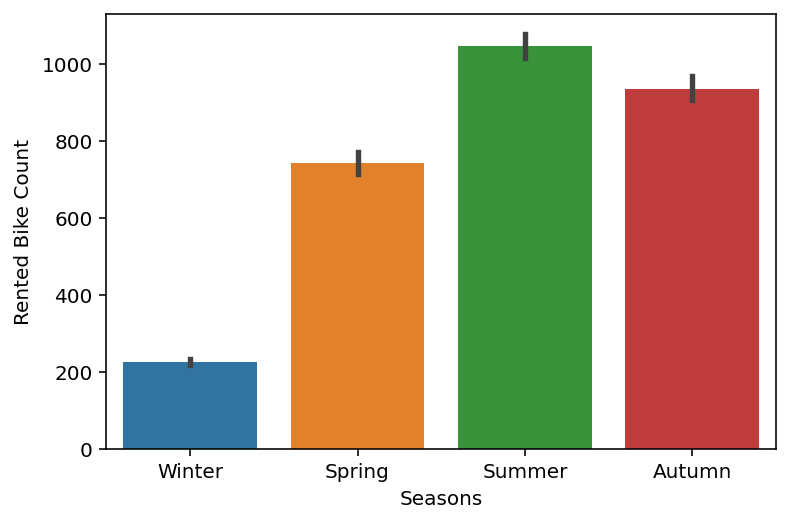

In [109]:
sns.barplot(x='Seasons',y='Rented Bike Count',data=cycle)

#### + Seasons & Rainfall(mm)

<AxesSubplot:xlabel='Seasons', ylabel='Rainfall(mm)'>

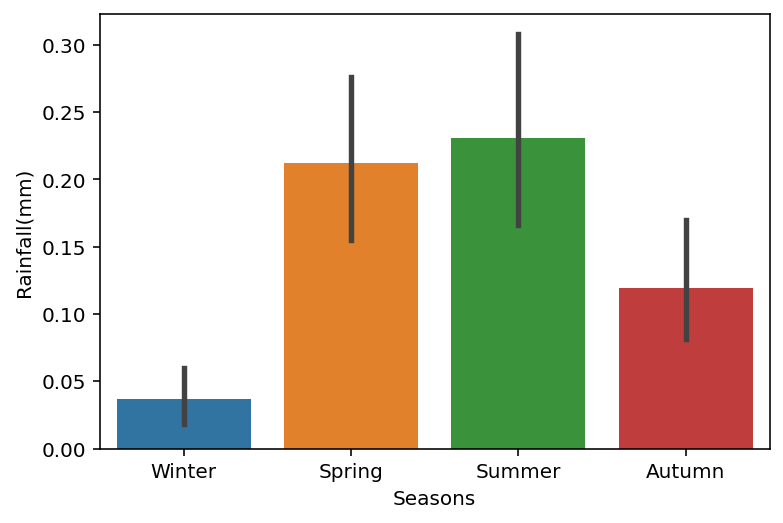

In [110]:
sns.barplot(x='Seasons',y='Rainfall(mm)',data=cycle)

-> 봄과 여름에 비가 많이 온다.

#### + Seasons & Snowfall (cm)

<AxesSubplot:xlabel='Seasons', ylabel='Snowfall (cm)'>

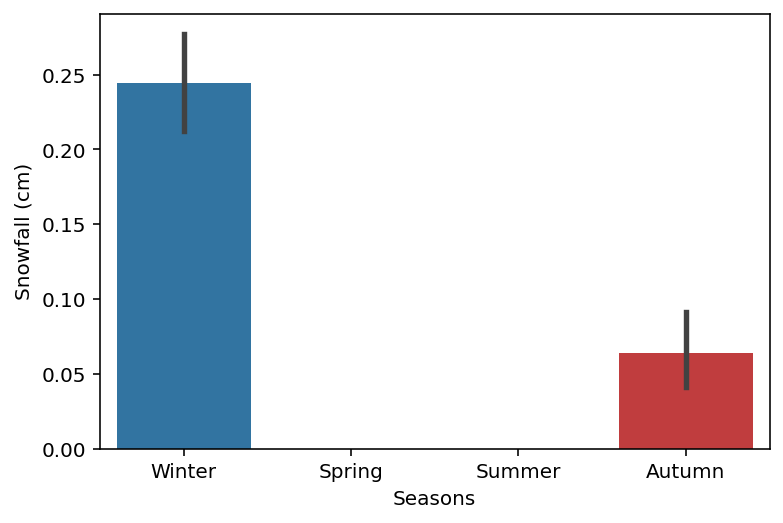

In [111]:
sns.barplot(x='Seasons',y='Snowfall (cm)',data=cycle)

-> 눈은 가을과 겨울에만 오고 그 중 겨울에 상대적으로 더 많이 온다

#### 6-12. Holiday & Rented Bike Count

- 휴일이 아닌 경우의 대여량이 더 많지만 휴일에 비해 휴일이 아닌 날의 수가 훨씬 많기 때문에 비율로 보았을 때, 휴일이 아닌 날에 자전거를 대여하는 비율이 약 96%, 휴일에 대여하는 비율이 약 3%로, 휴일이 아닌 날 자전거를 대여하는 비율이 훨씬 크다는 것을 알 수 있다.

<AxesSubplot:xlabel='Holiday', ylabel='count'>

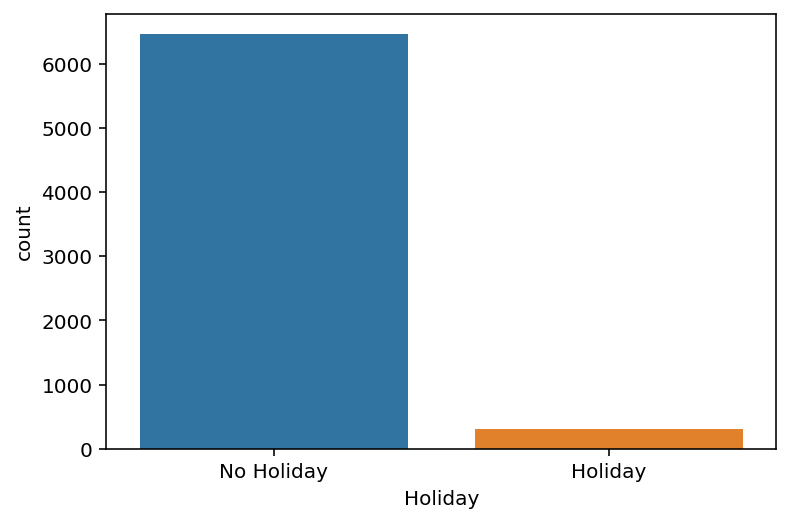

In [112]:
sns.countplot(x=cycle['Holiday']) #

<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

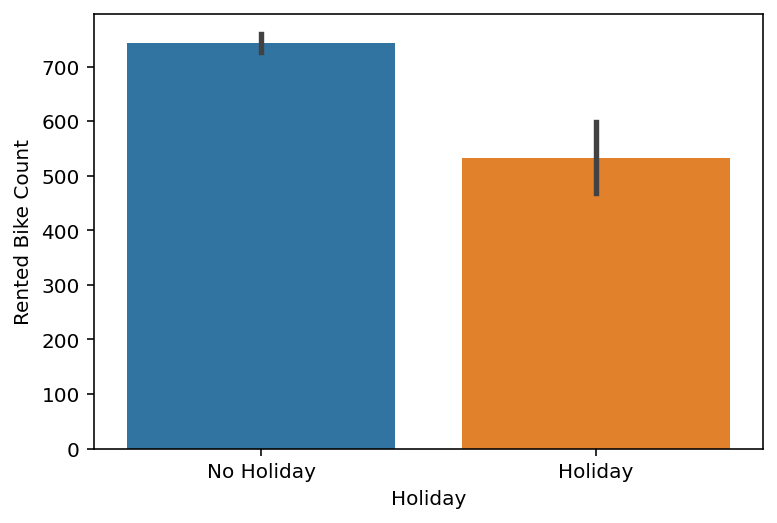

In [113]:
sns.barplot(x='Holiday',y='Rented Bike Count',data=cycle)

Holiday
Holiday        3.328714
No Holiday    96.671286
Name: Rented Bike Count, dtype: float64


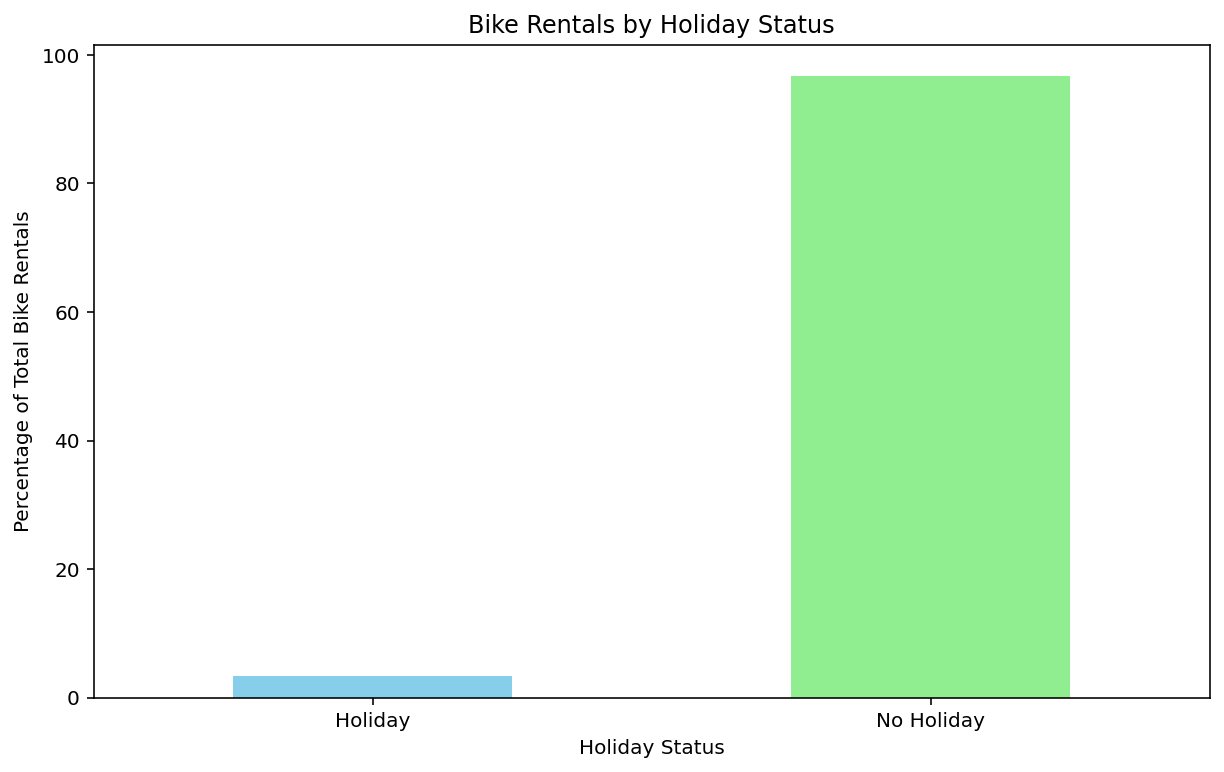

In [114]:
holiday_counts = cycle.groupby('Holiday')['Rented Bike Count'].sum()

# 비율 계산
total_rentals = holiday_counts.sum()
holiday_ratios = holiday_counts / total_rentals * 100

# 비율 출력
print(holiday_ratios)

# 비율 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
holiday_ratios.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Bike Rentals by Holiday Status')
plt.xlabel('Holiday Status')
plt.ylabel('Percentage of Total Bike Rentals')
plt.xticks(rotation=0)
plt.show()

휴일의 시간대 별 자전거 대여량

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

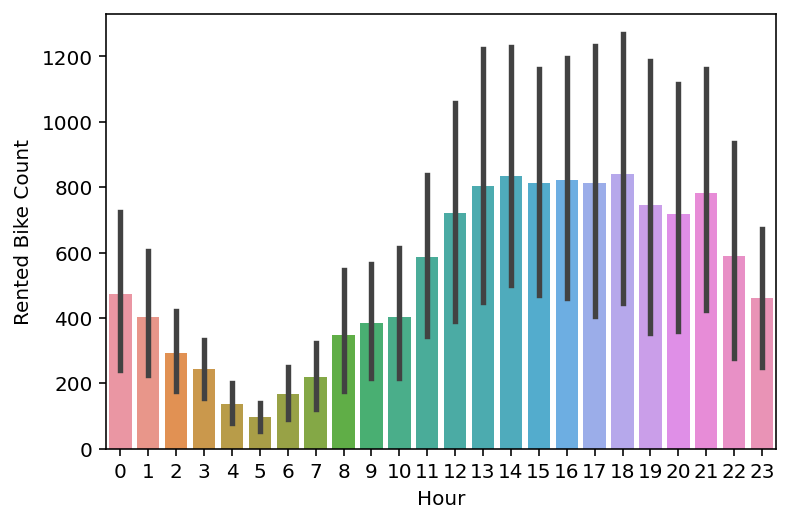

In [115]:
sns.barplot(x='Hour',y='Rented Bike Count',data=cycle[cycle['Holiday']=='Holiday'])

-> 휴일이라고 낮시간대에 특별히 많은 대여량이 보이진 않는다.

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

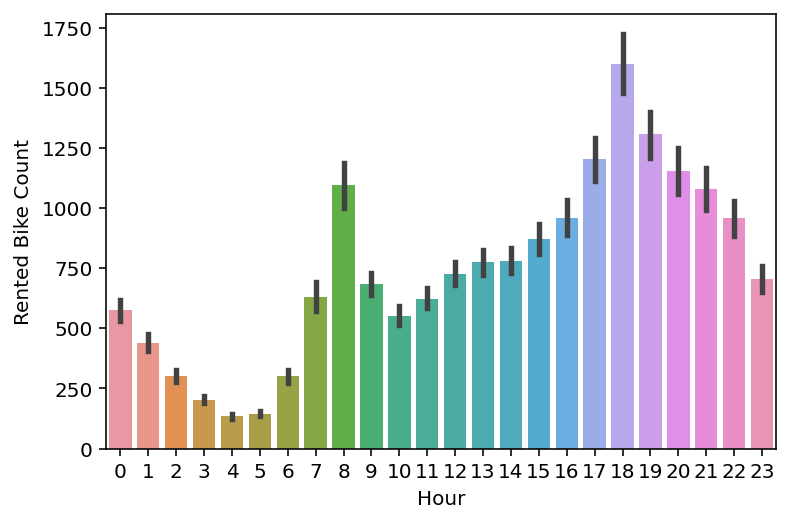

In [116]:
sns.barplot(x='Hour',y='Rented Bike Count',data=cycle[cycle['Holiday']=='No Holiday'])

평일이기 때문에 출퇴근 시간의 대여량이 돋보인다.

#### 6-13. Functioning Day & Rented Bike Count

위에서 보였듯이 Functioning Day가 Yes인 경우에만 대여량이 존재했다.

#### 6-14. Month & Rented Bike Count

- 6월달의 대여량이 가장 많다.

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

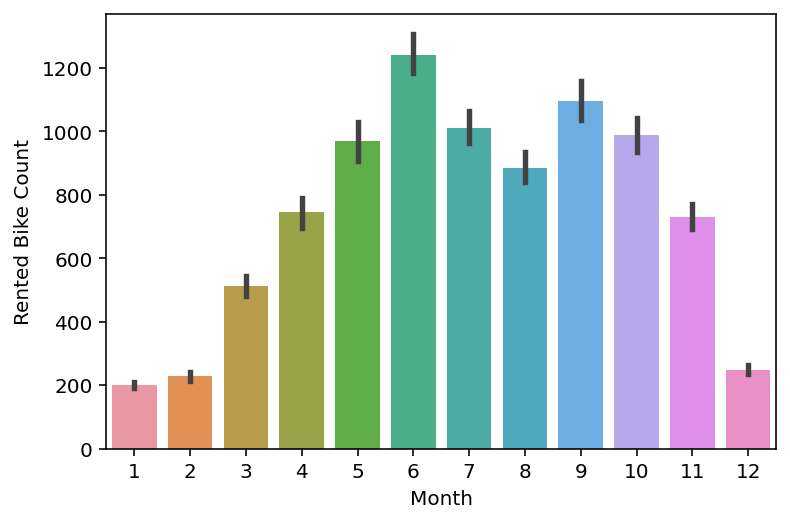

In [117]:
sns.barplot(x='Month',y='Rented Bike Count',data=cycle)

- 학생들 여름방학인 7, 8월에 대여량이 많을 것이라는 가설이 맞기도 하지만 7, 8월의 데이터가 눈에 띌 정도는 아닌 것 같다.
- 3월말에서 중순에 자전거 대여량이 특별히 많지는 않다.

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

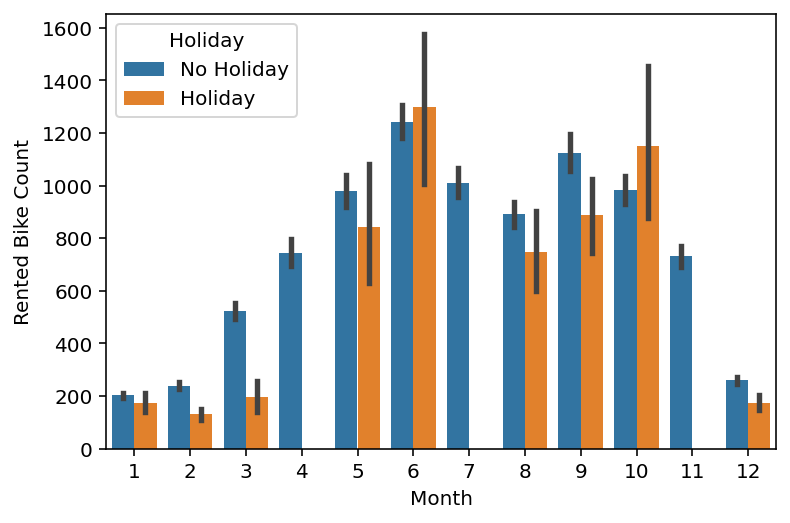

In [118]:
sns.barplot(x='Month',y='Rented Bike Count',data=cycle,hue='Holiday')

#### 6-15. Day Of Week & Rented Bike Count

<AxesSubplot:xlabel='Day Of Week', ylabel='Rented Bike Count'>

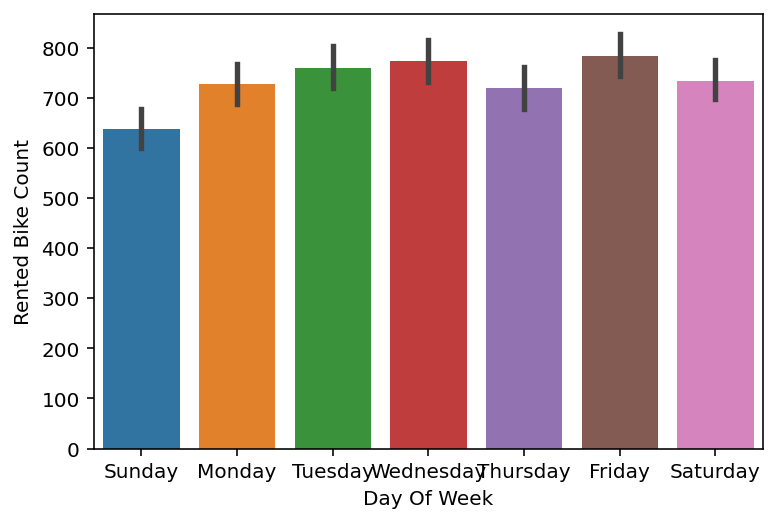

In [119]:
sns.barplot(x='Day Of Week',y='Rented Bike Count',data=cycle,order=day_order)

-> 요일별로 골고루 자전거 대여 데이터 양이 나눠져있다. 특정 요일이라고 많이 타진 않는 듯 하다.

# 7. 가설 검정

- 기온이 높으면 자전거 대여 수가 적을 것이다.
> 약 30도까지는 기온이 높을수록 대여량이 높아졌고 그 이후로는 대여량이 줄어들었다.
- 습도가 높으면 자전거 대여 수가 적을 것이다.
> 습도가 60%인 지점을 기준으로 높아지거나 낮아질수록 대여량이 감소한다.
- 바람 세기가 세면 자전거 대여 수가 적을 것이다.
> 4m/s이상으로 풍속이 커지게 되면 대여량이 줄어드는 것을 알 수 있다.
- 태양 복사열이 세면 자전거 대여 수가 적을 것이다.
> 태양복사열이 많아질수록 대여량이 줄어들었다.
- 강우량이 많으면 자전거 대여 수가 적을 것이다.
> 강우량이 적을수록 대여량이 높다. (비가 안오는 날 자전거를 탈 확률이 당연히 높기 때문이다.)
- 적설량이 많으면 자전거 대여 수가 적을 것이다.
> 적설량이 적을수록 대여량이 높다. (눈이 안오는 날 자전거를 탈 확률이 당연히 높기 때문이다.)
- 겨울이 가장 자전거 대여 수가 적을 것이다.
> 겨울에는 춥기 때문에 당연히 자전거를 많이 타지 않는다.
- 휴일이 평일에 비해 자전거 대여 수가 많을 것이다.
> 휴일에 자전거를 타는 사람의 비율이 평일에 자전거를 타는 사람의 비율에 비해 훨씬 큰 것으로 나타났다.
- 기능 가능일에만 자전거를 대여할 수 있을 것이다.
> Yes인 경우에만 대여량이 측정되어있다.
- 학생들 여름방학 기간인 7, 8월에는 자전거 사용량이 많을 것이다. (대학생뿐만 아니라 초중고 학생들도 방학이므로)
> 눈에 띄게 7,8월이 많아보이진 않지만 높은 편에 속한다.
- 벚꽃놀이 시즌인 3월 말에서 4월 중순에 자전거 대여량이 많을 것이다.
> 3월말에서 중순에 자전거 대여량이 특별히 많지는 않다.

- 휴일에는 나들이 나온 사람들의 사용량이 많을 것이다. 따라서 낮 시간대 사용량이 많을 것이다.
> 휴일이라고 낮시간대에 특별히 많은 대여량이 보이진 않는다.
- 평일에는 직장인들의 출퇴근길 시간에 사용량이 많을 것이다.
> 정확하다.

In [120]:
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day Of Week
0,2017-12-01,254,0,-5.2,37.0,2.200000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,2017,12,Friday
1,2017-12-01,204,1,-5.5,38.0,0.800000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,2017,12,Friday
2,2017-12-01,173,2,-6.0,39.0,1.000000,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,2017,12,Friday
3,2017-12-01,107,3,-6.2,40.0,0.900000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,2017,12,Friday
4,2017-12-01,78,4,-6.0,36.0,1.580633,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,2017,12,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,2018-11-30,1047,17,6.0,29.0,2.100000,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,2018,11,Friday
6768,2018-11-30,1384,18,4.7,34.0,1.900000,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,2018,11,Friday
6769,2018-11-30,1003,19,4.2,34.0,2.600000,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,2018,11,Friday
6770,2018-11-30,694,21,2.6,39.0,0.300000,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,2018,11,Friday


# 3주차 과제 시작!

## 2차 전처리

In [121]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [122]:
cycle.info() #object형(범주형)데이터는 전처리 할 것이다. (category형인 Day Df Week 또한 전처리 해야한다.)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6772 entries, 0 to 6771
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       6772 non-null   datetime64[ns]
 1   Rented Bike Count          6772 non-null   int64         
 2   Hour                       6772 non-null   int64         
 3   Temperature(°C)            6772 non-null   float64       
 4   Humidity(%)                6772 non-null   float64       
 5   Wind speed (m/s)           6772 non-null   float64       
 6   Visibility (10m)           6772 non-null   int64         
 7   Dew point temperature(°C)  6772 non-null   float64       
 8   Solar Radiation (MJ/m2)    6772 non-null   float64       
 9   Rainfall(mm)               6772 non-null   float64       
 10  Snowfall (cm)              6772 non-null   float64       
 11  Seasons                    6772 non-null   object        
 12  Holida

### 원핫 인코딩(One-Hot Encoding)

#### Hour, Seasons, Holiday, Year, Month, Day Of Week.

In [123]:
cycle_1=cycle.copy() 

In [124]:
ohe = OneHotEncoder(sparse=False) 
#sparse_output=False: 희소행렬로 반환 X

result_ohe = ohe.fit_transform(cycle_1[['Hour','Seasons','Holiday','Year', 'Month', 'Day Of Week']])
result_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [125]:
#각 변수들의 카테고리가 학습된 것을 확인
ohe.categories_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23], dtype=int64),
 array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object),
 array(['Holiday', 'No Holiday'], dtype=object),
 array([2017, 2018], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64),
 array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object)]

In [126]:
df_ohe = pd.DataFrame(result_ohe, columns=ohe.get_feature_names(['Hour','Seasons','Holiday','Year', 'Month', 'Day Of Week']))
df_ohe

,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,...,Month_10,Month_11,Month_12,Day Of Week_Friday,Day Of Week_Monday,Day Of Week_Saturday,Day Of Week_Sunday,Day Of Week_Thursday,Day Of Week_Tuesday,Day Of Week_Wednesday
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
cycle_1 = pd.concat([cycle_1, df_ohe], axis=1) #원핫인코딩한 데이터 프레임을 cycle_1 데이터프레임에 추가시킴
cycle_1

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Month_10,Month_11,Month_12,Day Of Week_Friday,Day Of Week_Monday,Day Of Week_Saturday,Day Of Week_Sunday,Day Of Week_Thursday,Day Of Week_Tuesday,Day Of Week_Wednesday
0,2017-12-01,254,0,-5.2,37.0,2.200000,2000,-17.6,0.00,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-12-01,204,1,-5.5,38.0,0.800000,2000,-17.6,0.00,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-12-01,173,2,-6.0,39.0,1.000000,2000,-17.7,0.00,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-12-01,107,3,-6.2,40.0,0.900000,2000,-17.6,0.00,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-12-01,78,4,-6.0,36.0,1.580633,2000,-18.6,0.00,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,2018-11-30,1047,17,6.0,29.0,2.100000,1877,-10.7,0.23,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6768,2018-11-30,1384,18,4.7,34.0,1.900000,1661,-9.8,0.00,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6769,2018-11-30,1003,19,4.2,34.0,2.600000,1894,-10.3,0.00,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6770,2018-11-30,694,21,2.6,39.0,0.300000,1968,-9.9,0.00,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 필요없는 열은 제거

In [128]:
cycle_1=cycle_1.drop(['Date','Seasons', 'Holiday','Day Of Week','Year','Month'], axis=1) 
cycle_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6772 entries, 0 to 6771
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          6772 non-null   int64  
 1   Hour                       6772 non-null   int64  
 2   Temperature(°C)            6772 non-null   float64
 3   Humidity(%)                6772 non-null   float64
 4   Wind speed (m/s)           6772 non-null   float64
 5   Visibility (10m)           6772 non-null   int64  
 6   Dew point temperature(°C)  6772 non-null   float64
 7   Solar Radiation (MJ/m2)    6772 non-null   float64
 8   Rainfall(mm)               6772 non-null   float64
 9   Snowfall (cm)              6772 non-null   float64
 10  Hour_0                     6772 non-null   float64
 11  Hour_1                     6772 non-null   float64
 12  Hour_2                     6772 non-null   float64
 13  Hour_3                     6772 non-null   float

### + 추가적으로 불쾌지수가 영향을 미칠 것 같다고 생각했기 때문에 불쾌지수 열도 생성하도록 하겠다. (불쾌지수가 높을수록 대여량이 낮을 것이라고 생각한다.) 

In [129]:
# 불쾌지수 계산
def calculate_discomfort_index(temperature, humidity):
    di = 1.8 * temperature - (0.55 - 0.0055 * humidity) * (1.8 * temperature - 26) + 32
    return di

# 새로운 열로 추가
cycle_1['Discomfort Index'] = calculate_discomfort_index(cycle_1['Temperature(°C)'], cycle_1['Humidity(%)'])

# train, valid, test 셋 분리
#### test셋 파일이 따로 있으므로 train_test_split으로 train과 valid로만 나눠주자

In [130]:
X=cycle_1.drop("Rented Bike Count", axis=1) # 독립변수들
y=cycle_1["Rented Bike Count"] #종속변수들
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_0,...,Month_11,Month_12,Day Of Week_Friday,Day Of Week_Monday,Day Of Week_Saturday,Day Of Week_Sunday,Day Of Week_Thursday,Day Of Week_Tuesday,Day Of Week_Wednesday,Discomfort Index
0,0,-5.2,37.0,2.200000,2000,-17.6,0.00,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.89224
1,1,-5.5,38.0,0.800000,2000,-17.6,0.00,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.34190
2,2,-6.0,39.0,1.000000,2000,-17.7,0.00,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,33.54640
3,3,-6.2,40.0,0.900000,2000,-17.6,0.00,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,33.10280
4,4,-6.0,36.0,1.580633,2000,-18.6,0.00,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.15360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,17,6.0,29.0,2.100000,1877,-10.7,0.23,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,48.73560
6768,18,4.7,34.0,1.900000,1661,-9.8,0.00,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,46.82702
6769,19,4.2,34.0,2.600000,1894,-10.3,0.00,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,46.25372
6770,21,2.6,39.0,0.300000,1968,-9.9,0.00,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,43.83286


In [131]:
# train과 valid 셋 분리
# stratify=타겟변수: 타겟값의 class 비율을 유지한 채로 데이터셋을 분리해줌. 이라고 했지만 이 데이터에서 종속변수의 class가 
# 정해져 있지 않기 때문에 stratify는 생략하겠다.
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(5417, 61) (1355, 61) (5417,) (1355,)


# Gradient Boosting(그래디언드 부스팅)

- 부스팅 알고리즘: 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치를 부여하여 오류를 개선해 나가며 학습하는 방식.

- 그래디언트 부스팅: 가중치 업데이트에 경사 하강법을 이용하여 계속괴는 반복수행으로 오류를 최소화하는 기법.

- 경사 하강법: 손실함수의 미분값의 크기가 점차 줄어드는 방향으로 가중치를 업데이트하며 손실함수의 최소값을 찾아가는 방법. (손실함수: 모델의 예측값과 실제값 간의 차이를 측정하는 함수. 여기서 실제값과 예측값의 차이를 제곱해 평균한 평균제곱오차(MSE)를 손실함수로 함.)

- 사이킷런은 GBM 기반의 분류를 위해서 GradientBoostingClassifier 클래스를 제공한다. 

- GBM은 과적합에도 강한 뛰어난 예측성능을 가진 알고리즘이다.

첫 번째 학습기가 학습하고 예측한 후 오차가 줄어드는 분기점을 고른 후 두 번째 학습기로 학습하고 예측한 후 세 번째로,, 이렇게 계속해서 오차가 줄어드는 방향으로 학습시키는 방법을 이용한다. (업다운 게임으로 나이 맞히기 게임을 하는 것과 비슷할 것 같다. 앞 사람이 첫 기준을 잡아주고 그 범위 내에서 계속해서 범위를 줄여나가며 정답을 알아내는..)

# 4주차 시작

## test셋 전처리

In [132]:
test=pd.read_csv("../test.csv",encoding='cp949')
test

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,11/07/2018,1870,22,27.1,79,1.2,1578,23.1,0.00,0.0,0.0,Summer,No Holiday,Yes
1,28/11/2018,608,11,5.7,15,1.1,1419,-19.0,0.98,0.0,0.0,Autumn,No Holiday,Yes
2,18/04/2018,1149,15,19.0,21,3.3,1716,-3.8,2.88,0.0,0.0,Spring,No Holiday,Yes
3,09/03/2018,542,14,8.0,42,NaN,1690,-4.1,1.24,0.0,0.0,Spring,No Holiday,Yes
4,28/10/2018,385,16,12.2,65,1.9,2000,5.8,0.52,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,08/05/2018,1280,7,15.3,60,2.0,2000,7.5,0.35,0.0,0.0,Spring,No Holiday,Yes
1748,19/03/2018,605,17,8.5,59,2.7,1927,0.9,0.16,0.0,0.0,Spring,No Holiday,Yes
1749,04/10/2018,0,20,21.3,53,1.8,2000,11.3,0.00,0.0,0.0,Autumn,No Holiday,No
1750,08/10/2018,1238,12,19.2,31,0.5,1994,1.6,2.40,0.0,0.0,Autumn,No Holiday,Yes


## 날짜와 시간을 오름차순에 따라 데이터 정리

In [133]:
test['Date']=pd.to_datetime(test['Date'],dayfirst=True)
test=test.sort_values(by=['Date','Hour'])
test


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1136,2017-12-01,555,17,0.8,58,1.6,2000,-6.5,0.08,0.0,0.0,Winter,No Holiday,Yes
989,2017-12-02,308,1,-2.2,86,0.6,990,-4.2,0.00,0.0,0.0,Winter,No Holiday,Yes
1438,2017-12-02,328,9,-2.9,68,1.6,1487,-7.9,0.30,0.0,0.0,Winter,No Holiday,Yes
412,2017-12-02,388,11,1.9,49,1.8,1406,-7.7,1.00,0.0,0.0,Winter,No Holiday,Yes
983,2017-12-02,359,20,4.6,51,1.2,1585,-4.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,2018-11-30,474,0,1.8,62,1.6,1411,-4.7,0.00,0.0,0.0,NaN,No Holiday,Yes
1200,2018-11-30,554,10,1.9,51,0.8,1029,-7.1,1.01,0.0,0.0,Autumn,No Holiday,Yes
1697,2018-11-30,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
1191,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


## Index 깔끔하게 하기(0부터 1751까지)

In [134]:
test.index=np.arange(1752)
test

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,555,17,0.8,58,1.6,2000,-6.5,0.08,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-02,308,1,-2.2,86,0.6,990,-4.2,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-02,328,9,-2.9,68,1.6,1487,-7.9,0.30,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-02,388,11,1.9,49,1.8,1406,-7.7,1.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-02,359,20,4.6,51,1.2,1585,-4.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,2018-11-30,474,0,1.8,62,1.6,1411,-4.7,0.00,0.0,0.0,NaN,No Holiday,Yes
1748,2018-11-30,554,10,1.9,51,0.8,1029,-7.1,1.01,0.0,0.0,Autumn,No Holiday,Yes
1749,2018-11-30,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
1750,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


## 추가로 연도 별 데이터를 보기 위해 'Year' 열을 추가하자

In [135]:
test['Year']=test['Date'].dt.year

## 추가로 월 별 데이터를 보기 위해 'Month' 열을 추가하자

In [136]:
test['Month']=test['Date'].dt.month

## 추가로 요일 별 데이터를 보기 위해 'Day Of Week' 열을 추가하자

In [137]:
test['Day Of Week']=test['Date'].dt.day_name()
test.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day Of Week
0,2017-12-01,555,17,0.8,58,1.6,2000,-6.5,0.08,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-02,308,1,-2.2,86,0.6,990,-4.2,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Saturday
2,2017-12-02,328,9,-2.9,68,1.6,1487,-7.9,0.30,0.0,0.0,Winter,No Holiday,Yes,2017,12,Saturday


In [138]:
day_order =['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
test.loc[:,'Day Of Week'] = pd.Categorical(test['Day Of Week'], categories=day_order, ordered=True) # 범주형 데이터로 변환

## Seasons
### 계절 데이터에 결측치가 있다. 3,4,5월은 봄, 6,7,8월은 여름, 9,10,11월은 가을, 12,1,2월은 겨울이기 때문에 이 점을 이용해서 결측치를 대체해보자.

In [139]:
test['Seasons']=test['Date'].apply(lambda x : change(x)) #위에서 만든 chage함수 사용
test

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day Of Week
0,2017-12-01,555,17,0.8,58,1.6,2000,-6.5,0.08,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-02,308,1,-2.2,86,0.6,990,-4.2,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Saturday
2,2017-12-02,328,9,-2.9,68,1.6,1487,-7.9,0.30,0.0,0.0,Winter,No Holiday,Yes,2017,12,Saturday
3,2017-12-02,388,11,1.9,49,1.8,1406,-7.7,1.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Saturday
4,2017-12-02,359,20,4.6,51,1.2,1585,-4.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,2018-11-30,474,0,1.8,62,1.6,1411,-4.7,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
1748,2018-11-30,554,10,1.9,51,0.8,1029,-7.1,1.01,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
1749,2018-11-30,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday
1750,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,Friday


## Temperature(°C)
### Dew point temperature(°C)의 값을 10개의 구간으로 나눈 후 그 구간별 Temperature(°C)의 평균값을 계산하고, 이 값으로 Temperature(°C)의 NaN 값을 대체하자.

In [140]:
#이슬점 구간 나누기
bins = np.linspace(test['Dew point temperature(°C)'].min(), test['Dew point temperature(°C)'].max(), 11)
test['Dew point temperature(°C) Binned'] = pd.cut(test['Dew point temperature(°C)'], bins)

# 구간별 Temperature(°C)의 평균값 계산
temperature_means = test.groupby('Dew point temperature(°C)')['Temperature(°C)'].mean()

# 각 구간별 평균값을 딕셔너리로 변환
temperature_means_dict = temperature_means.to_dict()

# NaN 값을 구간별 평균값으로 대체하는 함수 정의
def fill_temperature(row):
    if pd.isna(row['Temperature(°C)']):
        binned_value = row['Dew point temperature(°C)']
        return temperature_means_dict.get(binned_value, row['Temperature(°C)'])
    return row['Temperature(°C)']

# NaN 값을 대체
test['Temperature(°C)'] = test.apply(fill_temperature, axis=1)

# 결과 확인
print(test['Temperature(°C)'].isna().sum())

12


### Dew point temperature(°C) Binned 열 삭제

In [141]:
test.drop('Dew point temperature(°C) Binned',axis=1,inplace=True)

### 나머지 12개의 결측치는 월별 평균 기온으로 대체하겠다.

In [142]:
month_temperature_means = test.groupby('Month')['Temperature(°C)'].transform('mean')
test['Temperature(°C)'].fillna(month_temperature_means, inplace=True)

In [143]:
print(test['Temperature(°C)'].isna().sum())

0


-> 성공

## Wind speed (m/s)
### 풍속 데이터의 결측치를 스플라인 보간법으로 대체할 것이다.

In [144]:
test['Wind speed (m/s)']=test['Wind speed (m/s)'].interpolate(method='spline',order=3)

## Humidity(%)
### 습도가 0인 데이터들을 스플라인 보간법으로 대체할 것이다.

In [145]:
test.loc[test['Humidity(%)'] == 0, 'Humidity(%)'] = np.nan
test['Humidity(%)']=test['Humidity(%)'].interpolate(method='spline',order=3)

## Functioning Day
### Functioning Day가 Yes인 행만 남기고 No인 행은 삭제할 것이다.

In [146]:
test = test.loc[test['Functioning Day'] == 'Yes']
test.drop('Functioning Day', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [147]:
test

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day Of Week
0,2017-12-01,555,17,0.8,58.0,1.6,2000,-6.5,0.08,0.0,0.0,Winter,No Holiday,2017,12,Friday
1,2017-12-02,308,1,-2.2,86.0,0.6,990,-4.2,0.00,0.0,0.0,Winter,No Holiday,2017,12,Saturday
2,2017-12-02,328,9,-2.9,68.0,1.6,1487,-7.9,0.30,0.0,0.0,Winter,No Holiday,2017,12,Saturday
3,2017-12-02,388,11,1.9,49.0,1.8,1406,-7.7,1.00,0.0,0.0,Winter,No Holiday,2017,12,Saturday
4,2017-12-02,359,20,4.6,51.0,1.2,1585,-4.6,0.00,0.0,0.0,Winter,No Holiday,2017,12,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,2018-11-30,474,0,1.8,62.0,1.6,1411,-4.7,0.00,0.0,0.0,Autumn,No Holiday,2018,11,Friday
1748,2018-11-30,554,10,1.9,51.0,0.8,1029,-7.1,1.01,0.0,0.0,Autumn,No Holiday,2018,11,Friday
1749,2018-11-30,837,16,7.2,23.0,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,2018,11,Friday
1750,2018-11-30,764,20,3.4,37.0,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,2018,11,Friday


## 원핫 인코딩(One-Hot Encoding)
#### test데이터에서 명목형 변수는 Seasons, Holiday, Year, Month, Day Of Week.

In [148]:
test_1=test.copy()
ohe = OneHotEncoder(sparse=False)
test_ohe = ohe.fit_transform(test_1[['Hour','Seasons','Holiday','Year', 'Month', 'Day Of Week']])
test_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [149]:
df_test = pd.DataFrame(result_ohe, columns=ohe.get_feature_names(['Hour','Seasons','Holiday','Year', 'Month', 'Day Of Week']))
df_test

,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,...,Month_10,Month_11,Month_12,Day Of Week_Friday,Day Of Week_Monday,Day Of Week_Saturday,Day Of Week_Sunday,Day Of Week_Thursday,Day Of Week_Tuesday,Day Of Week_Wednesday
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
test_1 = pd.concat([test_1, df_ohe], axis=1) #원핫인코딩한 데이터 프레임을 test_1 데이터프레임에 추가시킴
test_1

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Month_10,Month_11,Month_12,Day Of Week_Friday,Day Of Week_Monday,Day Of Week_Saturday,Day Of Week_Sunday,Day Of Week_Thursday,Day Of Week_Tuesday,Day Of Week_Wednesday
0,2017-12-01,555.0,17.0,0.8,58.0,1.6,2000.0,-6.5,0.08,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-12-02,308.0,1.0,-2.2,86.0,0.6,990.0,-4.2,0.00,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-12-02,328.0,9.0,-2.9,68.0,1.6,1487.0,-7.9,0.30,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-12-02,388.0,11.0,1.9,49.0,1.8,1406.0,-7.7,1.00,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-12-02,359.0,20.0,4.6,51.0,1.2,1585.0,-4.6,0.00,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6768,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6769,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6770,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# 필요없는 열은 제거

In [151]:
test_1=test_1.drop(['Date','Seasons', 'Holiday','Day Of Week','Year','Month'], axis=1) 
test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6772 entries, 0 to 6771
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          1693 non-null   float64
 1   Hour                       1693 non-null   float64
 2   Temperature(°C)            1693 non-null   float64
 3   Humidity(%)                1693 non-null   float64
 4   Wind speed (m/s)           1693 non-null   float64
 5   Visibility (10m)           1693 non-null   float64
 6   Dew point temperature(°C)  1693 non-null   float64
 7   Solar Radiation (MJ/m2)    1693 non-null   float64
 8   Rainfall(mm)               1693 non-null   float64
 9   Snowfall (cm)              1693 non-null   float64
 10  Hour_0                     6772 non-null   float64
 11  Hour_1                     6772 non-null   float64
 12  Hour_2                     6772 non-null   float64
 13  Hour_3                     6772 non-null   float

### + 추가적으로 불쾌지수가 영향을 미칠 것 같다고 생각했기 때문에 불쾌지수 열도 생성하도록 하겠다. (불쾌지수가 높을수록 대여량이 낮을 것이라고 생각한다.) 

In [152]:
# 불쾌지수 계산
def calculate_discomfort_index(temperature, humidity):
    di = 1.8 * temperature - (0.55 - 0.0055 * humidity) * (1.8 * temperature - 26) + 32
    return di

test_1['Discomfort Index'] = calculate_discomfort_index(test_1['Temperature(°C)'], test_1['Humidity(%)'])

## 모델1: Linear Regression

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

앞에서 X_train, X_val, y_train, y_val으로 이미 데이터를 분할했다.

- 모델 선언

In [154]:
model_lr = LinearRegression()

- 하이퍼 파라미터 확인하기

In [155]:
print(model_lr.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


- 모델 학습

In [156]:
model_lr.fit(X_train, y_train)

LinearRegression()

- 모델 평가

In [157]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_eval(test_1, y_pred=None):
    r2 = r2_score(test_1, y_pred)
    mse = mean_squared_error(test_1, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_1, y_pred)
    print("모델 평가 결과:")
    print("R2: {:.4f}".format(r2))
    print("MSE: {:.4f}".format(mse))
    print("RMSE: {:.4f}".format(rmse))
    print("MAE: {:.4f}".format(mae))

In [158]:
pred = model_lr.predict(X_val)
model_eval(y_val, pred)

모델 평가 결과:
R2: 0.7007
MSE: 123771.7828
RMSE: 351.8121
MAE: 267.6340


In [159]:
from sklearn.linear_model import Ridge #과적합 방지
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_model = Ridge()
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 모델 학습 및 최적 하이퍼파라미터 찾기
grid_search.fit(X_train, y_train)
print("최적의 하이퍼파라미터:", grid_search.best_params_)
best_mse = -grid_search.best_score_
print("최적 모델의 평균 MSE (CV): {:.4f}".format(best_mse))
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
model_eval(y_val, y_val_pred)

최적의 하이퍼파라미터: {'alpha': 1.0}
최적 모델의 평균 MSE (CV): 121135.6221
모델 평가 결과:
R2: 0.7007
MSE: 123749.8462
RMSE: 351.7810
MAE: 267.6283


In [160]:
model_lr_result=model_eval(y_val, y_val_pred)

모델 평가 결과:
R2: 0.7007
MSE: 123749.8462
RMSE: 351.7810
MAE: 267.6283


## 모델2: Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=10)

In [162]:
print(model_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}


In [163]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [164]:
pred = model_rf.predict(X_val)
model_eval(y_val, pred)

모델 평가 결과:
R2: 0.7827
MSE: 89839.4760
RMSE: 299.7323
MAE: 168.5594


#### 하이퍼 파라미터 튜닝

In [165]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리의 개수
    'max_depth': [None, 10, 20, 30],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 내부 노드 분할에 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],    # 리프 노드에 필요한 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2']  # 각 트리에서 고려할 최대 특성 수
}

In [166]:
# 랜덤 포레스트 모델 설정
model_rf = RandomForestRegressor(random_state=10)

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1)

# 모델 학습 및 최적 하이퍼파라미터 찾기
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [167]:
# 최적 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델의 평균 MSE (CV)
best_mse = -grid_search.best_score_
print("최적 모델의 평균 MSE (CV): {:.4f}".format(best_mse))

# 최적 모델을 사용하여 테스트 데이터에 대한 예측 및 평가
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# 모델 평가 함수 사용
model_eval(y_val, y_val_pred)
model_rf_result=model_eval(y_val, y_val_pred)

최적의 하이퍼파라미터: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
최적 모델의 평균 MSE (CV): 38684.9635
모델 평가 결과:
R2: 0.8990
MSE: 41776.9952
RMSE: 204.3942
MAE: 118.5360
모델 평가 결과:
R2: 0.8990
MSE: 41776.9952
RMSE: 204.3942
MAE: 118.5360


# 모델3: XGBoost

In [168]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# 목적 함수 정의
def objective(space):
    model_xgb = xgb.XGBRegressor(
        n_estimators=int(space['n_estimators']),
        learning_rate=space['learning_rate'],
        max_depth=int(space['max_depth']),
        min_child_weight=space['min_child_weight'],
        subsample=space['subsample'],
        colsample_bytree=space['colsample_bytree'],
        gamma=space['gamma'],
        reg_alpha=space['reg_alpha'],
        reg_lambda=space['reg_lambda'],
        objective='reg:squarederror',
        random_state=10)
    # 모델 학습
    model_xgb.fit(X_train, y_train)
    # 검증 데이터에 대한 예측
    y_val_pred = model_xgb.predict(X_val)
    # MSE 계산
    mse = mean_squared_error(y_val, y_val_pred)
    return {'loss': mse, 'status': STATUS_OK}

# 하이퍼파라미터 공간 정의
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 300, 1),
    'learning_rate': hp.loguniform('learning_rate', -3, -1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 5, 1),
    'subsample': hp.uniform('subsample', 0.8, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.8, 1.0),
    'gamma': hp.uniform('gamma', 0, 0.2),
    'reg_alpha': hp.loguniform('reg_alpha', -2, 0),
    'reg_lambda': hp.loguniform('reg_lambda', 0, 0.7)
}

# 최적화 과정 추적
trials = Trials()

# 최적화 실행
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,  # Tree-structured Parzen Estimator (TPE) 알고리즘 사용
    max_evals=100,     # 시도할 최대 하이퍼파라미터 설정 수
    trials=trials
)
print("최적의 하이퍼파라미터:", best)

100%|██████████████████████████████████████████████| 100/100 [02:12<00:00,  1.32s/trial, best loss: 26842.502222307907]
최적의 하이퍼파라미터: {'colsample_bytree': 0.9243976240830923, 'gamma': 0.024182611444824403, 'learning_rate': 0.1273359099667039, 'max_depth': 8.0, 'min_child_weight': 1.0, 'n_estimators': 281.0, 'reg_alpha': 0.38733258003615073, 'reg_lambda': 1.1966816936171027, 'subsample': 0.8083044857082445}


In [172]:
# 최적의 하이퍼파라미터
best_params = {
    'colsample_bytree': 0.9243976240830923, 
    'gamma': 0.024182611444824403, 
    'learning_rate': 0.1273359099667039, 
    'max_depth': 8.0, 
    'min_child_weight': 1.0, 
    'n_estimators': 281.0, 
    'reg_alpha': 0.38733258003615073, 
    'reg_lambda': 1.1966816936171027, 
    'subsample': 0.8083044857082445}

# 하이퍼파라미터를 정수형으로 변환
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_child_weight'] = int(best_params['min_child_weight'])

# XGBoost 모델 정의
model_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    **best_params
)

# 모델 학습
model_xgb.fit(X_train, y_train)

# 검증 데이터에 대한 예측
y_val_pred = model_xgb.predict(X_val)

# 모델 평가
mse = mean_squared_error(y_val, y_val_pred)
print("검증 데이터에 대한 MSE:", mse)

model_eval(y_val, y_val_pred)
model_xgb_result=model_eval(y_val, y_val_pred)

검증 데이터에 대한 MSE: 27820.585357340093
모델 평가 결과:
R2: 0.9327
MSE: 27820.5854
RMSE: 166.7950
MAE: 96.2703
모델 평가 결과:
R2: 0.9327
MSE: 27820.5854
RMSE: 166.7950
MAE: 96.2703


### 변수중요도 확인

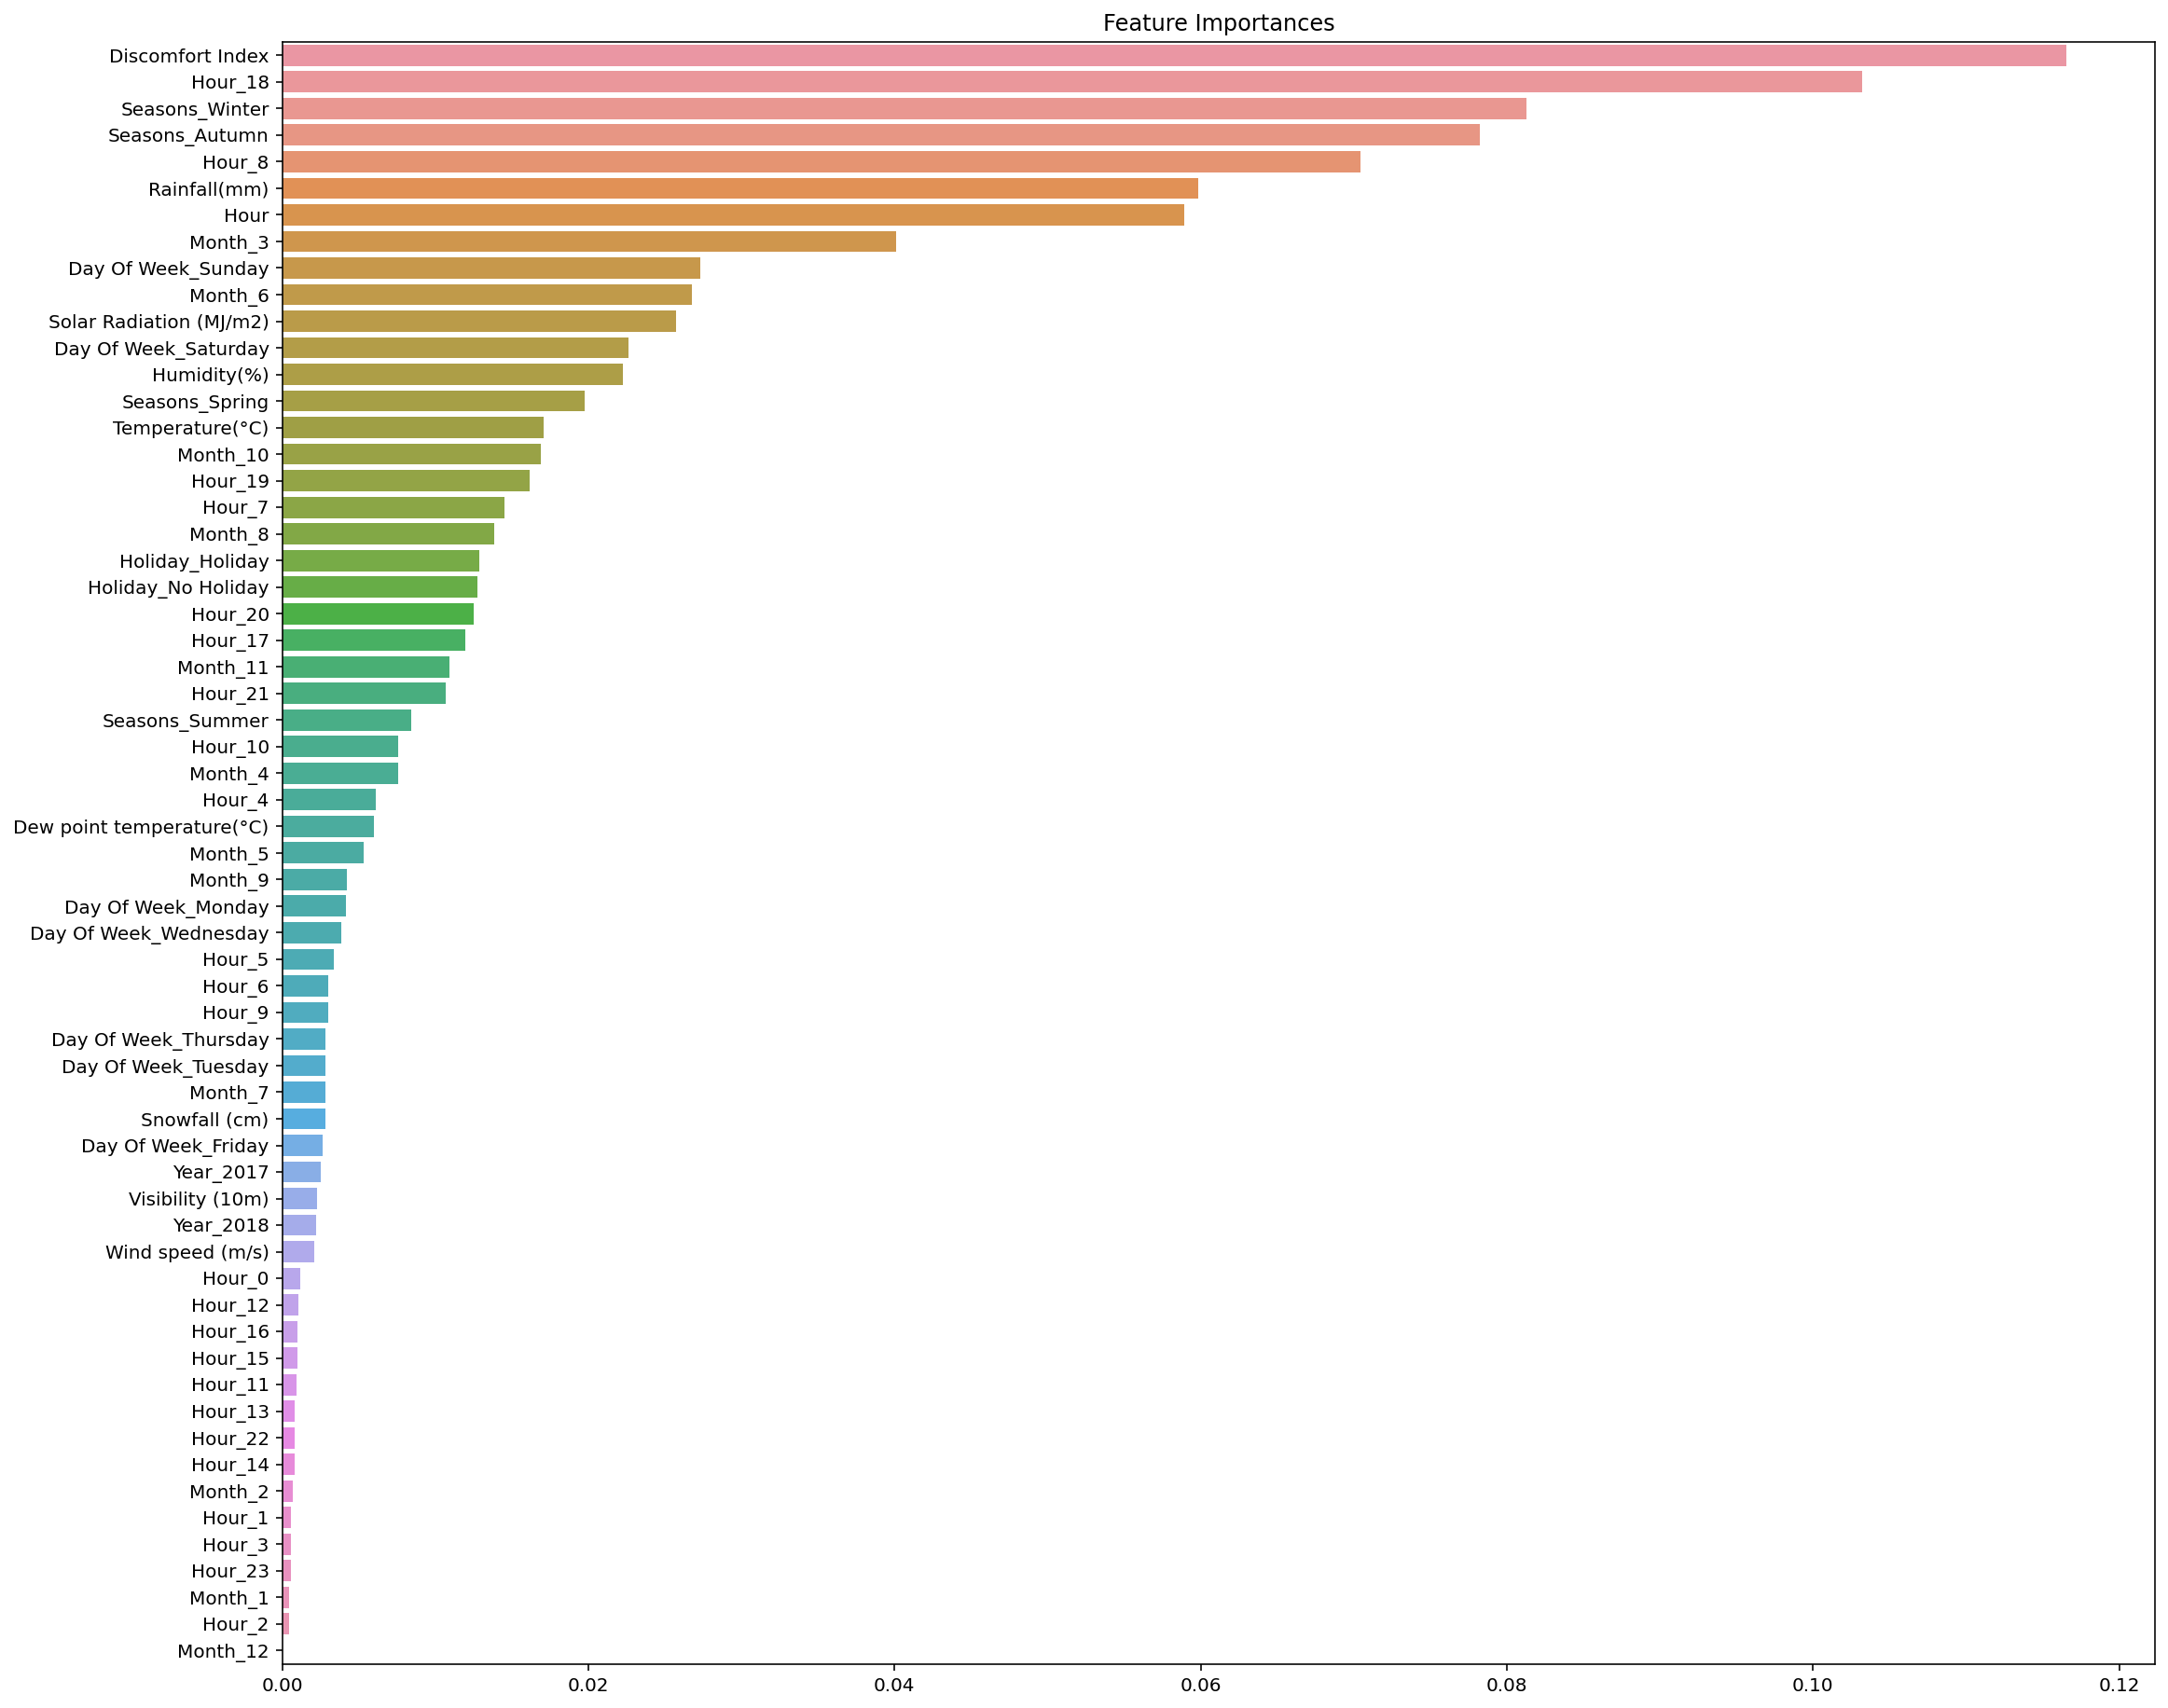

In [170]:
# 변수 중요도 계산
importances_values = pd.Series(model_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# 변수 중요도 시각화
plt.figure(figsize=(18,16))
plt.title('Feature Importances')
sns.barplot(x=importances_values, y=importances_values.index)
plt.show()

- 불쾌지수, 18시, 겨울, 가을, 8시, 강우량, 시간, 3월 순으로 중요도가 높다.
- 불쾌지수가 높아짐에 따라 자전거 대여량이 줄어든다는 사실이 맞는 것 같음.
- 중요도가 높은 이유가 18시, 8시는 출퇴근 시간임으로 보임.
- 비가 옴에 따라 자전거 대여량이 줄어든다는 사실이 맞아보임.

# 모델 선정 기준
- R2값이 가장 크게 나옴. 모델이 대여량을 잘 설명하고 있음을 알 수 있음.
- MSE, RMSE, MAE값이 가장 작게 나옴. 예측값과 실제값 간의 차이가 적다는 걸 알 수 있음. 

## 최종예측
#### 모델: xgb모델(Hyperopt로 하이퍼 파라미터 튜닝)
#### 하이퍼파라미터: {'colsample_bytree': 0.9243976240830923, 'gamma': 0.024182611444824403, 'learning_rate': 0.1273359099667039, 'max_depth': 8.0, 'min_child_weight': 1.0, 'n_estimators': 281.0, 'reg_alpha': 0.38733258003615073, 'reg_lambda': 1.1966816936171027, 'subsample': 0.8083044857082445}

In [185]:
best_params = {
    'colsample_bytree': 0.9243976240830923, 
    'gamma': 0.024182611444824403, 
    'learning_rate': 0.1273359099667039, 
    'max_depth': 8.0, 
    'min_child_weight': 1.0, 
    'n_estimators': 281.0, 
    'reg_alpha': 0.38733258003615073, 
    'reg_lambda': 1.1966816936171027, 
    'subsample': 0.8083044857082445}

# 하이퍼파라미터를 정수형으로 변환
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_child_weight'] = int(best_params['min_child_weight'])

# XGBoost 모델 정의
model_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    **best_params
)

# 모델 학습
model_xgb.fit(X_train, y_train)

# 검증 데이터에 대한 예측
y_val_pred = model_xgb.predict(X_val)

#### test 데이터로 예측
test_1['Rented Bike Count'] = 0
X_test = test_1.drop(columns=['Rented Bike Count'])
test_1['Rented Bike Count'] = np.round(final_model.predict(X_test)).astype(int)

In [186]:
test_1

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Month_11,Month_12,Day Of Week_Friday,Day Of Week_Monday,Day Of Week_Saturday,Day Of Week_Sunday,Day Of Week_Thursday,Day Of Week_Tuesday,Day Of Week_Wednesday,Discomfort Index
0,429,17.0,0.8,58.0,1.6,2000.0,-6.5,0.08,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,39.11336
1,228,1.0,-2.2,86.0,0.6,990.0,-4.2,0.00,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30.34692
2,360,9.0,-2.9,68.0,1.6,1487.0,-7.9,0.30,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,32.27472
3,360,11.0,1.9,49.0,1.8,1406.0,-7.7,1.00,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,41.75369
4,451,20.0,4.6,51.0,1.2,1585.0,-4.6,0.00,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.05554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6768,850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6769,871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6770,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [211]:
test_1.to_csv('test_1예측완료.csv', index = False)